In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[DataCamp Link](https://www.datacamp.com/courses/statistical-simulation-in-python)

## 1.Basics of randomness & simulation

### Introduction to random variables

#### Poisson random variable

- Using `np.random.poisson()` draw samples from a Poisson distribution using `lam` (lambda) and `size_1`.
- Repeat the above step, but this time use `size_2`.
 For each of the above samples, calculate the absolute difference between their mean and lambda using `np.mean()` and `abs()`.

In [0]:
# Initialize seed and parameters
np.random.seed(123) 
lam, size_1, size_2 = 5, 3, 1000  

# Draw samples & calculate absolute difference between lambda and sample mean
samples_1 = np.random.poisson(lam, size_1)
samples_2 = np.random.poisson(lam, size_2)
answer_1 = abs(lam - samples_1.mean())
answer_2 = abs(lam - samples_2.mean()) 

print("|Lambda - sample mean| with {} samples is {} and with {} samples is {}. ".format(size_1, answer_1, size_2, answer_2))

|Lambda - sample mean| with 3 samples is 0.33333333333333304 and with 1000 samples is 0.07699999999999996. 


####Shuffling a deck of cards


In [0]:
#@title
deck_of_cards = [('Heart', 0),
 ('Heart', 1),
 ('Heart', 2),
 ('Heart', 3),
 ('Heart', 4),
 ('Heart', 5),
 ('Heart', 6),
 ('Heart', 7),
 ('Heart', 8),
 ('Heart', 9),
 ('Heart', 10),
 ('Heart', 11),
 ('Heart', 12),
 ('Club', 0),
 ('Club', 1),
 ('Club', 2),
 ('Club', 3),
 ('Club', 4),
 ('Club', 5),
 ('Club', 6),
 ('Club', 7),
 ('Club', 8),
 ('Club', 9),
 ('Club', 10),
 ('Club', 11),
 ('Club', 12),
 ('Spade', 0),
 ('Spade', 1),
 ('Spade', 2),
 ('Spade', 3),
 ('Spade', 4),
 ('Spade', 5),
 ('Spade', 6),
 ('Spade', 7),
 ('Spade', 8),
 ('Spade', 9),
 ('Spade', 10),
 ('Spade', 11),
 ('Spade', 12),
 ('Diamond', 0),
 ('Diamond', 1),
 ('Diamond', 2),
 ('Diamond', 3),
 ('Diamond', 4),
 ('Diamond', 5),
 ('Diamond', 6),
 ('Diamond', 7),
 ('Diamond', 8),
 ('Diamond', 9),
 ('Diamond', 10),
 ('Diamond', 11),
 ('Diamond', 12)]

In [0]:
# Shuffle the deck
np.random.shuffle(deck_of_cards) 

# Print out the top three cards
card_choices_after_shuffle = deck_of_cards[0:3]
print(card_choices_after_shuffle)

[('Spade', 11), ('Heart', 10), ('Diamond', 1)]


### Simulation basics

####Throwing a fair die


- Construct a six-sided die as a list of each of the possible outcomes and assign it to the variable die.
- Define the probability of each of the six sides having an equal chance of showing up and assign it to the variable probabilities.
- Finally, use np.random.choice() to simulate a single throw of the die and record its outcome in the outcome variable.

In [0]:
np.random.seed(seed=123)

In [0]:
# Define die outcomes and probabilities
die, probabilities, throws = [1,2,3,4,5,6], [1/6, 1/6, 1/6, 1/6, 1/6, 1/6], 1

# Use np.random.choice to throw the die once and record the outcome
outcome = np.random.choice(die, size=throws, p=probabilities)
print("Outcome of the throw: {}".format(outcome[0]))

Outcome of the throw: 5


####Throwing two fair dice


- Set num_dice to 2.
- Complete the np.random.choice() function to throw two dice and record the outcomes in the outcomes variable.
- Fill in the Boolean condition to check if the two dice show the same number.

In [0]:
np.random.seed(seed=223)

In [0]:
# Initialize number of dice, simulate & record outcome
die, probabilities, num_dice = [1,2,3,4,5,6], [1/6, 1/6, 1/6, 1/6, 1/6, 1/6], 2
outcomes = np.random.choice(die, size=num_dice, p=probabilities) 

# Win if the two dice show the same number
if outcomes[0] == outcomes[1]:
    answer = 'win' 
else: 
    answer = 'lose'

print("The dice show {} and {}. You {}!".format(outcomes[0], outcomes[1], answer))

The dice show 5 and 5. You win!


####Simulating the dice game

Now let's consider the next step - repeated random sampling.

Repeating the process of random sampling is helpful to understand and visualize inherent uncertainty and deciding next steps.

- Set sims to 100 repetitions and initialize wins to 0.
- Write a for loop to repeat throwing the dice.
- Set outcomes to the outcome of throwing two dice.
- If the two dice show the same number, increment wins by 1.

In [0]:
np.random.seed(seed=223)

In [0]:
# Initialize model parameters & simulate dice throw
die, probabilities, num_dice = [1,2,3,4,5,6], [1/6, 1/6, 1/6, 1/6, 1/6, 1/6], 2
sims, wins = 100, 0

for i in range(sims):
    outcomes = np.random.choice(die, size=num_dice, p=probabilities) 
    # Increment `wins` by 1 if the dice show same number
    if outcomes[0] == outcomes[1]:
        wins = wins + 1

print("In {} games, you win {} times".format(sims, wins))

In 100 games, you win 25 times


### Using simulation for decision-making


####Simulating one lottery drawing

- Define chance_of_winning as the probability of winning the lottery.
- Set the probability list, which includes the probability of winning the lottery, as defined by chance_of_winning and its complement.
- Use np.random.choice() to perform one simulation of this lottery drawing.

In [0]:
np.random.seed(seed=123)

In [0]:
# Pre-defined constant variables
lottery_ticket_cost, num_tickets, grand_prize = 10, 1000, 1000000

# Probability of winning
chance_of_winning = 1/num_tickets

# Simulate a single drawing of the lottery
gains = [-lottery_ticket_cost, grand_prize-lottery_ticket_cost]
probability = [1-chance_of_winning, chance_of_winning]
outcome = np.random.choice(a=gains, size=1, p=probability, replace=True)

print("Outcome of one drawing of the lottery is {}".format(outcome))

Outcome of one drawing of the lottery is [-10]


####Should we buy?

In the last exercise, we simulated the random drawing of the lottery ticket once. In this exercise, we complete the simulation process by repeating the process multiple times.

Repeating the process gives us multiple outcomes. We can think of this as multiple universes where the same lottery drawing occurred. We can then determine the average winnings across all these universes. If the average winnings are greater than what we pay for the ticket then it makes sense to buy it, otherwise, we might not want to buy the ticket.

- Set the size parameter, which controls the number of simulations, to 2000.
- Set payoffs equal to a list containing how much you could lose and how much you could win.
- Set probs equal to a list of probabilities of losing and winning.
- Calculate the mean of outcomes and assign it to answer.

In [0]:
np.random.seed(seed=123)

In [0]:
# Initialize size and simulate outcome
lottery_ticket_cost, num_tickets, grand_prize = 10, 1000, 1000000
chance_of_winning = 1/num_tickets
size = 2000
payoffs = [-lottery_ticket_cost, grand_prize-lottery_ticket_cost]
probs = [1-chance_of_winning, chance_of_winning]

outcomes = np.random.choice(a=payoffs, size=size, p=probs, replace=True)

# Mean of outcomes.
answer = outcomes.mean()
print("Average payoff from {} simulations = {}".format(size, answer))

Average payoff from 2000 simulations = 1990.0


####Calculating a break-even lottery price

Simulations allow us to ask more nuanced questions that might not necessarily have an easy analytical solution. Rather than solving a complex mathematical formula, we directly get multiple sample outcomes.



- Set sims to 3000 and the `lottery_ticket_cost` variable to 0.
- Within the while loop, break if the mean value of outcomes falls below zero.
- Otherwise, increment `lottery_ticket_cost` by 1.

In [0]:
np.random.seed(seed=333)

In [0]:
# Initialize simulations and cost of ticket
sims, lottery_ticket_cost = 3000, 0

# Use a while loop to increment `lottery_ticket_cost` till average value of outcomes falls below zero
while 1:
    outcomes = np.random.choice([-lottery_ticket_cost, grand_prize-lottery_ticket_cost],
                 size=sims, p=[1-chance_of_winning, chance_of_winning], replace=True)
    if outcomes.mean() < 0:
        break
    else:
        lottery_ticket_cost += 1
answer = lottery_ticket_cost - 1

print("The highest price at which it makes sense to buy the ticket is {}".format(answer))

The highest price at which it makes sense to buy the ticket is 9


## 2.Probability & data generation process

#### Probability basics

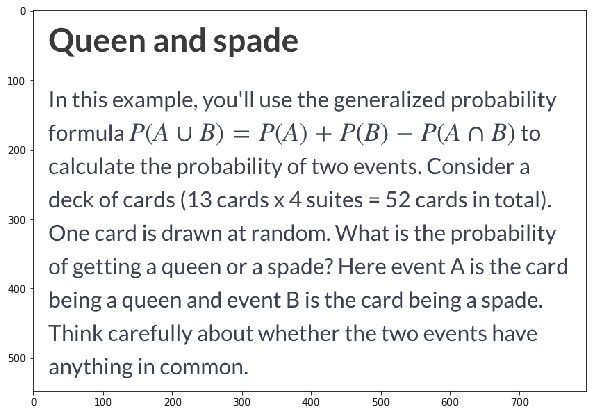

In [0]:
import matplotlib.pyplot as plt
img = plt.imread('qn.png')
fig= plt.figure(figsize=(11,7))
plt.imshow(img) #16/52

####Two of a kind

Let's work on estimating the probability of getting at least two of a kind. Two of a kind is when you get two cards of different suites but having the same numeric value (e.g., 2 of hearts, 2 of spades, and 3 other cards).

In [0]:
np.random.seed(seed=123)

In [0]:
# Shuffle deck & count card occurrences in the hand
n_sims, two_kind = 10000, 0
for i in range(n_sims):
    np.random.shuffle(deck_of_cards)
    hand, cards_in_hand = deck_of_cards[0:5], {}
    for card in hand:
        # Use .get() method on cards_in_hand
        cards_in_hand[card[1]] = cards_in_hand.get(card[1], 0) + 1
    
    # Condition for getting at least 2 of a kind
    highest_card = max(cards_in_hand.values())
    if  highest_card>=2: 
        two_kind += 1

print("Probability of seeing at least two of a kind = {} ".format(two_kind/n_sims))

Probability of seeing at least two of a kind = 0.4954 


####Game of thirteen

A famous French mathematician Pierre Raymond De Montmart, who was known for his work in combinatorics, proposed a simple game called as Game of Thirteen. You have a deck of 13 cards, each numbered from 1 through 13. Shuffle this deck and draw cards one by one. A coincidence is when the number on the card matches the order in which the card is drawn. For instance, if the 5th card you draw happens to be a 5, it's a coincidence. You win the game if you get through all the cards without any coincidences. 

Let's calculate the probability of winning at this game using simulation.

- For each drawing, draw all the cards in `deck` without replacement and assign to `draw`.
- Check if there are any coincidences in the draw and, if there are, increment the `coincidences` counter by 1.
- Calculate winning probability as the fraction of games without any coincidences and use `prob_of_winning` to print your results.

In [0]:
np.random.seed(seed=111)

In [0]:
# Pre-set constant variables
deck, sims, coincidences = np.arange(1, 14), 10000, 0

for _ in range(sims):
    # Draw all the cards without replacement to simulate one game
    draw = np.random.choice(deck, size=13, replace=False) 
    # Check if there are any coincidences
    coincidence = (draw == list(np.arange(1, 14))).any()
    if coincidence == True:
        coincidences += 1

# Calculate probability of winning
prob_of_winning = 1-coincidences/sims
print("Probability of winning = {}".format(prob_of_winning))

Probability of winning = 0.36950000000000005


### More probability concepts

####The conditional urn

We have an urn that contains 7 white and 6 black balls. Four balls are drawn at random. We'd like to know the probability that the first and third balls are white, while the second and the fourth balls are black.

- Initialize the counter `success` to 0 and `sims` to 5000.
- Define a list, `urn`, with 7 white balls (`'w'`) and 6 black balls (`'b'`).
- Draw 4 balls without replacement and check to see if the first and third are white and second and fourth are black.
- Increment `success` if the above criterion is met.

In [0]:
np.random.seed(seed=123)

In [0]:
# Initialize success, sims and urn
success, sims = 0, 5000
urn = ['w']*7 + ['b']*6

for _ in range(sims):
    # Draw 4 balls without replacement
    draw = np.random.choice(urn, replace=False, size=4)
    # Count the number of successes
    if (draw[0] == 'w') & (draw[1] == 'b') & (draw[2] == 'w') & (draw[3] == 'b'):
        success +=1

print("Probability of success = {}".format(success/sims))

Probability of success = 0.0722


####Birthday problem

Now we'll use simulation to solve a famous probability puzzle - the birthday problem. It sounds quite straightforward 

- How many people do you need in a room to ensure at least a 50% chance that two of them share the same birthday?

In [0]:
np.random.seed(seed=111)

In [0]:
# Draw a sample of birthdays & check if each birthday is unique
days = np.arange(1,366)
people = 2

def birthday_sim(people):
    sims, unique_birthdays = 2000, 0 
    for _ in range(sims):
        draw = np.random.choice(days, size=people, replace=True) 
        if len(draw) == len(set(draw)): 
            unique_birthdays += 1
    out = 1 - unique_birthdays / sims
    return out

- Call `birthday_sim()` in a while loop and break when the probability is greater than 50%.

In [0]:
# Break out of the loop if probability greater than 0.5
while (people > 0):
    prop_bds = birthday_sim(people)
    if prop_bds > 0.5: 
        break
    people += 1

print("With {} people, there's a 50% chance that two share a birthday.".format(people))

With 23 people, there's a 50% chance that two share a birthday.


####Full house

A full house is when you get two cards of different suits that share the same numeric value and three other cards that have the same numeric value (e.g., 2 of hearts & spades, jacks of clubs, diamonds, & spades).

Thus, a full house is the probability of getting exactly three of a kind conditional on getting exactly two of a kind of another value. 

In [0]:
np.random.seed(seed=123)

In [0]:
deck = deck_of_cards.copy()

- Shuffle `deck_of_cards`.
- Utilize a dictionary with `.get()` to count the number of occurrences of each card in the hand.
- Increment the counter `full_house` when there is a full house in the hand (2 of one kind, 3 of the other).

In [0]:
#Shuffle deck & count card occurrences in the hand
n_sims, full_house, deck_of_cards = 50000, 0, deck.copy()
for i in range(n_sims):
    np.random.shuffle(deck_of_cards)
    hand, cards_in_hand = deck_of_cards[0:5], {}
    for card in hand:
        # Use .get() method to count occurrences of each card
        cards_in_hand[card[1]] = cards_in_hand.get(card[1], 0) + 1
        
    # Condition for getting full house
    condition = (max(cards_in_hand.values()) ==3) & (min(cards_in_hand.values())==2)
    if condition == True: 
        full_house += 1
print("Probability of seeing a full house = {}".format(full_house/n_sims))

Probability of seeing a full house = 0.0014


### Data generating process

####Driving test

Suppose that you are about to take a driving test tomorrow. Based on your own practice and based on data you have gathered, you know that the probability of you passing the test is 90% when it's sunny and only 30% when it's raining. Your local weather station forecasts that there's a 40% chance of rain tomorrow. 

Based on this information, you want to know what is the probability of you passing the driving test tomorrow.

In [0]:
np.random.seed(seed=222)

- Set `weather` as `'rain'` or `'sun'` depending on the input argument `p_rain` (the probability of rain).
- Based on the `weather`, return `'pass'` or `'fail'`.

In [0]:
sims, outcomes, p_rain, p_pass = 1000, [], 0.40, {'sun':0.9, 'rain':0.3}

def test_outcome(p_rain):
    # Simulate whether it will rain or not
    weather = np.random.choice(['rain', 'sun'], p=[p_rain, 1-p_rain])
    # Simulate and return whether you will pass or fail
    return np.random.choice(['pass', 'fail'], p=[p_pass[weather], 1-p_pass[weather]])

- Compute the probability of passing the test. You'll have to count the number of times you pass the test, as collected in `outcomes`. Save it as `pass_outcomes_frac` and use that to print the output.

In [0]:
for _ in range(sims):
    outcomes.append(test_outcome(p_rain))

# Calculate fraction of outcomes where you pass
pass_outcomes_frac = sum([x == 'pass' for x in outcomes])/len(outcomes)
print("Probability of Passing the driving test = {}".format(pass_outcomes_frac))

Probability of Passing the driving test = 0.654


####National elections

Consider national elections in a country with two political parties - Red and Blue. This country has 50 states and the party that wins the most states wins the elections. You have the probability p of Red winning in each individual state and want to know the probability of Red winning nationally.



In [0]:
p = np.array([0.52076814, 0.67846401, 0.82731745, 0.64722761, 0.03665174,
       0.17835411, 0.75296372, 0.22206157, 0.72778372, 0.28461556,
       0.72545221, 0.106571  , 0.09291364, 0.77535718, 0.51440142,
       0.89604586, 0.39376099, 0.24910244, 0.92518253, 0.08165597,
       0.4212476 , 0.74123879, 0.2479099 , 0.46125805, 0.19584491,
       0.24440482, 0.349916  , 0.80224624, 0.80186664, 0.82968251,
       0.91178779, 0.51739059, 0.67338858, 0.15675863, 0.37772308,
       0.77134621, 0.71727114, 0.92700912, 0.28386132, 0.25502498,
       0.30081506, 0.19724585, 0.29129564, 0.56623386, 0.97681039,
       0.96263926, 0.0548948 , 0.14092758, 0.54739446, 0.54555576])

Suppose the election outcome in each state follows a binomial distribution with probability p such that 0 indicates a loss for Red and 1 indicates a win. We then simulate a number of election outcomes. 

Finally, we can ask rich questions like what is the probability of Red winning less than 45% of the states?

In [0]:
np.random.seed(seed=224)

- Simulate one election using `np.random.binomial()` with `p = probs` and `n=1`. Assign it to `election`.
- Append the average of Red's wins in `election` to `outcomes`.
- Calculate the fraction of `outcomes` where Red won less than 45% of the states. Save it as `prob_red_wins` and use it to print your results.

In [0]:
outcomes, sims, probs = [], 1000, p

for _ in range(sims):
    # Simulate elections in the 50 states
    election = np.random.binomial(p=probs, n=1)
    # Get average of Red wins and add to `outcomes`
    outcomes.append(election.mean())

# Calculate probability of Red winning in less than 45% of the states
prob_red_wins = sum([(x < 0.45) for x in outcomes])/len(outcomes)
print("Probability of Red winning in less than 45% of the states = {}".format(prob_red_wins))

Probability of Red winning in less than 45% of the states = 0.196


####Fitness goals

Let's model how activity levels impact weight loss using modern fitness trackers. On days when you go to the gym, you average around 15k steps, and around 5k steps otherwise. You go to the gym 40% of the time. Let's model the step counts in a day as a Poisson random variable with a mean λ dependent on whether or not you go to the gym.

For simplicity, let’s say you have an 80% chance of losing 1lb and a 20% chance of gaining 1lb when you get more than 10k steps. The probabilities are reversed when you get less than 8k steps. Otherwise, there's an even chance of gaining or losing 1lb. Given all this information, find the probability of losing weight in a month.

In [0]:
np.random.seed(seed=222)

- Simulate `steps` as a Poisson random variable for a given day based on the value of `lam`.
- Set `prob` to `[0.2, 0.8]` if `steps > 10000` or to `[0.8, 0.2]` if `steps < 8000`. Sum up all the weight lost or gained in a month stored in `w`.
- Calculate and print the fraction of simulations where total weight for a month in `outcomes` is less than 0. Save as `weight_loss_outcomes_frac` and use that to print your results.

In [0]:
days = 30

In [0]:
# Simulate steps & choose prob 
for _ in range(sims):
    w = []
    for i in range(days):
        lam = np.random.choice([5000, 15000], p=[0.6, 0.4], size=1)
        steps = np.random.poisson(lam)
        if steps > 10000: 
            prob = [0.2, 0.8]
        elif steps < 8000: 
            prob = [0.8, 0.2]
        else:
            prob = [0.5, 0.5]
        w.append(np.random.choice([1, -1], p=prob))
    outcomes.append(sum(w))

# Calculate fraction of outcomes where there was a weight loss
weight_loss_outcomes_frac = sum([x < 0 for x in outcomes])/len(outcomes)
print("Probability of Weight Loss = {}".format(weight_loss_outcomes_frac))

Probability of Weight Loss = 0.1075


### eCommerce Ad Simulation

####Sign up Flow


On any day, we get many ad impressions, which can be modeled as Poisson random variables (RV). You are told that λ is normally distributed with a mean of 100k visitors and standard deviation 2000.

During the signup journey, the customer sees an ad, decides whether or not to click, and then whether or not to signup. Thus both clicks and signups are binary, modeled using binomial RVs. What about probability p of success? Our current low-cost option gives us a click-through rate of 1% and a sign-up rate of 20%. A higher cost option could increase the clickthrough and signup rate by up to 20%, but we are unsure of the level of improvement, so we model it as a uniform RV.

In [0]:
np.random.seed(seed=123)

- Initialize `ct_rate` and `su_rate` dictionaries such that the `high` values are uniformly distributed between the `low` value and 1.2× the `low` value.
- Model `impressions` as a Poisson random variable with a mean value `lam`.
- Model `clicks` and `signups` as binomial random variables with `n` as `impressions` and `clicks` and `p` as `ct_rate[cost]` and `su_rate[cost]`, respectively.

In [0]:
# Initialize click-through rate and signup rate dictionaries
ct_rate = {'low':0.01, 'high':np.random.uniform(low=0.01, high=1.2*0.01)}
su_rate = {'low':0.2, 'high':np.random.uniform(low=0.2, high=1.2*0.2)}

def get_signups(cost, ct_rate, su_rate, sims):
    lam = np.random.normal(loc=100000, scale=2000, size=sims)
    # Simulate impressions(poisson), clicks(binomial) and signups(binomial)
    impressions = np.random.poisson(lam=lam)
    clicks = np.random.binomial(impressions, p=ct_rate[cost])
    signups = np.random.binomial(clicks, p=su_rate[cost])
    return signups

print("Simulated Signups = {}".format(get_signups('high', ct_rate, su_rate, 1)))

Simulated Signups = [268]


####Purchase Flow


Once the customer has signed up, they decide whether or not to purchase - a natural candidate for a binomial RV. Let's assume that 10% of signups result in a purchase.

Although customers can make many purchases, let's assume one purchase. The purchase value could be modeled by any continuous RV, but one nice candidate is the exponential RV. Suppose we know that purchase value per customer has averaged around $1000. We use this information to create the purchase_values RV. The revenue, then, is simply the sum of all purchase values.

In [0]:
np.random.seed(seed=123)

- Model `purchases` as a binomial RV with `p=0.1`.
- Model `purchase_values` as an exponential RV `scale=1000` and the appropriate `size`.
- Append `rev` with the sum of `purchase_values`.

In [0]:
def get_revenue(signups):
    rev = []
    np.random.seed(123)
    for s in signups:
        # Model purchases as binomial, purchase_values as exponential
        purchases = np.random.binomial(s, p=0.1)
        purchase_values = np.random.exponential(scale=1000, size=purchases)
        
        # Append to revenue the sum of all purchase values.
        rev.append(purchase_values.sum())
    return rev

print("Simulated Revenue = ${}".format(get_revenue(get_signups('low', ct_rate, su_rate, 1))[0]))

Simulated Revenue = $22404.217742298042


####Probability of losing money


As seen earlier, this company has the option of spending extra money, let's say \$3000, to redesign the ad. This could potentially get them higher clickthrough and signup rates, but this is not guaranteed. We would like to know whether or not to spend this extra \$3000 by calculating the probability of losing money. In other words, the probability that the revenue from the high-cost option minus the revenue from the low-cost option is lesser than the cost.

In [0]:
np.random.seed(seed=123)

- Initialize `cost_diff`, the difference between the 'high' and 'low' cost options, to `3000`.
- Get the revenue for the high-cost option and assign it to `rev_high`.
- Calculate the fraction of times when `rev_high - rev_low` is less than `cost_diff`. Call it `frac` and use it to print your results.

In [0]:
# Initialize sims
sims, cost_diff = 10000, 3000

# Get revenue when the cost is 'low' and when the cost is 'high'
rev_low = get_revenue(get_signups('low', ct_rate, su_rate, sims))
rev_high = get_revenue(get_signups('high', ct_rate, su_rate, sims))

# calculate fraction of times rev_high - rev_low is less than cost_diff
frac = sum([rev_high[i] - rev_low[i] < cost_diff for i in range(len(rev_low))])/len(rev_low)
print("Probability of losing money = {}".format(frac))

Probability of losing money = 0.4554


## 3.Resampling methods

### Introduction to resampling methods

####Probability example
In this exercise, we will review the difference between sampling with and without replacement. 

Consider a bowl filled with colored candies - three blue, two green, and five yellow. Draw three candies at random, with replacement and without replacement. You want to know the probability of drawing a yellow candy on the third draw given that the first candy was blue and the second candy was green.

In [0]:
np.random.seed(seed=123)

- Set up your sample space `bowl` as a list having three blue `'b'`, two green `'g'` and five yellow `'y'` candies.
- Draw a sample of three candies with replacement (`sample_rep`) and without replacement (`sample_no_rep`).
- Write down the success condition for drawing a yellow candy on the third draw given that the first candy was blue and the second candy was green.
- Calculate the probability with and without replacement as successes divided by the number of iterations.

In [0]:
# Set up the bowl
success_rep, success_no_rep, sims = 0, 0, 10000
bowl = list('b'*3 + 'g'*2 + 'y'*5)

for i in range(sims):
    # Sample with and without replacement & increment success counters
    sample_rep = np.random.choice(bowl, size=3, replace=True)
    sample_no_rep = np.random.choice(bowl, size=3, replace=False)
    if (sample_rep[0] == 'b') & (sample_rep[1] == 'g') & (sample_rep[2] == 'y'): 
        success_rep += 1
    if (sample_no_rep[0] == 'b') & (sample_no_rep[1] == 'g') & (sample_no_rep[2] == 'y'): 
        success_no_rep += 1

# Calculate probabilities
prob_with_replacement = success_rep/sims
prob_without_replacement = success_no_rep/sims
print("Probability with replacement = {}, without replacement = {}"\
      .format(prob_with_replacement, prob_without_replacement))

Probability with replacement = 0.0266, without replacement = 0.0415


### Bootstrapping

####Running a simple bootstrap


Suppose you own a factory that produces wrenches. You want to be able to characterize the average length of the wrenches and ensure that they meet some specifications. Your factory produces thousands of wrenches every day, but it's infeasible to measure the length of each wrench. However, you have access to a representative sample of 100 wrenches. Let's use bootstrapping to get the 95% confidence interval (CI) for the average lengths.

In [0]:
np.random.seed(seed=123)

In [0]:
wrench_lengths = np.array([ 8.9143694 , 10.99734545, 10.2829785 ,  8.49370529,  9.42139975,
       11.65143654,  7.57332076,  9.57108737, 11.26593626,  9.1332596 ,
        9.32111385,  9.90529103, 11.49138963,  9.361098  ,  9.55601804,
        9.56564872, 12.20593008, 12.18678609, 11.0040539 , 10.3861864 ,
       10.73736858, 11.49073203,  9.06416613, 11.17582904,  8.74611933,
        9.3622485 , 10.9071052 ,  8.5713193 ,  9.85993128,  9.1382451 ,
        9.74438063,  7.20141089,  8.2284669 ,  9.30012277, 10.92746243,
        9.82636432, 10.00284592, 10.68822271,  9.12046366, 10.28362732,
        9.19463348,  8.27233051,  9.60910021, 10.57380586, 10.33858905,
        9.98816951, 12.39236527, 10.41291216, 10.97873601, 12.23814334,
        8.70591468,  8.96121179, 11.74371223,  9.20193726, 10.02968323,
       11.06931597, 10.89070639, 11.75488618, 11.49564414, 11.06939267,
        9.22729129, 10.79486267, 10.31427199,  8.67373454, 11.41729905,
       10.80723653, 10.04549008,  9.76690794,  8.80169886, 10.19952407,
       10.46843912,  9.16884502, 11.16220405,  8.90279695,  7.87689965,
       11.03972709,  9.59663396,  9.87397041,  9.16248328,  8.39403724,
       11.25523737,  9.31113102, 11.66095249, 10.80730819,  9.68524185,
        8.9140976 ,  9.26753801,  8.78747687, 12.08711336, 10.16444123,
       11.15020554,  8.73264795, 10.18103513, 11.17786194,  9.66498924,
       11.03111446,  8.91543209,  8.63652846, 10.37940061,  9.62082357])

- Draw a random sample with replacement from `wrench_lengths` and store it in `temp_sample`. Set `size = len(wrench_lengths)`.
- Calculate the mean length of each sample, assign it to `sample_mean`, and then append it to `mean_lengths`.
- Calculate the bootstrapped mean (`boot_mean`) and bootstrapped 95% confidence interval (`boot_95_ci`) by using `np.percentile()`.

In [0]:
# Draw some random sample with replacement and append mean to mean_lengths.
mean_lengths, sims = [], 1000
for i in range(sims):
    temp_sample = np.random.choice(wrench_lengths, \
                                   replace=True, size=len(wrench_lengths))
    sample_mean = np.mean(temp_sample)
    mean_lengths.append(sample_mean)
    
# Calculate bootstrapped mean and 95% confidence interval.
boot_mean = np.mean(mean_lengths)
boot_95_ci = np.percentile(mean_lengths, [2.5, 97.5])
print("Bootstrapped Mean Length = {}, 95% CI = {}"\
      .format(boot_mean, boot_95_ci))

Bootstrapped Mean Length = 10.0270443060217, 95% CI = [ 9.80453269 10.257679  ]


####Non-standard estimators


Suppose you are studying the health of students. You are given the height and weight of 1000 students and are interested in the median height as well as the correlation between height and weight and the associated 95% CI for these quantities. Let's use bootstrapping.

In [0]:
#@title
data = np.array([[ 3.32873879e+00,  9.77851711e+01],
       [ 7.49469089e+00,  2.76504049e+02],
       [ 6.06595700e+00,  2.30262258e+02],
       [ 2.48741057e+00,  6.20748513e+01],
       [ 4.34279950e+00,  1.63870440e+02],
       [ 8.80287307e+00,  2.61388062e+02],
       [ 6.46641513e-01,  1.75659803e+01],
       [ 4.64217474e+00,  1.34119915e+02],
       [ 8.03187252e+00,  2.60923055e+02],
       [ 3.76651920e+00,  9.99262380e+01],
       [ 4.14222770e+00,  1.58818629e+02],
       [ 5.31058206e+00,  1.99717234e+02],
       [ 8.48277925e+00,  2.79617263e+02],
       [ 4.22219601e+00,  1.57166418e+02],
       [ 4.61203608e+00,  1.67953077e+02],
       [ 4.63129745e+00,  1.58884117e+02],
       [ 9.91186017e+00,  4.00869361e+02],
       [ 9.87357218e+00,  3.24553061e+02],
       [ 7.50810780e+00,  2.63141400e+02],
       [ 6.27237280e+00,  2.09973372e+02],
       [ 6.97473715e+00,  2.34821300e+02],
       [ 8.48146406e+00,  3.00836542e+02],
       [ 3.62833226e+00,  1.19631737e+02],
       [ 7.85165809e+00,  2.53297364e+02],
       [ 2.99223866e+00,  1.07834041e+02],
       [ 4.22449700e+00,  1.77415686e+02],
       [ 7.31421039e+00,  2.79566523e+02],
       [ 2.64263860e+00,  9.75684632e+01],
       [ 5.21986256e+00,  1.64310269e+02],
       [ 3.77649021e+00,  1.36837897e+02],
       [ 4.98876126e+00,  2.01722720e+02],
       [-9.71782109e-02,  2.63784942e+01],
       [ 1.95693379e+00,  7.74848592e+01],
       [ 4.10024553e+00,  1.34399664e+02],
       [ 7.35492486e+00,  2.52353551e+02],
       [ 5.15272863e+00,  1.99646650e+02],
       [ 5.50569183e+00,  2.09857869e+02],
       [ 6.87644542e+00,  1.96733099e+02],
       [ 3.74092731e+00,  1.47397895e+02],
       [ 6.06725465e+00,  2.30136121e+02],
       [ 3.88926696e+00,  1.13944558e+02],
       [ 2.04466101e+00,  5.24386075e+01],
       [ 4.71820041e+00,  1.46207912e+02],
       [ 6.64761172e+00,  2.15659840e+02],
       [ 6.17717810e+00,  1.80782494e+02],
       [ 5.47633901e+00,  1.99499164e+02],
       [ 1.02847305e+01,  3.40322584e+02],
       [ 6.32582432e+00,  2.19644255e+02],
       [ 7.45747201e+00,  2.48572301e+02],
       [ 9.97628668e+00,  3.55549472e+02],
       [ 2.91182935e+00,  7.66486015e+01],
       [ 3.42242358e+00,  1.25916460e+02],
       [ 8.98742445e+00,  3.24304381e+02],
       [ 3.90387453e+00,  1.57325473e+02],
       [ 5.55936646e+00,  2.43772053e+02],
       [ 7.63863194e+00,  2.15049574e+02],
       [ 7.28141278e+00,  2.62857306e+02],
       [ 9.00977236e+00,  2.97612962e+02],
       [ 8.49128827e+00,  2.49068623e+02],
       [ 7.63878534e+00,  2.88398252e+02],
       [ 3.95458257e+00,  1.71715387e+02],
       [ 7.08972534e+00,  2.38349694e+02],
       [ 6.12854399e+00,  2.19771947e+02],
       [ 2.84746908e+00,  9.80594993e+01],
       [ 8.33459809e+00,  3.02565875e+02],
       [ 7.11447307e+00,  2.71019951e+02],
       [ 5.59098016e+00,  2.04307739e+02],
       [ 5.03381588e+00,  1.84827804e+02],
       [ 3.10339771e+00,  1.40112333e+02],
       [ 5.89904815e+00,  2.02350130e+02],
       [ 6.43687824e+00,  2.48367353e+02],
       [ 3.83769003e+00,  1.13769141e+02],
       [ 7.82440810e+00,  3.14031407e+02],
       [ 3.30559391e+00,  1.34141422e+02],
       [ 1.25379930e+00,  3.37889871e+01],
       [ 7.57945418e+00,  2.12417193e+02],
       [ 4.69326792e+00,  1.64256609e+02],
       [ 5.24794083e+00,  1.54132694e+02],
       [ 3.82496655e+00,  1.41364694e+02],
       [ 2.28807448e+00,  1.16361827e+02],
       [ 8.01047475e+00,  2.84368111e+02],
       [ 4.12226203e+00,  1.39828856e+02],
       [ 8.82190498e+00,  3.17321809e+02],
       [ 7.11461637e+00,  2.56152828e+02],
       [ 4.87048371e+00,  1.11395327e+02],
       [ 3.32819520e+00,  1.22510254e+02],
       [ 4.03507603e+00,  1.56734595e+02],
       [ 3.07495374e+00,  1.01139840e+02],
       [ 9.67422672e+00,  3.63061912e+02],
       [ 5.82888246e+00,  2.00819022e+02],
       [ 7.80041109e+00,  2.92189357e+02],
       [ 2.96529590e+00,  1.60612984e+02],
       [ 5.86207026e+00,  2.02762681e+02],
       [ 7.85572388e+00,  2.26397032e+02],
       [ 4.82997848e+00,  1.60634454e+02],
       [ 7.56222892e+00,  2.21530762e+02],
       [ 3.33086418e+00,  1.31861192e+02],
       [ 2.77305691e+00,  1.29790766e+02],
       [ 6.25880122e+00,  2.36455034e+02],
       [ 4.74164713e+00,  1.73965355e+02],
       [ 6.78410938e+00,  2.21320692e+02],
       [ 1.54422414e+00,  9.34390884e+01],
       [ 6.92452927e+00,  2.61190430e+02],
       [ 1.06966079e+01,  3.81493014e+02],
       [ 5.45074804e+00,  1.95897689e+02],
       [ 5.56828426e+00,  1.97680633e+02],
       [ 5.85909897e+00,  2.16373875e+02],
       [ 1.77604858e+00,  4.68285208e+01],
       [ 6.35229328e+00,  2.60461513e+02],
       [ 2.28918051e+00,  8.39298117e+01],
       [ 4.64464080e+00,  1.77563789e+02],
       [ 7.98573910e+00,  2.68661687e+02],
       [ 4.02956609e+00,  1.50407776e+02],
       [ 6.50249798e+00,  1.70543619e+02],
       [ 7.52547811e+00,  2.35434262e+02],
       [ 6.05748171e+00,  2.11226531e+02],
       [ 2.75810306e+00,  6.34717793e+01],
       [ 4.83504945e+00,  2.30212082e+02],
       [ 9.41882268e+00,  2.87956761e+02],
       [ 1.44990847e+00,  5.93943153e+01],
       [ 4.94842797e+00,  2.14589308e+02],
       [ 4.39578386e+00,  1.65884611e+02],
       [ 5.74149473e+00,  1.93196627e+02],
       [ 6.99643123e+00,  2.31071491e+02],
       [ 8.71738194e+00,  3.21939755e+02],
       [ 4.95953522e+00,  1.53576966e+02],
       [ 7.12468266e+00,  2.46376740e+02],
       [ 6.49948029e+00,  2.44761775e+02],
       [ 6.44869460e+00,  2.18007335e+02],
       [ 4.37215214e+00,  1.55213075e+02],
       [ 3.50535706e+00,  1.15085340e+02],
       [ 3.29991377e+00,  9.12520420e+01],
       [ 3.98712558e+00,  1.69278157e+02],
       [ 6.14337315e+00,  2.49844716e+02],
       [ 7.02189879e+00,  2.37848959e+02],
       [ 6.14693770e+00,  2.08503415e+02],
       [ 4.40208981e+00,  1.49625660e+02],
       [ 9.11194022e+00,  3.32387990e+02],
       [ 8.53773125e+00,  2.76188087e+02],
       [ 4.79199977e+00,  1.65506859e+02],
       [ 3.85313719e+00,  1.41433778e+02],
       [ 5.76042991e+00,  2.17666101e+02],
       [ 8.03459729e+00,  2.11689973e+02],
       [ 6.16552995e+00,  2.25878629e+02],
       [ 6.61309741e+00,  2.40104578e+02],
       [ 5.07583976e+00,  2.02847597e+02],
       [ 6.41254179e+00,  2.11282362e+02],
       [ 8.58908890e+00,  2.87659281e+02],
       [ 5.02066244e+00,  2.05786100e+02],
       [ 5.78661547e+00,  1.63452624e+02],
       [ 6.00763295e+00,  2.50994411e+02],
       [ 6.06745071e+00,  2.76258136e+02],
       [ 2.67622225e+00,  1.05604071e+02],
       [ 1.74626269e+00,  8.14716559e+01],
       [ 3.46068986e+00,  8.38846024e+01],
       [ 5.83588459e+00,  1.86891966e+02],
       [ 6.60771233e+00,  2.57716495e+02],
       [ 4.43865088e+00,  1.64398164e+02],
       [ 8.25451497e+00,  2.84372337e+02],
       [ 5.21364805e+00,  1.88299410e+02],
       [ 5.54063200e+00,  2.06596532e+02],
       [ 5.11207226e+00,  1.71595137e+02],
       [ 5.76805359e+00,  2.01158227e+02],
       [ 6.90894815e+00,  2.40905501e+02],
       [ 6.83130688e+00,  2.12788766e+02],
       [ 3.70315412e+00,  1.37700260e+02],
       [ 8.54732755e+00,  3.44246112e+02],
       [ 3.30994709e+00,  1.59147201e+02],
       [ 5.65845403e+00,  1.61135909e+02],
       [ 4.95120685e+00,  1.87558020e+02],
       [ 3.40201665e+00,  1.35958177e+02],
       [ 5.34975882e+00,  1.76978797e+02],
       [ 4.01837245e+00,  1.16538035e+02],
       [ 5.64581449e+00,  1.64583149e+02],
       [ 6.30617192e+00,  2.09598423e+02],
       [ 8.44385874e+00,  3.04285284e+02],
       [ 6.11476844e+00,  2.10065441e+02],
       [ 4.27754932e+00,  1.34440899e+02],
       [ 4.71676038e+00,  1.33857697e+02],
       [ 5.77995621e+00,  2.11066374e+02],
       [ 5.68692166e+00,  2.25705819e+02],
       [ 8.41917854e+00,  2.71498199e+02],
       [ 8.29070586e+00,  3.01385429e+02],
       [ 4.78212815e+00,  1.20387604e+02],
       [ 4.40271574e+00,  1.37658398e+02],
       [ 3.85890792e-01,  3.17462807e+01],
       [ 4.40215917e+00,  1.26131391e+02],
       [ 3.54388459e+00,  1.08925042e+02],
       [ 4.79035108e+00,  2.03111459e+02],
       [ 6.28316848e+00,  2.01589797e+02],
       [ 5.85438466e+00,  1.83554843e+02],
       [ 5.44006399e+00,  2.04798449e+02],
       [ 5.89916422e+00,  2.55339087e+02],
       [ 5.24776445e+00,  1.77680007e+02],
       [ 5.89403787e+00,  2.25509722e+02],
       [-9.62110016e-01, -2.96210515e-02],
       [ 4.96141302e+00,  1.81788260e+02],
       [ 5.27829856e+00,  1.77992502e+02],
       [ 4.81747657e+00,  1.46703511e+02],
       [ 5.06410748e+00,  1.41613488e+02],
       [ 6.90662024e+00,  2.69524252e+02],
       [ 4.30378934e+00,  1.55156555e+02],
       [ 9.90140420e+00,  3.79869171e+02],
       [ 6.87659386e+00,  2.65403918e+02],
       [ 5.48738550e+00,  1.76634229e+02],
       [ 5.08667539e+00,  1.48361471e+02],
       [ 5.32695543e+00,  1.96760180e+02],
       [ 3.66938586e+00,  1.12615833e+02],
       [ 5.30959492e+00,  1.95253051e+02],
       [ 6.05736703e+00,  1.93729048e+02],
       [ 6.65908323e+00,  2.11537282e+02],
       [ 6.65937956e+00,  2.29553514e+02],
       [ 4.95024491e+00,  1.96611087e+02],
       [ 2.66783549e+00,  1.01037740e+02],
       [ 4.16179475e+00,  1.75122195e+02],
       [ 8.72438609e+00,  2.74514470e+02],
       [ 7.29211663e+00,  2.28797153e+02],
       [ 6.23923917e+00,  2.16144279e+02],
       [ 3.97741151e+00,  1.93351937e+02],
       [ 5.50729031e+00,  2.09612314e+02],
       [ 2.98866263e+00,  7.79378735e+01],
       [ 4.39612625e+00,  1.51960907e+02],
       [ 5.00959332e+00,  1.80853636e+02],
       [ 4.77672014e+00,  1.52968061e+02],
       [ 7.41320386e+00,  2.74794010e+02],
       [ 2.66254817e+00,  8.92780326e+01],
       [ 3.76913546e+00,  1.24436473e+02],
       [ 2.75062406e+00,  1.27778262e+02],
       [ 3.02529357e+00,  6.31437526e+01],
       [ 5.74811179e+00,  1.77138779e+02],
       [ 2.29911893e+00,  6.00364382e+01],
       [ 7.00773756e+00,  2.24078788e+02],
       [ 5.00636845e+00,  1.57004069e+02],
       [ 5.63757667e+00,  2.09527082e+02],
       [ 6.14515348e+00,  2.42493692e+02],
       [ 4.63166696e+00,  1.85009375e+02],
       [ 7.56495943e+00,  2.39284527e+02],
       [ 5.11131455e+00,  1.76210562e+02],
       [ 6.68814051e+00,  2.45391548e+02],
       [ 5.10177523e+00,  1.84562207e+02],
       [ 6.08174877e+00,  2.45504892e+02],
       [ 6.05932534e+00,  1.95193031e+02],
       [ 5.99993988e+00,  2.13905881e+02],
       [ 3.55138430e+00,  1.14467683e+02],
       [ 6.37175154e+00,  2.29288179e+02],
       [ 4.86208602e+00,  1.43200588e+02],
       [ 6.76097606e+00,  2.13410719e+02],
       [ 1.19501311e+00,  2.35726874e+01],
       [ 2.56976756e+00,  7.58501317e+01],
       [ 6.22689112e+00,  2.56639271e+02],
       [ 9.22585517e+00,  3.52289979e+02],
       [ 7.17011749e+00,  2.45637871e+02],
       [ 4.13509813e+00,  1.49051767e+02],
       [ 2.11589517e+00,  3.41954305e+01],
       [ 6.98537244e+00,  2.40005727e+02],
       [ 5.33883356e+00,  1.90849542e+02],
       [ 6.68140844e+00,  2.62491401e+02],
       [ 5.73059744e+00,  2.08741029e+02],
       [ 5.55928585e+00,  2.05397256e+02],
       [ 1.14172509e+01,  4.07047853e+02],
       [ 5.48774008e+00,  1.98795932e+02],
       [ 5.18150958e+00,  1.46433856e+02],
       [ 5.25710265e+00,  1.73579651e+02],
       [ 4.33292657e+00,  1.87524600e+02],
       [ 7.48026579e+00,  2.82406714e+02],
       [ 4.79249133e+00,  1.80093059e+02],
       [ 6.77188541e+00,  2.38683872e+02],
       [ 6.06920606e+00,  2.28908247e+02],
       [ 7.93797172e+00,  2.54206775e+02],
       [ 6.34035919e+00,  1.82411083e+02],
       [ 3.07323044e+00,  9.80109015e+01],
       [ 2.84702443e+00,  1.13093931e+02],
       [ 8.31673829e+00,  2.93781587e+02],
       [ 4.28257839e+00,  1.75239211e+02],
       [ 2.85879484e+00,  1.08844082e+02],
       [ 4.16076280e+00,  1.46747753e+02],
       [ 8.02925057e+00,  3.14210894e+02],
       [ 2.65957400e+00,  1.21394485e+02],
       [ 3.76700959e+00,  1.29393053e+02],
       [ 4.16638498e+00,  1.18247228e+02],
       [ 2.99762025e+00,  8.22326716e+01],
       [ 3.13134532e+00,  1.05560808e+02],
       [ 2.46378405e+00,  7.70621571e+01],
       [ 4.57762517e+00,  2.01660939e+02],
       [ 4.79018234e+00,  1.25653028e+02],
       [ 4.13492369e+00,  1.43115885e+02],
       [ 2.19260432e+00,  5.00854891e+01],
       [ 8.00667189e+00,  2.83153563e+02],
       [ 2.84184234e+00,  1.09021103e+02],
       [ 6.05606742e+00,  2.01839935e+02],
       [ 3.35046681e+00,  1.30528374e+02],
       [ 6.83663373e+00,  2.34316507e+02],
       [ 7.41166471e+00,  2.54923375e+02],
       [ 3.74477283e+00,  1.20619831e+02],
       [ 1.65256854e+00,  7.41105061e+01],
       [ 6.89157464e+00,  2.44667649e+02],
       [ 9.25160109e+00,  3.63137029e+02],
       [ 6.33138908e+00,  2.53349240e+02],
       [ 5.82108884e+00,  2.17582475e+02],
       [ 7.13952122e+00,  1.95897202e+02],
       [ 7.03010969e+00,  2.08945631e+02],
       [ 3.84202233e+00,  1.59127046e+02],
       [ 4.18169738e+00,  1.34468444e+02],
       [ 6.72224710e+00,  2.41149742e+02],
       [ 5.21197331e+00,  1.66657181e+02],
       [ 8.13321119e+00,  2.97609557e+02],
       [ 4.09131571e+00,  1.67145798e+02],
       [ 7.00121983e+00,  2.14802001e+02],
       [ 6.18527596e+00,  1.96145373e+02],
       [ 5.24712487e+00,  1.42056160e+02],
       [ 7.85182154e+00,  2.80648937e+02],
       [ 6.86014307e+00,  1.98472997e+02],
       [ 3.49006569e+00,  1.13000257e+02],
       [ 6.78043736e+00,  2.50305586e+02],
       [ 8.24998126e+00,  3.40201668e+02],
       [ 5.23911062e+00,  1.92579330e+02],
       [ 5.00268830e+00,  2.06416209e+02],
       [ 4.16070570e+00,  1.52103671e+02],
       [ 5.47279223e+00,  1.99278813e+02],
       [ 6.87240137e+00,  2.35260976e+02],
       [ 3.86466340e+00,  1.25681466e+02],
       [ 2.80728488e+00,  1.27614425e+02],
       [ 4.74850018e+00,  1.75564365e+02],
       [ 2.74055004e+00,  1.04326660e+02],
       [ 6.54643688e+00,  2.13920909e+02],
       [ 4.64662046e+00,  1.54005673e+02],
       [ 1.98919631e+00,  1.21309133e+02],
       [ 4.80278497e+00,  1.66409928e+02],
       [ 5.11477003e+00,  2.12171152e+02],
       [ 6.39827123e+00,  2.10933200e+02],
       [ 5.20927291e+00,  2.02363156e+02],
       [ 9.23745291e+00,  3.30555742e+02],
       [ 4.46259230e+00,  1.46097903e+02],
       [ 5.37520290e+00,  2.04346174e+02],
       [ 5.29417877e+00,  1.46710159e+02],
       [ 4.93474323e+00,  1.87081549e+02],
       [ 5.78485117e+00,  2.22142371e+02],
       [ 6.58246259e+00,  2.37213021e+02],
       [ 8.18019741e+00,  3.19080002e+02],
       [ 2.36148775e+00,  8.09495597e+01],
       [ 4.47931425e+00,  1.53047519e+02],
       [ 4.60445715e+00,  1.70031988e+02],
       [ 7.37570059e+00,  2.79842177e+02],
       [ 4.78667388e+00,  1.81779599e+02],
       [ 1.70964881e+00,  5.41723816e+01],
       [ 5.67546093e+00,  1.73760436e+02],
       [ 5.43262154e+00,  2.06728735e+02],
       [ 5.85950313e+00,  1.85343328e+02],
       [ 3.41967424e+00,  9.92317141e+01],
       [ 8.93806936e+00,  2.96466348e+02],
       [ 4.85228043e+00,  1.71272535e+02],
       [ 5.12340628e+00,  1.59411808e+02],
       [ 3.69998286e+00,  1.01107199e+02],
       [ 3.63799599e+00,  1.10858811e+02],
       [ 3.05452608e+00,  1.02325118e+02],
       [ 4.71337830e+00,  1.76325352e+02],
       [ 3.58483632e+00,  1.27150944e+02],
       [ 9.61293468e+00,  3.09441162e+02],
       [ 1.72301524e+00,  6.60220867e+01],
       [ 3.24333890e+00,  1.21585750e+02],
       [ 4.69717114e+00,  1.53026910e+02],
       [ 6.84698256e+00,  2.19738238e+02],
       [ 4.67248624e+00,  1.43621264e+02],
       [ 6.85192679e+00,  2.26522130e+02],
       [ 3.52639222e+00,  1.78779779e+02],
       [ 5.61858227e+00,  1.74423569e+02],
       [ 8.98808217e+00,  3.21232855e+02],
       [ 3.56451121e+00,  1.06905327e+02],
       [ 6.33913535e+00,  2.09220159e+02],
       [ 5.91385504e+00,  1.89331515e+02],
       [ 9.96930028e-01,  5.49226106e+01],
       [ 4.32205891e+00,  1.60749757e+02],
       [ 7.76230381e+00,  2.68447038e+02],
       [ 5.77015534e+00,  2.14528811e+02],
       [ 3.07546207e+00,  1.26227815e+02],
       [ 6.88155455e+00,  2.19586533e+02],
       [ 4.54175411e+00,  1.72642704e+02],
       [ 6.22010146e+00,  1.99762759e+02],
       [ 6.25384023e+00,  2.39832789e+02],
       [ 3.26260880e+00,  1.32696270e+02],
       [ 7.07965607e+00,  2.57880539e+02],
       [ 3.48498240e+00,  1.16726225e+02],
       [ 2.88842827e+00,  8.79422578e+01],
       [ 3.73434202e+00,  1.24111253e+02],
       [ 4.80781993e+00,  1.87502567e+02],
       [ 5.71880631e+00,  1.83099945e+02],
       [ 3.95483254e+00,  1.39660920e+02],
       [ 6.98963862e+00,  2.00946623e+02],
       [ 6.00292837e+00,  2.16611859e+02],
       [ 4.11040357e+00,  1.17975915e+02],
       [ 7.27798584e+00,  2.21776086e+02],
       [ 7.82213672e+00,  2.86742657e+02],
       [ 5.30263061e+00,  1.90850509e+02],
       [ 5.07003391e+00,  1.66366750e+02],
       [ 1.95245729e+00,  6.07836134e+01],
       [ 4.68497482e+00,  2.20749963e+02],
       [ 4.91698657e+00,  1.67240923e+02],
       [ 5.99075881e+00,  2.04646158e+02],
       [ 5.16314714e+00,  1.97017782e+02],
       [ 5.98805388e+00,  2.11762194e+02],
       [ 8.56818058e+00,  3.24572031e+02],
       [ 4.44017180e+00,  1.62342233e+02],
       [ 4.51805543e+00,  1.77159169e+02],
       [ 2.88166937e+00,  1.11941688e+02],
       [ 5.48267907e+00,  2.08026361e+02],
       [ 7.45362596e+00,  2.59810585e+02],
       [ 1.99785930e+00,  7.54882700e+01],
       [ 4.16828607e+00,  1.39114125e+02],
       [ 5.57188101e+00,  2.10120073e+02],
       [ 7.20020577e+00,  2.18356235e+02],
       [ 6.26574048e+00,  2.37454324e+02],
       [ 6.15092726e+00,  2.40233088e+02],
       [ 5.05137443e+00,  1.95342149e+02],
       [ 6.46374851e+00,  2.23628755e+02],
       [ 7.52860777e+00,  2.76132002e+02],
       [ 2.08201645e+00,  5.34561089e+01],
       [ 6.95707080e+00,  2.64425033e+02],
       [ 5.30248039e+00,  1.58106431e+02],
       [ 4.44002227e+00,  1.70244058e+02],
       [ 6.13848428e-01,  3.48011299e+01],
       [ 2.73929735e+00,  1.06043603e+02],
       [ 8.89611798e+00,  3.00187038e+02],
       [ 4.12290294e+00,  1.63305759e+02],
       [ 3.33046246e+00,  7.06345644e+01],
       [ 4.58714809e+00,  1.79980728e+02],
       [ 4.00970556e+00,  1.45125642e+02],
       [ 5.74871727e+00,  2.27479071e+02],
       [ 8.53394736e+00,  3.03689382e+02],
       [ 4.32676810e+00,  1.97391637e+02],
       [ 5.80858010e+00,  1.79754820e+02],
       [ 3.20552572e+00,  1.27428583e+02],
       [ 8.54033288e+00,  2.76761539e+02],
       [ 5.87808688e+00,  2.02573386e+02],
       [ 3.33636175e+00,  1.35331976e+02],
       [ 7.30861244e+00,  2.71437194e+02],
       [ 7.89997530e+00,  3.28487602e+02],
       [ 5.82291273e+00,  1.95016777e+02],
       [ 2.22120606e+00,  1.09892246e+02],
       [ 9.07033763e+00,  3.11104312e+02],
       [ 6.12024504e+00,  1.96686074e+02],
       [ 7.84090859e+00,  2.33857962e+02],
       [ 4.39821359e+00,  1.58004241e+02],
       [ 4.70275215e+00,  1.51563685e+02],
       [ 5.72090622e+00,  2.21419652e+02],
       [ 7.72680336e+00,  2.57228099e+02],
       [ 5.78598006e+00,  1.90594263e+02],
       [ 2.98633237e+00,  1.13388015e+02],
       [ 6.02397839e+00,  2.53869639e+02],
       [ 8.75906839e+00,  2.79351147e+02],
       [ 5.63161256e+00,  2.22546760e+02],
       [ 5.75877105e+00,  2.23409619e+02],
       [ 2.97491251e+00,  9.85982887e+01],
       [ 2.69402182e+00,  1.11176171e+02],
       [ 4.22461572e+00,  1.40754640e+02],
       [ 4.84696471e+00,  2.28928476e+02],
       [ 5.70812147e+00,  1.96981869e+02],
       [ 5.83191395e+00,  2.06127341e+02],
       [ 8.70381530e+00,  2.96488745e+02],
       [ 5.61737488e+00,  1.54271770e+02],
       [ 7.62884538e+00,  2.60430754e+02],
       [ 5.42134133e+00,  1.95547871e+02],
       [ 8.39780722e+00,  3.31446318e+02],
       [ 1.75920504e+00,  7.38711047e+01],
       [ 4.30253647e+00,  1.45854222e+02],
       [ 7.46606679e+00,  2.62810918e+02],
       [ 5.15680799e+00,  1.88671789e+02],
       [ 7.36305923e+00,  2.48232921e+02],
       [ 6.27013221e+00,  2.36510553e+02],
       [ 7.39175397e+00,  2.99338593e+02],
       [ 6.72613546e+00,  2.26336022e+02],
       [ 6.84729787e+00,  2.69843682e+02],
       [ 8.48491077e+00,  3.18880035e+02],
       [ 7.47294804e+00,  2.74984303e+02],
       [ 7.48761341e+00,  2.64864610e+02],
       [ 5.54083752e+00,  2.02373910e+02],
       [ 4.33629958e+00,  1.46335656e+02],
       [ 4.18087982e+00,  1.92252506e+02],
       [ 7.00188919e+00,  2.27106043e+02],
       [ 6.23078872e-01,  5.01813779e+01],
       [ 2.88564362e+00,  1.39740570e+02],
       [ 3.57349263e+00,  1.16993884e+02],
       [ 5.00475724e+00,  2.04312677e+02],
       [ 2.37123926e-01,  1.18988711e+01],
       [ 8.01744261e+00,  2.82169486e+02],
       [ 6.70035047e+00,  2.32648174e+02],
       [ 9.46916480e+00,  2.91077490e+02],
       [ 7.62442894e+00,  2.80553112e+02],
       [ 7.56075866e+00,  3.00715347e+02],
       [ 1.00013521e+01,  3.32429312e+02],
       [ 4.35808383e+00,  1.73716400e+02],
       [ 2.49308320e+00,  8.51277772e+01],
       [ 5.03528521e+00,  1.48917750e+02],
       [ 3.85001589e+00,  1.59697805e+02],
       [ 4.98630928e+00,  2.16671746e+02],
       [ 3.39956202e+00,  9.91283617e+01],
       [ 6.63576013e+00,  2.37646647e+02],
       [ 6.52596570e+00,  1.92415407e+02],
       [ 5.44615482e+00,  1.89565236e+02],
       [ 6.12316301e+00,  2.26462365e+02],
       [ 5.21589855e+00,  2.26379189e+02],
       [ 7.00406734e+00,  2.84081700e+02],
       [ 5.63928150e+00,  2.38437311e+02],
       [ 4.96910875e+00,  1.60741508e+02],
       [ 7.35916894e+00,  2.51441786e+02],
       [ 8.02164254e+00,  2.39149853e+02],
       [ 8.17490765e+00,  2.68242880e+02],
       [ 3.51945062e+00,  8.68850417e+01],
       [ 4.43110558e+00,  1.64227118e+02],
       [ 2.09700781e+00,  5.59705232e+01],
       [ 5.02286996e+00,  1.48264892e+02],
       [ 6.33224763e+00,  2.12743306e+02],
       [ 5.23439765e+00,  1.53581994e+02],
       [ 9.36170173e+00,  3.35384981e+02],
       [ 4.68831325e+00,  1.71202151e+02],
       [ 3.32298289e+00,  1.08411586e+02],
       [ 6.63700841e+00,  2.14028407e+02],
       [ 5.79986766e+00,  1.69509334e+02],
       [ 6.59928519e+00,  2.44858897e+02],
       [ 6.10757586e+00,  2.19483174e+02],
       [ 5.98753152e+00,  2.21171490e+02],
       [ 1.25540223e+00,  3.62781937e+01],
       [ 4.04777194e+00,  1.36223930e+02],
       [ 4.31935016e+00,  1.87227234e+02],
       [ 4.80407132e+00,  1.53127875e+02],
       [ 4.60321672e+00,  1.53296485e+02],
       [ 6.32563752e+00,  2.39994615e+02],
       [ 6.70176502e+00,  2.42134558e+02],
       [ 3.23671815e+00,  6.21195800e+01],
       [ 6.87360881e+00,  1.98379140e+02],
       [ 6.67153628e+00,  2.16982988e+02],
       [ 6.43154013e+00,  2.47861396e+02],
       [ 2.66421102e+00,  1.10039213e+02],
       [ 6.38116460e+00,  2.36328845e+02],
       [ 5.66519084e+00,  2.13975282e+02],
       [ 7.42176015e+00,  2.35537986e+02],
       [ 9.06871359e+00,  3.32431153e+02],
       [ 8.67613577e+00,  2.80632660e+02],
       [ 5.72528834e+00,  2.24067572e+02],
       [ 5.49625062e+00,  1.79604643e+02],
       [ 6.76389657e+00,  2.43777032e+02],
       [ 3.26992009e+00,  6.75847432e+01],
       [ 2.59863372e+00,  5.72299573e+01],
       [ 4.55493882e+00,  1.86689795e+02],
       [ 7.94113783e+00,  2.95233421e+02],
       [ 4.83774340e+00,  1.38872600e+02],
       [ 8.50516181e+00,  3.29820456e+02],
       [-7.62257662e-02, -2.99375125e+01],
       [ 2.32558715e+00,  8.18945777e+01],
       [ 5.25262253e+00,  1.71839273e+02],
       [ 7.27638908e+00,  2.31588238e+02],
       [ 5.36075380e+00,  2.16824897e+02],
       [ 5.30869451e+00,  2.27928845e+02],
       [ 5.25651701e+00,  1.88434951e+02],
       [ 1.97420453e+00,  1.07247132e+02],
       [ 7.81613775e+00,  2.66534445e+02],
       [ 4.13447056e+00,  1.47414185e+02],
       [ 7.67906531e+00,  2.72054517e+02],
       [ 5.35895316e+00,  1.58645639e+02],
       [ 7.63632077e+00,  2.79757649e+02],
       [ 6.18651596e+00,  2.34270387e+02],
       [ 5.28665102e+00,  1.80695945e+02],
       [ 5.95252329e+00,  1.66044536e+02],
       [ 2.55404478e+00,  9.85842047e+01],
       [ 5.51205865e+00,  1.55046715e+02],
       [ 8.93208064e+00,  2.92341077e+02],
       [ 8.11638713e+00,  2.87359082e+02],
       [ 3.52995283e+00,  1.04306788e+02],
       [ 6.51137170e+00,  2.34239926e+02],
       [ 5.99595977e+00,  2.04203336e+02],
       [ 7.13437656e+00,  2.08940767e+02],
       [ 5.68830577e+00,  2.03289991e+02],
       [ 5.03299201e+00,  1.90819212e+02],
       [ 8.16126155e+00,  3.10954160e+02],
       [ 5.93279314e+00,  1.98483558e+02],
       [ 8.01092864e+00,  2.78845411e+02],
       [ 7.44877241e+00,  2.23329318e+02],
       [ 4.85102552e+00,  2.18908128e+02],
       [ 5.16599945e+00,  2.18435186e+02],
       [ 9.35966487e+00,  3.26792420e+02],
       [ 5.88296465e+00,  2.02782718e+02],
       [ 3.98274315e+00,  6.61404393e+01],
       [ 3.09991344e+00,  1.34378535e+02],
       [ 7.44826487e+00,  2.74760800e+02],
       [ 5.82058744e+00,  2.24040857e+02],
       [ 3.91581610e+00,  1.26922360e+02],
       [ 6.84916966e+00,  2.27985218e+02],
       [ 5.81949739e+00,  1.72796943e+02],
       [ 2.17904986e+00,  9.57169883e+01],
       [ 6.67737111e+00,  2.65011836e+02],
       [ 8.16638141e+00,  3.13920421e+02],
       [ 1.06197005e+01,  3.76370956e+02],
       [ 5.56980513e+00,  1.86776887e+02],
       [ 5.96529932e+00,  1.82486215e+02],
       [ 8.71319361e+00,  2.87418013e+02],
       [ 5.83744453e+00,  2.15999321e+02],
       [ 6.05068373e+00,  2.04660096e+02],
       [ 4.23876322e+00,  1.89391817e+02],
       [ 2.71124977e+00,  1.23702643e+02],
       [ 7.32537587e+00,  2.41342927e+02],
       [ 2.95285953e+00,  7.29585318e+01],
       [ 7.78131249e+00,  2.58635478e+02],
       [ 3.92366888e+00,  1.63962985e+02],
       [ 6.03046792e+00,  1.97968317e+02],
       [ 4.75545654e+00,  1.80090678e+02],
       [ 7.84920048e+00,  2.60575014e+02],
       [ 6.10169280e+00,  2.22138352e+02],
       [ 9.41819071e+00,  3.42840224e+02],
       [ 3.33264464e+00,  1.41288394e+02],
       [ 6.32772616e+00,  2.57301419e+02],
       [ 5.59468376e+00,  2.28569655e+02],
       [ 6.05988714e+00,  1.98841762e+02],
       [ 8.69184234e+00,  3.00539014e+02],
       [ 6.67063606e+00,  2.04134135e+02],
       [ 3.20494918e+00,  1.06281089e+02],
       [ 6.56702164e+00,  2.30453686e+02],
       [ 4.66876125e+00,  1.53307645e+02],
       [ 4.55329006e+00,  1.46775538e+02],
       [ 7.59171466e+00,  2.91512017e+02],
       [ 4.29532003e+00,  1.73023275e+02],
       [ 4.74053934e+00,  1.75896928e+02],
       [ 5.56481451e+00,  1.62830743e+02],
       [ 7.39237179e+00,  2.63756285e+02],
       [ 6.66317961e+00,  2.23605497e+02],
       [ 5.03117018e+00,  2.08984143e+02],
       [ 4.95564707e+00,  1.28390379e+02],
       [ 3.17974068e+00,  9.73203314e+01],
       [ 3.98032982e+00,  1.24645286e+02],
       [ 4.19123783e+00,  1.35028973e+02],
       [ 5.20141812e+00,  2.05989103e+02],
       [ 9.47352607e+00,  2.72764452e+02],
       [ 4.14906113e+00,  1.40015835e+02],
       [ 4.90834186e+00,  1.93059982e+02],
       [ 1.39520319e+00,  7.33350493e+01],
       [ 6.70114219e+00,  2.20813030e+02],
       [ 2.34510241e+00,  6.50841307e+01],
       [ 3.68682096e+00,  1.37694073e+02],
       [ 7.58467074e+00,  2.69239393e+02],
       [ 1.29014314e+00,  4.68900878e+01],
       [ 5.69184082e+00,  1.04179974e+02],
       [ 7.10185929e+00,  2.20385770e+02],
       [ 8.55088847e+00,  2.77700520e+02],
       [ 3.65981378e+00,  1.44168729e+02],
       [ 4.25195030e+00,  1.12799268e+02],
       [ 9.10887265e+00,  2.92644854e+02],
       [ 5.44987971e+00,  1.86886190e+02],
       [ 4.02747213e+00,  1.08771645e+02],
       [ 4.06502833e+00,  1.58347339e+02],
       [ 3.55488735e+00,  1.14635965e+02],
       [ 4.62065559e+00,  2.07545594e+02],
       [ 7.67644095e+00,  2.52932465e+02],
       [ 7.27553214e+00,  2.40236545e+02],
       [ 3.15145939e+00,  1.30412036e+02],
       [ 5.92917215e+00,  1.91137602e+02],
       [ 4.69568053e+00,  2.02138027e+02],
       [ 7.06488081e+00,  2.59343702e+02],
       [ 5.18728055e+00,  1.73957821e+02],
       [ 6.24304936e+00,  2.14486778e+02],
       [ 5.18278959e+00,  2.52665329e+02],
       [ 1.12582814e+00,  5.16203438e+01],
       [ 5.59400489e+00,  1.99552097e+02],
       [ 2.95650610e+00,  1.00163295e+02],
       [ 6.99425682e+00,  2.70728040e+02],
       [ 4.14034422e+00,  1.06953890e+02],
       [ 4.28997469e+00,  1.45619414e+02],
       [ 5.48219435e+00,  1.21035366e+02],
       [ 6.65558791e+00,  2.19610386e+02],
       [ 5.16051236e+00,  2.01816103e+02],
       [ 8.78436554e+00,  3.42008565e+02],
       [ 8.79763572e+00,  3.23066506e+02],
       [ 8.93093718e+00,  3.28582016e+02],
       [ 5.03136255e+00,  1.33200152e+02],
       [ 2.53608309e+00,  7.18035628e+01],
       [ 7.94015703e+00,  3.14765621e+02],
       [ 4.66730943e+00,  1.50259330e+02],
       [ 5.57633262e+00,  1.91772082e+02],
       [ 6.75664021e+00,  2.16343358e+02],
       [ 2.29112720e+00,  5.68456648e+01],
       [ 8.75824241e+00,  2.94781754e+02],
       [ 7.24992466e+00,  2.37220964e+02],
       [ 6.20454316e+00,  2.41096556e+02],
       [ 7.28183350e+00,  2.60248412e+02],
       [ 6.61390508e+00,  2.56958773e+02],
       [ 5.73365623e+00,  1.65997031e+02],
       [ 4.88445136e+00,  2.01592126e+02],
       [ 4.02171545e+00,  1.41296446e+02],
       [ 6.07442856e+00,  2.58588709e+02],
       [ 6.22240612e+00,  2.16464811e+02],
       [ 7.66639761e+00,  2.30988871e+02],
       [ 5.90132002e+00,  2.38651716e+02],
       [ 3.79359697e+00,  1.29363688e+02],
       [ 2.34753431e+00,  2.83608237e+01],
       [ 5.24487568e+00,  1.87200516e+02],
       [ 5.44508325e+00,  1.96358617e+02],
       [ 5.30381683e+00,  2.12536408e+02],
       [ 2.43897421e+00, -4.32324860e+00],
       [ 7.64893028e+00,  2.96434297e+02],
       [ 7.64525949e+00,  2.55719163e+02],
       [ 3.85342967e+00,  1.83026236e+02],
       [ 7.11196422e+00,  2.05961723e+02],
       [ 7.40566172e+00,  2.72831633e+02],
       [ 5.57689415e+00,  2.05484266e+02],
       [ 3.60300275e+00,  1.15552228e+02],
       [ 8.72676307e+00,  2.86091560e+02],
       [ 6.26184287e+00,  2.09820875e+02],
       [ 4.99792509e+00,  1.66259371e+02],
       [ 7.04569079e+00,  2.15263228e+02],
       [ 8.74441698e+00,  3.30879398e+02],
       [ 4.50567971e+00,  1.30393781e+02],
       [ 6.88284509e+00,  2.66479353e+02],
       [ 9.38632034e+00,  2.83797848e+02],
       [ 3.26687033e+00,  1.09910717e+02],
       [ 4.40149282e+00,  1.49994585e+02],
       [ 4.30428984e+00,  1.50255285e+02],
       [ 5.18334573e+00,  2.05324497e+02],
       [ 5.08005253e+00,  1.72743158e+02],
       [ 6.10159088e+00,  2.02107445e+02],
       [ 3.85924896e+00,  1.30090524e+02],
       [ 4.25467302e+00,  1.73438727e+02],
       [ 6.10258097e+00,  1.83450160e+02],
       [ 5.80982372e+00,  1.77827118e+02],
       [ 7.24815962e+00,  2.04768130e+02],
       [ 6.31871005e+00,  2.71836069e+02],
       [ 7.04369327e+00,  2.17535646e+02],
       [ 3.21409592e+00,  6.53575658e+01],
       [ 4.73316738e+00,  1.45438380e+02],
       [ 9.19675990e+00,  3.06575215e+02],
       [ 6.28415609e+00,  2.56581863e+02],
       [ 6.99478592e+00,  2.33195027e+02],
       [ 6.04546947e+00,  2.18885664e+02],
       [ 6.35067171e+00,  1.77504015e+02],
       [ 5.03819190e+00,  1.81536304e+02],
       [ 1.26431584e+01,  4.01290639e+02],
       [ 4.70768816e+00,  1.56929209e+02],
       [ 5.42335756e+00,  1.70820740e+02],
       [ 6.50327349e-01,  2.42182446e+01],
       [ 7.71253332e+00,  2.85798884e+02],
       [ 4.39549410e+00,  1.20444895e+02],
       [ 5.37841179e+00,  1.59833952e+02],
       [ 4.44391890e+00,  1.60376887e+02],
       [ 5.22263411e+00,  1.99974337e+02],
       [ 4.93150580e+00,  2.08037083e+02],
       [ 5.41391645e+00,  1.77689782e+02],
       [ 5.39439703e+00,  1.51516929e+02],
       [ 5.19158938e+00,  1.86371271e+02],
       [ 5.16424555e+00,  1.60882501e+02],
       [ 8.11703690e+00,  2.60985787e+02],
       [ 7.26283384e+00,  2.89403611e+02],
       [ 7.27488464e+00,  2.70088883e+02],
       [ 4.03510224e+00,  1.23026632e+02],
       [ 8.01364166e+00,  2.80009670e+02],
       [ 7.76328902e+00,  2.69573191e+02],
       [ 4.39319134e+00,  1.57889087e+02],
       [ 8.54770403e+00,  2.89021151e+02],
       [ 4.13354811e+00,  9.71726208e+01],
       [ 1.81593632e+00,  3.91490169e+01],
       [ 7.70305197e+00,  2.56306904e+02],
       [ 5.26096244e+00,  1.84836480e+02],
       [ 7.45384313e+00,  2.33827150e+02],
       [ 3.99159567e+00,  1.44362972e+02],
       [ 2.97645998e+00,  9.46443126e+01],
       [ 7.96374358e+00,  2.59744148e+02],
       [ 2.68546287e+00,  6.22342975e+01],
       [ 2.37793898e+00,  9.43901496e+01],
       [ 1.64882622e+00,  6.83150023e+01],
       [-8.89445966e-02,  1.68924612e+01],
       [ 3.42179123e+00,  1.33494899e+02],
       [ 1.16118408e+00,  5.62448043e+01],
       [ 5.42878903e+00,  1.99559582e+02],
       [ 1.02716530e+00, -8.00945649e+00],
       [ 3.31145316e+00,  1.08922889e+02],
       [ 1.01641240e+01,  3.19934778e+02],
       [ 6.19024848e+00,  2.50888999e+02],
       [ 5.60561135e+00,  1.95846054e+02],
       [ 2.25849604e+00,  1.10791258e+02],
       [ 5.00880467e+00,  1.49550106e+02],
       [ 5.59621713e+00,  1.93570869e+02],
       [ 2.28963841e+00,  8.67217005e+01],
       [ 5.75236136e+00,  1.93060094e+02],
       [ 7.88246491e+00,  2.80581007e+02],
       [ 4.80348376e+00,  2.05176018e+02],
       [ 5.10552726e+00,  1.52895619e+02],
       [ 1.41580717e+00, -1.63948113e+01],
       [ 2.70153226e+00,  1.34569233e+02],
       [ 7.61539020e+00,  2.46747101e+02],
       [ 4.17689871e+00,  1.74253947e+02],
       [ 3.64057673e+00,  1.43718018e+02],
       [ 4.11483377e+00,  1.38602012e+02],
       [ 5.38506775e+00,  1.97985991e+02],
       [ 3.18316818e+00,  8.28975296e+01],
       [ 5.75303301e+00,  2.03503584e+02],
       [ 2.77998465e+00,  1.12150468e+02],
       [ 7.04800000e+00,  2.27321682e+02],
       [ 3.38588845e+00,  1.08998818e+02],
       [ 8.14053664e+00,  2.92733620e+02],
       [ 5.47993469e+00,  2.24879557e+02],
       [ 3.80871114e+00,  1.33226019e+02],
       [ 7.32292122e+00,  2.45535747e+02],
       [ 2.75100624e+00,  9.26248241e+01],
       [ 4.40586871e+00,  1.83209804e+02],
       [ 5.49984895e+00,  1.76456905e+02],
       [ 5.25766639e+00,  1.76512514e+02],
       [ 1.48282906e+00,  3.60924978e+01],
       [ 3.65870691e+00,  1.22946829e+02],
       [ 5.83646868e+00,  2.09618794e+02],
       [ 2.86021688e+00,  1.25954546e+02],
       [ 8.03285860e+00,  2.28035669e+02],
       [ 6.49036178e+00,  2.41049885e+02],
       [ 4.47151922e+00,  1.34213426e+02],
       [ 5.05941507e+00,  1.91906278e+02],
       [ 9.22312825e+00,  3.53800363e+02],
       [ 7.37197690e+00,  2.82909067e+02],
       [ 6.26043829e+00,  2.23064310e+02],
       [ 2.66896246e+00,  1.14276159e+02],
       [ 8.75922264e+00,  2.82988194e+02],
       [ 7.60480214e+00,  2.64472323e+02],
       [ 5.20318922e+00,  2.20098400e+02],
       [ 4.40060386e+00,  1.34289747e+02],
       [ 5.12419212e+00,  1.84278453e+02],
       [ 3.09612664e+00,  9.91350480e+01],
       [ 4.55842888e+00,  1.54667299e+02],
       [ 7.02632103e+00,  2.56073016e+02],
       [ 1.88475745e+00,  5.92285380e+01],
       [ 4.87185125e+00,  1.70429565e+02],
       [ 5.72751195e+00,  1.87848336e+02],
       [ 5.70713607e+00,  1.54124054e+02],
       [ 3.14212609e+00,  1.14801766e+02],
       [ 3.13569422e+00,  1.20736049e+02],
       [ 7.67833076e+00,  3.03295913e+02],
       [ 3.05094181e+00,  1.03486327e+02],
       [ 7.51730191e+00,  2.28237854e+02],
       [ 4.53526937e+00,  1.39884223e+02],
       [ 7.65959270e+00,  2.81595553e+02],
       [ 4.65784299e+00,  1.60911267e+02],
       [ 3.16705736e+00,  1.17829280e+02],
       [ 7.21310971e+00,  2.43631836e+02],
       [ 5.46521756e+00,  2.38027837e+02],
       [ 8.39715317e+00,  3.37100061e+02],
       [ 7.28440017e+00,  2.31664115e+02],
       [ 5.04114674e+00,  1.99165911e+02],
       [ 4.60066480e+00,  1.68624828e+02],
       [ 5.54674469e+00,  1.94475052e+02],
       [ 5.88042004e+00,  1.84322502e+02],
       [ 3.73650295e+00,  1.71315869e+02],
       [ 7.18387915e+00,  2.80567229e+02],
       [ 4.70527302e+00,  1.28257054e+02],
       [ 4.65394451e+00,  1.97475341e+02],
       [ 4.41862333e+00,  1.53692360e+02],
       [ 5.96203453e+00,  1.93726444e+02],
       [ 4.11589480e+00,  1.19641874e+02],
       [ 5.76994022e+00,  2.25568415e+02],
       [ 1.10332061e+01,  3.96159603e+02],
       [ 5.39278108e+00,  1.66893680e+02],
       [ 4.63199052e+00,  1.41842224e+02],
       [ 2.16462154e+00,  6.60736764e+01],
       [ 5.60044385e+00,  1.83202884e+02],
       [ 3.28153811e+00,  1.28048342e+02],
       [ 4.74888376e+00,  1.75679356e+02],
       [ 5.80321519e+00,  1.87221284e+02],
       [ 2.03802110e+00,  2.98930029e+01],
       [ 5.81492550e+00,  1.70172411e+02],
       [ 6.10903035e+00,  2.35567450e+02],
       [ 2.90579996e+00,  7.68327368e+01],
       [ 4.71538162e+00,  1.67816737e+02],
       [ 1.83866728e+00,  2.02744163e+01],
       [ 8.65100187e+00,  3.12711561e+02],
       [ 6.16112655e+00,  2.63627589e+02],
       [ 5.14082300e+00,  1.46727124e+02],
       [ 5.17312834e+00,  1.94801924e+02],
       [ 7.76288722e+00,  2.78512601e+02],
       [ 5.31166890e+00,  2.08855510e+02],
       [ 6.16163354e+00,  2.12376166e+02],
       [ 8.53725912e+00,  3.05624693e+02],
       [ 4.80766570e+00,  1.72817653e+02],
       [ 3.31472935e+00,  1.30336598e+02],
       [ 3.85099885e+00,  1.13807142e+02],
       [ 8.35732767e+00,  2.97317687e+02],
       [ 5.68285662e+00,  2.19158122e+02],
       [ 4.49533742e+00,  1.86536575e+02],
       [ 7.44728876e+00,  2.73048329e+02],
       [ 7.49591477e+00,  2.34058104e+02],
       [ 4.54870446e+00,  1.20365202e+02],
       [ 3.55612633e+00,  1.34680060e+02],
       [ 2.35894280e+00,  5.72719041e+01],
       [ 1.91222216e+00,  8.80361407e+01],
       [ 4.97002710e+00,  1.66756339e+02],
       [ 3.71360811e+00,  1.55266682e+02],
       [ 9.21694882e+00,  3.75738624e+02],
       [ 5.61707551e+00,  1.95039576e+02],
       [ 1.61570091e+00,  5.36495223e+01],
       [ 8.33745855e+00,  3.17148373e+02],
       [ 5.82342062e+00,  2.30417347e+02],
       [ 6.90995896e+00,  2.84388768e+02],
       [ 6.86406955e+00,  2.45156675e+02],
       [ 6.09311313e+00,  1.97437286e+02],
       [ 6.54668526e+00,  2.29326826e+02],
       [ 5.97752134e+00,  1.93622517e+02],
       [ 3.28722819e+00,  1.21048229e+02],
       [ 6.23346440e+00,  1.96465262e+02],
       [ 7.54781101e+00,  2.86723547e+02],
       [ 5.07988717e+00,  1.95233305e+02],
       [ 6.60260444e+00,  2.34566988e+02],
       [ 6.33917829e+00,  2.22510654e+02],
       [ 9.13130413e+00,  3.14684572e+02],
       [ 4.99449940e+00,  2.07613859e+02],
       [ 4.91599167e+00,  2.01745146e+02],
       [ 5.26613652e+00,  1.87957700e+02],
       [ 5.29521785e+00,  1.63916378e+02],
       [ 9.54764578e-01,  3.99555225e+00],
       [ 4.21478032e+00,  1.54707829e+02],
       [ 6.09977013e+00,  1.97540406e+02],
       [ 5.48348697e+00,  2.03820391e+02],
       [ 3.90132169e+00,  1.26878871e+02],
       [ 4.17044150e+00,  1.65309311e+02],
       [ 4.78877374e+00,  1.72792462e+02],
       [ 3.89685644e+00,  1.61341302e+02],
       [ 4.47389878e+00,  1.00738826e+02],
       [ 4.42121976e+00,  1.49066435e+02],
       [ 7.29074169e+00,  3.10595663e+02],
       [ 7.53278254e+00,  2.01068364e+02],
       [ 7.36717019e+00,  2.78917262e+02],
       [ 6.35340360e+00,  2.32819219e+02],
       [ 4.08335503e+00,  1.75059952e+02],
       [ 7.41966090e+00,  2.55348337e+02],
       [ 4.87149883e+00,  2.00261320e+02],
       [ 5.54610442e+00,  2.24536300e+02],
       [ 8.17644106e+00,  2.91094940e+02],
       [ 5.66798571e+00,  1.69279203e+02],
       [ 5.99456806e+00,  2.32634995e+02],
       [ 2.67444103e+00,  6.92695111e+01],
       [ 6.47401859e+00,  2.23156236e+02],
       [ 3.53998671e+00,  1.47572241e+02],
       [ 7.52387931e+00,  2.90637469e+02],
       [ 5.13080165e+00,  1.70879083e+02],
       [ 1.02766232e+00,  5.16427545e+01],
       [ 4.78395979e+00,  1.28875177e+02],
       [ 5.04393092e+00,  1.64728060e+02],
       [ 6.47095045e+00,  2.63206238e+02],
       [ 6.84102478e+00,  2.73020569e+02],
       [ 4.84447151e+00,  1.86286849e+02],
       [ 7.52573639e+00,  2.59854911e+02],
       [-8.34110657e-01, -8.01236509e+00],
       [ 4.07202200e+00,  1.41940065e+02],
       [ 3.27527146e+00,  1.18840216e+02],
       [ 2.99163298e+00,  1.06916727e+02],
       [ 7.41941274e+00,  2.40291438e+02],
       [ 7.15834080e+00,  2.68690048e+02],
       [ 3.94845996e+00,  1.11447417e+02],
       [ 7.85611401e+00,  2.94360112e+02],
       [ 5.70293378e+00,  1.75587621e+02],
       [ 4.65663180e+00,  1.44930220e+02],
       [ 4.11415441e+00,  7.29742204e+01],
       [ 3.94345655e+00,  1.34118893e+02],
       [ 6.44554971e+00,  2.30323964e+02],
       [ 6.80030980e+00,  2.58687656e+02],
       [ 5.97700242e+00,  2.41966985e+02],
       [ 1.39956465e+00,  1.17294269e+01],
       [ 6.09271731e+00,  2.37865793e+02],
       [ 6.63079313e+00,  2.20476903e+02],
       [ 4.16158879e+00,  1.43854105e+02],
       [ 5.58650109e+00,  1.92895829e+02],
       [ 1.77223140e+00,  5.07902323e+01],
       [ 3.04006188e+00,  8.41543893e+01],
       [ 4.85152930e+00,  1.76783944e+02],
       [ 4.88049771e+00,  1.91096046e+02],
       [ 6.20335874e+00,  1.85623263e+02],
       [ 3.12614923e+00,  1.08928754e+02],
       [ 4.81758787e+00,  1.52890269e+02],
       [ 4.52044044e+00,  1.85613460e+02],
       [ 6.55602095e+00,  2.41800222e+02],
       [ 8.34208554e+00,  3.29690622e+02],
       [ 8.94184064e+00,  2.74245297e+02],
       [ 2.36311991e+00,  1.08564112e+02],
       [ 5.40397162e+00,  1.93205642e+02],
       [ 3.27494138e+00,  9.64936120e+01],
       [ 5.37051010e+00,  2.00197941e+02],
       [ 6.34583856e+00,  2.61255181e+02],
       [ 5.66298180e+00,  2.38319716e+02],
       [ 5.40197660e+00,  2.09624636e+02],
       [ 8.46607835e+00,  2.71522625e+02],
       [ 6.94197878e+00,  2.50715844e+02],
       [ 4.95469108e+00,  1.81974752e+02],
       [ 5.54842272e+00,  2.25245211e+02],
       [ 7.24179561e+00,  2.49340967e+02],
       [ 6.71958101e+00,  2.35574630e+02],
       [ 4.64984779e+00,  1.46406955e+02],
       [ 1.94951432e+00,  8.49351841e+01],
       [ 3.13068501e+00,  1.04188713e+02],
       [ 5.79195845e+00,  2.07368010e+02],
       [ 1.92694629e+00,  5.57043700e+01],
       [ 5.19521100e+00,  1.83013375e+02],
       [ 4.59286165e+00,  1.33739833e+02],
       [ 7.49850561e+00,  2.66469925e+02],
       [ 2.86391235e+00,  8.51725518e+01],
       [ 1.63646204e+00,  7.47593853e+01],
       [ 4.66071852e+00,  2.09311484e+02],
       [ 6.76952626e+00,  2.58075950e+02],
       [ 7.63983720e+00,  2.39396239e+02],
       [ 3.68134597e+00,  1.19864691e+02],
       [ 6.44052750e+00,  1.85176085e+02],
       [ 3.27713910e+00,  1.15039120e+02]])

In [0]:
# pre-loaded
df = pd.DataFrame(data)
df.columns = ["heights", "weights"]
df[:5]

,heights,weights
0,3.328739,97.785171
1,7.494691,276.504049
2,6.065957,230.262258
3,2.487411,62.074851
4,4.342799,163.870440


- Use the `.sample()` method on `df` to generate a sample of the data with replacement and assign it to `tmp_df`.
- For each generated dataset in `tmp_df`, calculate the median heights and correlation between heights and weights using `.median()` and `.corr()`.
- Append the median heights to `height_medians` and correlation to `hw_corr`.
- Finally calculate the 95% confidence intervals for each of the above quantities using `np.percentile()`.

In [0]:
np.random.seed(seed=123)

In [0]:
# Sample with replacement and calculate quantities of interest
sims, data_size, height_medians, hw_corr = 1000, df.shape[0], [], []
for i in range(sims):
    tmp_df = df.sample(n=data_size, replace=True)
    height_medians.append(tmp_df['heights'].median())
    hw_corr.append(tmp_df.weights.corr(tmp_df.heights))

# Calculate confidence intervals
height_median_ci = np.percentile(height_medians, [2.5, 97.5])
height_weight_corr_ci = np.percentile(hw_corr, [2.5, 97.5])
print("Height Median CI = {} \nHeight Weight Correlation CI = {}"\
      .format( height_median_ci, height_weight_corr_ci))

Height Median CI = [5.25262253 5.55928686] 
Height Weight Correlation CI = [0.93892136 0.95103152]


####Bootstrapping regression



Bootstrapping helps estimate the uncertainty of non-standard estimators. Consider the $R^{2}$ statistic associated with a regression. When you run a simple least squares regression, you get a value for $R^{2}$. But let's see how can we get a 95% CI for $R^{2}$.

In [0]:
np.random.seed(seed=123)

In [0]:
#@title
table = np.array([[1.21785105e+00, 1.00000000e+00, 6.96469186e-01, 2.86139335e-01],
       [1.55524995e+00, 1.00000000e+00, 2.26851454e-01, 5.51314769e-01],
       [8.88519895e-01, 1.00000000e+00, 7.19468970e-01, 4.23106460e-01],
       [1.73605236e+00, 1.00000000e+00, 9.80764198e-01, 6.84829739e-01],
       [1.63207292e+00, 1.00000000e+00, 4.80931901e-01, 3.92117518e-01],
       [1.97119328e+00, 1.00000000e+00, 3.43178016e-01, 7.29049707e-01],
       [1.47627382e+00, 1.00000000e+00, 4.38572245e-01, 5.96778966e-02],
       [1.51297574e+00, 1.00000000e+00, 3.98044255e-01, 7.37995406e-01],
       [1.50327389e+00, 1.00000000e+00, 1.82491730e-01, 1.75451756e-01],
       [1.12888339e+00, 1.00000000e+00, 5.31551374e-01, 5.31827587e-01],
       [1.26913272e+00, 1.00000000e+00, 6.34400959e-01, 8.49431794e-01],
       [1.26735268e+00, 1.00000000e+00, 7.24455325e-01, 6.11023511e-01],
       [1.44394256e+00, 1.00000000e+00, 7.22443383e-01, 3.22958914e-01],
       [1.53283203e+00, 1.00000000e+00, 3.61788656e-01, 2.28263231e-01],
       [1.94389119e+00, 1.00000000e+00, 2.93714046e-01, 6.30976124e-01],
       [1.70295527e+00, 1.00000000e+00, 9.21049399e-02, 4.33701173e-01],
       [1.70708209e+00, 1.00000000e+00, 4.30862763e-01, 4.93685098e-01],
       [9.87099248e-01, 1.00000000e+00, 4.25830290e-01, 3.12261223e-01],
       [2.16681683e+00, 1.00000000e+00, 4.26351307e-01, 8.93389163e-01],
       [1.62502538e+00, 1.00000000e+00, 9.44160018e-01, 5.01836676e-01],
       [1.68244737e+00, 1.00000000e+00, 6.23952952e-01, 1.15618395e-01],
       [1.22239540e+00, 1.00000000e+00, 3.17285482e-01, 4.14826212e-01],
       [8.38046441e-01, 1.00000000e+00, 8.66309158e-01, 2.50455365e-01],
       [1.79150686e+00, 1.00000000e+00, 4.83034264e-01, 9.85559786e-01],
       [1.88542322e+00, 1.00000000e+00, 5.19485119e-01, 6.12894526e-01],
       [2.09123416e+00, 1.00000000e+00, 1.20628666e-01, 8.26340801e-01],
       [1.22962949e+00, 1.00000000e+00, 6.03060128e-01, 5.45068006e-01],
       [1.45592773e+00, 1.00000000e+00, 3.42763834e-01, 3.04120789e-01],
       [1.36749909e+00, 1.00000000e+00, 4.17022211e-01, 6.81300766e-01],
       [1.38171297e+00, 1.00000000e+00, 8.75456842e-01, 5.10422337e-01],
       [1.52584369e+00, 1.00000000e+00, 6.69313783e-01, 5.85936553e-01],
       [1.10801269e+00, 1.00000000e+00, 6.24903502e-01, 6.74689051e-01],
       [1.25324294e+00, 1.00000000e+00, 8.42342438e-01, 8.31949883e-02],
       [8.37022074e-01, 1.00000000e+00, 7.63682841e-01, 2.43666375e-01],
       [1.21702154e+00, 1.00000000e+00, 1.94222961e-01, 5.72456957e-01],
       [2.24993669e+00, 1.00000000e+00, 9.57125166e-02, 8.85326826e-01],
       [1.29653085e+00, 1.00000000e+00, 6.27248972e-01, 7.23416358e-01],
       [1.75425164e+00, 1.00000000e+00, 1.61292067e-02, 5.94431879e-01],
       [1.73904813e+00, 1.00000000e+00, 5.56785192e-01, 1.58959644e-01],
       [1.89664295e+00, 1.00000000e+00, 1.53070515e-01, 6.95529529e-01],
       [1.55920778e+00, 1.00000000e+00, 3.18766426e-01, 6.91970296e-01],
       [1.76912520e+00, 1.00000000e+00, 5.54383250e-01, 3.88950574e-01],
       [1.17284335e+00, 1.00000000e+00, 9.25132490e-01, 8.41669997e-01],
       [1.33135934e+00, 1.00000000e+00, 3.57397567e-01, 4.35914638e-02],
       [1.61244755e+00, 1.00000000e+00, 3.04768073e-01, 3.98185682e-01],
       [1.73102618e+00, 1.00000000e+00, 7.04958830e-01, 9.95358482e-01],
       [1.22082635e+00, 1.00000000e+00, 3.55914866e-01, 7.62547814e-01],
       [1.42622991e+00, 1.00000000e+00, 5.93176917e-01, 6.91701799e-01],
       [1.63876722e+00, 1.00000000e+00, 1.51127452e-01, 3.98876293e-01],
       [1.50914726e+00, 1.00000000e+00, 2.40855898e-01, 3.43456014e-01],
       [1.89869116e+00, 1.00000000e+00, 5.13128154e-01, 6.66624550e-01],
       [1.73543436e+00, 1.00000000e+00, 1.05908485e-01, 1.30894951e-01],
       [2.10195506e+00, 1.00000000e+00, 3.21980606e-01, 6.61564337e-01],
       [1.07715635e+00, 1.00000000e+00, 8.46506225e-01, 5.53257345e-01],
       [9.21409359e-01, 1.00000000e+00, 8.54452488e-01, 3.84837811e-01],
       [1.22195740e+00, 1.00000000e+00, 3.16787897e-01, 3.54264676e-01],
       [1.98539331e+00, 1.00000000e+00, 1.71081829e-01, 8.29112635e-01],
       [1.35853371e+00, 1.00000000e+00, 3.38670846e-01, 5.52370075e-01],
       [1.63606010e+00, 1.00000000e+00, 5.78551468e-01, 5.21533059e-01],
       [2.17618060e+00, 1.00000000e+00, 2.68806457e-03, 9.88345419e-01],
       [7.32473487e-01, 1.00000000e+00, 9.05341576e-01, 2.07635861e-01],
       [1.85377080e+00, 1.00000000e+00, 2.92489413e-01, 5.20010153e-01],
       [1.35482421e+00, 1.00000000e+00, 9.01911373e-01, 9.83630885e-01],
       [1.37452890e+00, 1.00000000e+00, 2.57542064e-01, 5.64359043e-01],
       [1.05251263e+00, 1.00000000e+00, 8.06968684e-01, 3.94370054e-01],
       [1.61129478e+00, 1.00000000e+00, 7.31073036e-01, 1.61069014e-01],
       [1.73768981e+00, 1.00000000e+00, 6.00698568e-01, 8.65864458e-01],
       [1.19763523e+00, 1.00000000e+00, 9.83521609e-01, 7.93657904e-02],
       [1.10522149e+00, 1.00000000e+00, 4.28347275e-01, 2.04542860e-01],
       [1.40852664e+00, 1.00000000e+00, 4.50636491e-01, 5.47763573e-01],
       [1.91225005e+00, 1.00000000e+00, 9.33267104e-02, 2.96860775e-01],
       [1.16088498e+00, 1.00000000e+00, 9.27584240e-01, 5.69003731e-01],
       [1.96070766e+00, 1.00000000e+00, 4.57411998e-01, 7.53525991e-01],
       [8.53343256e-01, 1.00000000e+00, 7.41862152e-01, 4.85790328e-02],
       [1.79764858e+00, 1.00000000e+00, 7.08697395e-01, 8.39243348e-01],
       [1.42434101e+00, 1.00000000e+00, 1.65937884e-01, 7.80997938e-01],
       [1.83235194e+00, 1.00000000e+00, 2.86536617e-01, 3.06469753e-01],
       [1.39577737e+00, 1.00000000e+00, 6.65261465e-01, 1.11392172e-01],
       [2.06880997e+00, 1.00000000e+00, 6.64872449e-01, 8.87856793e-01],
       [9.01530423e-01, 1.00000000e+00, 6.96311268e-01, 4.40327877e-01],
       [1.29529792e+00, 1.00000000e+00, 4.38214384e-01, 7.65096095e-01],
       [7.86905699e-01, 1.00000000e+00, 5.65642001e-01, 8.49041632e-02],
       [1.13283658e+00, 1.00000000e+00, 5.82671088e-01, 8.14843703e-01],
       [2.14130787e+00, 1.00000000e+00, 3.37066383e-01, 9.27576580e-01],
       [1.54309848e+00, 1.00000000e+00, 7.50717000e-01, 5.74063825e-01],
       [1.30751643e+00, 1.00000000e+00, 7.51643989e-01, 7.91489607e-02],
       [1.35718520e+00, 1.00000000e+00, 8.59389076e-01, 8.21504113e-01],
       [6.62677695e-01, 1.00000000e+00, 9.09871660e-01, 1.28631198e-01],
       [1.45950495e+00, 1.00000000e+00, 8.17800871e-02, 1.38415573e-01],
       [1.16983117e+00, 1.00000000e+00, 3.99378710e-01, 4.24306861e-01],
       [1.71460783e+00, 1.00000000e+00, 5.62218379e-01, 1.22243550e-01],
       [2.18366741e+00, 1.00000000e+00, 2.01399501e-01, 8.11644348e-01],
       [1.47089450e+00, 1.00000000e+00, 4.67987574e-01, 8.07938209e-01],
       [1.28941074e+00, 1.00000000e+00, 7.42637854e-03, 5.51592726e-01],
       [8.46047308e-01, 1.00000000e+00, 9.31932148e-01, 5.82175459e-01],
       [1.78466972e+00, 1.00000000e+00, 2.06095727e-01, 7.17757562e-01],
       [1.96785388e+00, 1.00000000e+00, 3.78985850e-01, 6.68383947e-01],
       [1.64561285e+00, 1.00000000e+00, 2.93197229e-02, 6.35900359e-01],
       [2.01373647e+00, 1.00000000e+00, 3.21979349e-02, 7.44780655e-01],
       [1.68240329e+00, 1.00000000e+00, 4.72913002e-01, 1.21754355e-01],
       [1.39829207e+00, 1.00000000e+00, 5.42635926e-01, 6.67744432e-02],
       [1.17749039e+00, 1.00000000e+00, 6.53364871e-01, 9.96086327e-01],
       [1.45332908e+00, 1.00000000e+00, 7.69397337e-01, 5.73774114e-01],
       [1.47344897e+00, 1.00000000e+00, 1.02635259e-01, 6.99834075e-01],
       [1.49402848e+00, 1.00000000e+00, 6.61167867e-01, 4.90971306e-02],
       [1.27558107e+00, 1.00000000e+00, 7.92299302e-01, 5.18716591e-01],
       [1.62035928e+00, 1.00000000e+00, 4.25867694e-01, 7.88187174e-01],
       [1.33863787e+00, 1.00000000e+00, 4.11569223e-01, 4.81026276e-01],
       [1.29940042e+00, 1.00000000e+00, 1.81628843e-01, 3.21318900e-01],
       [8.30639846e-01, 1.00000000e+00, 8.45532997e-01, 1.86903749e-01],
       [1.69354744e+00, 1.00000000e+00, 4.17291061e-01, 9.89034507e-01],
       [1.87769887e+00, 1.00000000e+00, 2.36599812e-01, 9.16832333e-01],
       [1.48738898e+00, 1.00000000e+00, 9.18397468e-01, 9.12963422e-02],
       [1.42122807e+00, 1.00000000e+00, 4.63652725e-01, 5.02216335e-01],
       [1.18858857e+00, 1.00000000e+00, 3.13668950e-01, 4.73395372e-02],
       [1.74509680e+00, 1.00000000e+00, 2.41685637e-01, 9.55296416e-02],
       [1.98096245e+00, 1.00000000e+00, 2.38249906e-01, 8.07791086e-01],
       [6.88906506e-01, 1.00000000e+00, 8.94978288e-01, 4.32228921e-02],
       [2.04665029e+00, 1.00000000e+00, 3.01946836e-01, 9.80582199e-01],
       [1.99460436e+00, 1.00000000e+00, 5.39504823e-01, 6.26309362e-01],
       [1.73689053e+00, 1.00000000e+00, 5.54540841e-03, 4.84909443e-01],
       [1.18401424e+00, 1.00000000e+00, 9.88328535e-01, 3.75185527e-01],
       [1.90601009e+00, 1.00000000e+00, 9.70381586e-02, 4.61908762e-01],
       [8.89270072e-01, 1.00000000e+00, 9.63004466e-01, 3.41830614e-01],
       [1.36696581e+00, 1.00000000e+00, 7.98922733e-01, 7.98846331e-01],
       [1.43448096e+00, 1.00000000e+00, 2.08248297e-01, 4.43367702e-01],
       [1.84334249e+00, 1.00000000e+00, 7.15601275e-01, 4.10519785e-01],
       [1.54986189e+00, 1.00000000e+00, 1.91006955e-01, 9.67494307e-01],
       [1.28130916e+00, 1.00000000e+00, 6.50750366e-01, 8.65459852e-01],
       [1.58173852e+00, 1.00000000e+00, 2.52423578e-02, 2.66905815e-01],
       [1.05700067e+00, 1.00000000e+00, 5.02071100e-01, 6.74486351e-02],
       [1.49239191e+00, 1.00000000e+00, 9.93033261e-01, 2.36462396e-01],
       [1.35633608e+00, 1.00000000e+00, 3.74292182e-01, 2.14011915e-01],
       [1.74841399e+00, 1.00000000e+00, 1.05445866e-01, 2.32479786e-01],
       [1.98511891e+00, 1.00000000e+00, 3.00610136e-01, 6.34442268e-01],
       [1.31256696e+00, 1.00000000e+00, 2.81234781e-01, 3.62276761e-01],
       [1.91262571e+00, 1.00000000e+00, 5.94284372e-03, 3.65719126e-01],
       [1.21316210e+00, 1.00000000e+00, 5.33885982e-01, 1.62015837e-01],
       [1.10237909e+00, 1.00000000e+00, 5.97433108e-01, 2.93152469e-01],
       [1.58718187e+00, 1.00000000e+00, 6.32050495e-01, 2.61966053e-02],
       [1.12929736e+00, 1.00000000e+00, 8.87593460e-01, 1.61186304e-02],
       [1.82143384e+00, 1.00000000e+00, 1.26958031e-01, 7.77162462e-01],
       [1.51315473e+00, 1.00000000e+00, 4.58952322e-02, 7.10998694e-01],
       [1.85195902e+00, 1.00000000e+00, 9.71046141e-01, 8.71682933e-01],
       [1.76201600e+00, 1.00000000e+00, 7.10161651e-01, 9.58509743e-01],
       [2.16915645e+00, 1.00000000e+00, 4.29813338e-01, 8.72878914e-01],
       [1.33123035e+00, 1.00000000e+00, 3.55957668e-01, 9.29763653e-01],
       [1.51225035e+00, 1.00000000e+00, 1.48777656e-01, 9.40029015e-01],
       [1.88402338e+00, 1.00000000e+00, 8.32716197e-01, 8.46054838e-01],
       [1.68804611e+00, 1.00000000e+00, 1.23923010e-01, 5.96486898e-01],
       [1.81937396e+00, 1.00000000e+00, 1.63924809e-02, 7.21184366e-01],
       [1.26182352e+00, 1.00000000e+00, 7.73751413e-03, 8.48222774e-02],
       [1.81324063e+00, 1.00000000e+00, 2.25498410e-01, 8.75124534e-01],
       [1.52671481e+00, 1.00000000e+00, 3.63576318e-01, 5.39959935e-01],
       [1.54953731e+00, 1.00000000e+00, 5.68103214e-01, 2.25463360e-01],
       [1.67988696e+00, 1.00000000e+00, 5.72146768e-01, 6.60951795e-01],
       [1.85917594e+00, 1.00000000e+00, 2.98245393e-01, 4.18626859e-01],
       [2.02273247e+00, 1.00000000e+00, 4.53088925e-01, 9.32350662e-01],
       [1.60189697e+00, 1.00000000e+00, 5.87493747e-01, 9.48252372e-01],
       [1.27374745e+00, 1.00000000e+00, 5.56034754e-01, 5.00561421e-01],
       [1.56547176e+00, 1.00000000e+00, 3.53221097e-03, 4.80889044e-01],
       [1.62539603e+00, 1.00000000e+00, 9.27454999e-01, 1.98365689e-01],
       [1.58657599e+00, 1.00000000e+00, 5.20911344e-02, 4.06778893e-01],
       [1.99784470e+00, 1.00000000e+00, 3.72396481e-01, 8.57153058e-01],
       [1.52951115e+00, 1.00000000e+00, 2.66111156e-02, 9.20149230e-01],
       [1.54122653e+00, 1.00000000e+00, 6.80902999e-01, 9.04225994e-01],
       [1.43108388e+00, 1.00000000e+00, 6.07529071e-01, 8.11953312e-01],
       [1.16722443e+00, 1.00000000e+00, 3.35543874e-01, 3.49566228e-01],
       [1.20633496e+00, 1.00000000e+00, 3.89874230e-01, 7.54797082e-01],
       [1.18841292e+00, 1.00000000e+00, 3.69291174e-01, 2.42219806e-01],
       [1.77849301e+00, 1.00000000e+00, 9.37668357e-01, 9.08011084e-01],
       [1.44041211e+00, 1.00000000e+00, 3.48797316e-01, 6.34638070e-01],
       [1.83915398e+00, 1.00000000e+00, 2.73842212e-01, 2.06115129e-01],
       [1.57422787e+00, 1.00000000e+00, 3.36339529e-01, 3.27099893e-01],
       [1.77474955e+00, 1.00000000e+00, 8.82276101e-01, 8.22303815e-01],
       [2.12422359e+00, 1.00000000e+00, 7.09623229e-01, 9.59345225e-01],
       [1.55180807e+00, 1.00000000e+00, 4.22543353e-01, 2.45033039e-01],
       [1.43270707e+00, 1.00000000e+00, 1.17398437e-01, 3.01053358e-01],
       [1.28348563e+00, 1.00000000e+00, 1.45263734e-01, 9.21860974e-02],
       [1.85331527e+00, 1.00000000e+00, 6.02932197e-01, 3.64187450e-01],
       [1.52795018e+00, 1.00000000e+00, 5.64570343e-01, 1.91335721e-01],
       [1.27180275e+00, 1.00000000e+00, 6.76905860e-01, 2.15505447e-01],
       [1.44594458e+00, 1.00000000e+00, 2.78023594e-01, 7.41760422e-01],
       [1.37744484e+00, 1.00000000e+00, 5.59737896e-01, 3.34836413e-01],
       [1.83763788e+00, 1.00000000e+00, 5.42988783e-01, 6.93984703e-01],
       [1.80900731e+00, 1.00000000e+00, 9.12132121e-01, 5.80713213e-01],
       [1.92981544e+00, 1.00000000e+00, 2.32686379e-01, 7.46697631e-01],
       [7.35951912e-01, 1.00000000e+00, 7.77769018e-01, 2.00401315e-01],
       [1.28735446e+00, 1.00000000e+00, 8.20574220e-01, 4.64934855e-01],
       [1.55653299e+00, 1.00000000e+00, 7.79766662e-01, 2.37478220e-01],
       [1.82107588e+00, 1.00000000e+00, 3.32580270e-01, 9.53697119e-01],
       [1.40163879e+00, 1.00000000e+00, 6.57815073e-01, 7.72877831e-01],
       [1.61906982e+00, 1.00000000e+00, 6.88374343e-01, 2.04304118e-01],
       [1.74672945e+00, 1.00000000e+00, 4.70688748e-01, 8.08963873e-01],
       [1.16988763e+00, 1.00000000e+00, 6.75035127e-01, 6.02788565e-03],
       [1.61598124e+00, 1.00000000e+00, 8.74077427e-02, 3.46794720e-01],
       [1.45490652e+00, 1.00000000e+00, 9.44365540e-01, 4.91190481e-01],
       [1.50040649e+00, 1.00000000e+00, 2.70176267e-01, 3.60423719e-01],
       [1.67239355e+00, 1.00000000e+00, 2.10652628e-01, 4.21200057e-01],
       [1.60237402e+00, 1.00000000e+00, 2.18035440e-01, 8.45752507e-01],
       [1.08363107e+00, 1.00000000e+00, 4.56270599e-01, 2.79802018e-01],
       [1.51078314e+00, 1.00000000e+00, 9.32891648e-01, 3.14351354e-01],
       [8.86049272e-01, 1.00000000e+00, 9.09714662e-01, 4.34180910e-02],
       [1.01405158e+00, 1.00000000e+00, 7.07115060e-01, 4.83889039e-01],
       [9.80313173e-01, 1.00000000e+00, 4.44221061e-01, 3.63233444e-02],
       [1.55869722e+00, 1.00000000e+00, 4.06831905e-02, 3.32753617e-01],
       [1.12069710e+00, 1.00000000e+00, 9.47119540e-01, 6.17659977e-01],
       [1.81663383e+00, 1.00000000e+00, 3.68874842e-01, 6.11977039e-01],
       [1.32936833e+00, 1.00000000e+00, 2.06131536e-01, 1.65066443e-01],
       [1.83661806e+00, 1.00000000e+00, 3.61817266e-01, 8.63353352e-01],
       [1.06086046e+00, 1.00000000e+00, 5.09401727e-01, 2.96901516e-01],
       [1.06944237e+00, 1.00000000e+00, 9.50251625e-01, 8.15966090e-01],
       [2.23087289e+00, 1.00000000e+00, 3.22973943e-01, 9.72098245e-01],
       [1.57524070e+00, 1.00000000e+00, 9.87351098e-01, 4.08660134e-01],
       [1.77259923e+00, 1.00000000e+00, 6.55923103e-01, 4.05653198e-01],
       [1.40608323e+00, 1.00000000e+00, 2.57348106e-01, 8.26526760e-02],
       [1.07437181e+00, 1.00000000e+00, 2.63610346e-01, 2.71479854e-01],
       [1.20331067e+00, 1.00000000e+00, 3.98639080e-01, 1.84886031e-01],
       [1.45593274e+00, 1.00000000e+00, 9.53818403e-01, 1.02879885e-01],
       [1.33074860e+00, 1.00000000e+00, 6.25208533e-01, 4.41697388e-01],
       [1.30110424e+00, 1.00000000e+00, 4.23518049e-01, 3.71991783e-01],
       [1.00157802e+00, 1.00000000e+00, 8.68314710e-01, 2.80476981e-01],
       [1.99820390e+00, 1.00000000e+00, 2.05761574e-02, 9.18097016e-01],
       [1.15848797e+00, 1.00000000e+00, 8.64480278e-01, 2.76901790e-01],
       [1.16768994e+00, 1.00000000e+00, 5.23487548e-01, 1.09088197e-01],
       [1.79506308e+00, 1.00000000e+00, 9.34270688e-02, 8.37466108e-01],
       [1.39239011e+00, 1.00000000e+00, 4.10265718e-01, 6.61716540e-01],
       [8.42787848e-01, 1.00000000e+00, 9.43200558e-01, 2.45130592e-01],
       [1.20734262e+00, 1.00000000e+00, 1.31598313e-02, 2.41484058e-02],
       [1.14592751e+00, 1.00000000e+00, 7.09385692e-01, 9.24551885e-01],
       [1.89949335e+00, 1.00000000e+00, 4.67330273e-01, 3.75109148e-01],
       [2.11453219e+00, 1.00000000e+00, 5.42860425e-01, 8.58916838e-01],
       [8.93298931e-01, 1.00000000e+00, 6.52153874e-01, 2.32979897e-01],
       [7.53829652e-01, 1.00000000e+00, 7.74580205e-01, 1.34613497e-01],
       [1.63982777e+00, 1.00000000e+00, 1.65559971e-01, 6.12682283e-01],
       [1.99694208e+00, 1.00000000e+00, 2.38783406e-01, 7.04778548e-01],
       [1.78998869e+00, 1.00000000e+00, 3.49518527e-01, 2.77423960e-01],
       [5.42238558e-01, 1.00000000e+00, 9.98918406e-01, 4.06161246e-02],
       [9.79740909e-01, 1.00000000e+00, 6.45822522e-01, 3.86995850e-02],
       [1.27024609e+00, 1.00000000e+00, 7.60210258e-01, 2.30089957e-01],
       [1.41440455e+00, 1.00000000e+00, 8.98318671e-02, 6.48449712e-01],
       [1.94273690e+00, 1.00000000e+00, 7.32601217e-01, 6.78095315e-01],
       [1.37249781e+00, 1.00000000e+00, 5.19009471e-02, 2.94306946e-01],
       [1.44937980e+00, 1.00000000e+00, 4.51088346e-01, 2.87103290e-01],
       [7.69954554e-01, 1.00000000e+00, 8.10513456e-01, 1.31115105e-01],
       [1.52692379e+00, 1.00000000e+00, 6.12179362e-01, 9.88214944e-01],
       [7.82911519e-01, 1.00000000e+00, 9.02556539e-01, 2.22157062e-01],
       [2.40210456e+00, 1.00000000e+00, 8.18876137e-05, 9.80597342e-01],
       [1.96824132e+00, 1.00000000e+00, 8.82712985e-01, 9.19472466e-01],
       [1.70587649e+00, 1.00000000e+00, 4.15503551e-01, 7.44615462e-01],
       [1.43958432e+00, 1.00000000e+00, 2.12831499e-01, 3.92304071e-01],
       [9.61523678e-01, 1.00000000e+00, 8.51548051e-01, 1.27612224e-01],
       [1.72499946e+00, 1.00000000e+00, 8.93865368e-01, 4.96507972e-01],
       [1.55911356e+00, 1.00000000e+00, 4.26095655e-01, 3.05646388e-01],
       [1.20997988e+00, 1.00000000e+00, 9.16848785e-01, 5.17623461e-01],
       [1.79836078e+00, 1.00000000e+00, 8.04026368e-01, 8.57651787e-01],
       [1.22578876e+00, 1.00000000e+00, 9.22382355e-01, 3.03380734e-01],
       [1.34560367e+00, 1.00000000e+00, 3.39810854e-01, 5.95073876e-01],
       [1.48425014e+00, 1.00000000e+00, 4.41324135e-01, 9.32842533e-01],
       [1.31531038e+00, 1.00000000e+00, 3.97564052e-01, 4.77778048e-01],
       [9.09784293e-01, 1.00000000e+00, 6.17186089e-01, 4.04739486e-01],
       [8.08999931e-01, 1.00000000e+00, 9.92478436e-01, 9.88512846e-02],
       [1.66235657e+00, 1.00000000e+00, 2.20603318e-01, 3.22655131e-01],
       [1.82163277e+00, 1.00000000e+00, 1.47722844e-01, 2.84219235e-01],
       [9.85253937e-01, 1.00000000e+00, 7.79245293e-01, 5.22892001e-01],
       [2.44658009e+00, 1.00000000e+00, 3.39536361e-02, 9.82622585e-01],
       [1.21021616e+00, 1.00000000e+00, 6.16006478e-01, 5.89394786e-02],
       [9.20842368e-01, 1.00000000e+00, 6.61168772e-01, 3.78369371e-01],
       [2.15397197e+00, 1.00000000e+00, 1.35673297e-01, 5.63664593e-01],
       [1.24369597e+00, 1.00000000e+00, 7.27079951e-01, 6.71126604e-01],
       [1.44838918e+00, 1.00000000e+00, 2.47513154e-01, 5.24866221e-01],
       [1.54891594e+00, 1.00000000e+00, 5.37663444e-01, 7.16803364e-01],
       [1.54330492e+00, 1.00000000e+00, 3.59867349e-01, 7.97732595e-01],
       [8.82883000e-01, 1.00000000e+00, 6.27921849e-01, 3.83316070e-02],
       [1.28484534e+00, 1.00000000e+00, 5.46479022e-01, 8.61912095e-01],
       [1.31381209e+00, 1.00000000e+00, 5.67574163e-01, 1.75828265e-01],
       [1.19381480e+00, 1.00000000e+00, 5.10376370e-01, 7.56945837e-01],
       [2.06333111e+00, 1.00000000e+00, 1.10105196e-01, 8.17099079e-01],
       [1.52518370e+00, 1.00000000e+00, 1.67481641e-01, 5.34076492e-01],
       [1.92406431e+00, 1.00000000e+00, 3.85743482e-01, 2.48623768e-01],
       [7.57833197e-01, 1.00000000e+00, 6.47432513e-01, 3.73921088e-02],
       [9.32019175e-01, 1.00000000e+00, 7.60045807e-01, 5.26940639e-01],
       [1.07428259e+00, 1.00000000e+00, 8.75771211e-01, 5.20718320e-01],
       [1.40589502e+00, 1.00000000e+00, 3.50331685e-02, 1.43600969e-01],
       [1.66143240e+00, 1.00000000e+00, 7.95604589e-01, 4.91976049e-01],
       [1.76795161e+00, 1.00000000e+00, 4.41879271e-01, 3.18434781e-01],
       [2.06425446e+00, 1.00000000e+00, 2.84549198e-01, 9.65886312e-01],
       [2.05124403e+00, 1.00000000e+00, 4.32969331e-01, 8.84003033e-01],
       [1.83347515e+00, 1.00000000e+00, 6.48163123e-01, 8.58427646e-01],
       [1.92493475e+00, 1.00000000e+00, 8.52449545e-01, 9.56312028e-01],
       [1.51824055e+00, 1.00000000e+00, 6.97942236e-01, 8.05396935e-01],
       [1.21248764e+00, 1.00000000e+00, 7.33127895e-01, 6.05226836e-01],
       [1.62865646e+00, 1.00000000e+00, 7.17354134e-01, 7.15750411e-01],
       [1.60217048e+00, 1.00000000e+00, 4.09077930e-02, 5.16110836e-01],
       [7.92798596e-01, 1.00000000e+00, 7.92651361e-01, 2.42962187e-01],
       [1.84075498e+00, 1.00000000e+00, 4.65147986e-01, 4.34985711e-01],
       [1.69362210e+00, 1.00000000e+00, 4.02787169e-01, 1.21839528e-01],
       [1.45658115e+00, 1.00000000e+00, 5.25711541e-01, 4.46248365e-01],
       [1.40902626e+00, 1.00000000e+00, 6.63392757e-01, 5.49413059e-01],
       [1.12105484e+00, 1.00000000e+00, 2.75429297e-02, 3.19179876e-02],
       [1.12900821e+00, 1.00000000e+00, 7.01359801e-01, 7.07581119e-01],
       [1.75614135e+00, 1.00000000e+00, 9.59939134e-01, 8.76704682e-01],
       [1.93293335e+00, 1.00000000e+00, 4.68059667e-01, 6.25906512e-01],
       [8.88563777e-01, 1.00000000e+00, 4.57181728e-01, 2.22946237e-01],
       [1.64750505e+00, 1.00000000e+00, 3.76676997e-01, 1.03884232e-01],
       [1.29872169e+00, 1.00000000e+00, 6.66527119e-01, 1.92030144e-01],
       [1.68333567e+00, 1.00000000e+00, 4.75467787e-01, 9.67436603e-01],
       [1.53552332e+00, 1.00000000e+00, 3.16689306e-02, 1.51729950e-01],
       [2.03466350e+00, 1.00000000e+00, 2.98579184e-01, 9.41806964e-01],
       [6.28969735e-01, 1.00000000e+00, 9.08841796e-01, 1.62000841e-01],
       [9.47507411e-01, 1.00000000e+00, 9.81117773e-01, 7.50747525e-01],
       [2.03719810e+00, 1.00000000e+00, 5.39977083e-01, 9.31702883e-01],
       [1.75300576e+00, 1.00000000e+00, 8.80607142e-01, 3.91316493e-01],
       [1.23710574e+00, 1.00000000e+00, 6.56343196e-01, 6.47385146e-01],
       [1.32632843e+00, 1.00000000e+00, 3.26968186e-01, 1.79390175e-01],
       [1.60018337e+00, 1.00000000e+00, 4.66809877e-01, 2.63281036e-01],
       [1.96432309e+00, 1.00000000e+00, 3.55065126e-01, 9.54143969e-01],
       [1.89561026e+00, 1.00000000e+00, 4.61137871e-01, 6.84891465e-01],
       [2.24393729e+00, 1.00000000e+00, 3.36229895e-01, 9.95861078e-01],
       [1.03269104e+00, 1.00000000e+00, 6.58767606e-01, 1.96009466e-01],
       [1.94957379e+00, 1.00000000e+00, 9.81839986e-02, 9.43180571e-01],
       [9.78769260e-01, 1.00000000e+00, 9.44777832e-01, 6.21328375e-01],
       [2.07458295e+00, 1.00000000e+00, 1.69914993e-02, 2.25534884e-01],
       [1.79449123e+00, 1.00000000e+00, 8.01276784e-01, 8.75459829e-01],
       [1.14311630e+00, 1.00000000e+00, 4.53989814e-01, 3.65520618e-01],
       [1.66122589e+00, 1.00000000e+00, 2.74225011e-01, 1.16970514e-01],
       [2.21726286e+00, 1.00000000e+00, 1.15744536e-01, 9.52602698e-01],
       [8.14525181e-01, 1.00000000e+00, 8.08626115e-01, 1.64779361e-01],
       [1.72348131e+00, 1.00000000e+00, 2.07050050e-01, 6.55551551e-01],
       [1.84556286e+00, 1.00000000e+00, 7.64664215e-01, 8.10314845e-01],
       [1.75756573e+00, 1.00000000e+00, 1.63337691e-01, 9.84128288e-01],
       [1.23128162e+00, 1.00000000e+00, 2.27802066e-01, 5.89415433e-01],
       [1.53395427e+00, 1.00000000e+00, 5.87615755e-01, 9.67361886e-01],
       [1.74559776e+00, 1.00000000e+00, 6.57667443e-01, 5.84904266e-01],
       [1.22334194e+00, 1.00000000e+00, 5.18772579e-01, 7.64657538e-01],
       [1.25826587e+00, 1.00000000e+00, 1.06055261e-01, 2.09190118e-03],
       [1.62666781e+00, 1.00000000e+00, 9.52488868e-01, 4.98657680e-01],
       [1.18179426e+00, 1.00000000e+00, 3.28335379e-01, 3.68053260e-01],
       [1.17791544e+00, 1.00000000e+00, 8.03843316e-01, 3.82370212e-01],
       [1.38933149e+00, 1.00000000e+00, 7.70169174e-01, 4.40462002e-01],
       [7.94002522e-01, 1.00000000e+00, 8.44077463e-01, 7.62040640e-02],
       [1.69351482e+00, 1.00000000e+00, 4.81128328e-01, 4.66849710e-01],
       [2.12095028e+00, 1.00000000e+00, 2.64327979e-01, 9.43614745e-01],
       [1.40386764e+00, 1.00000000e+00, 9.05028458e-01, 4.43596302e-01],
       [1.91661943e+00, 1.00000000e+00, 9.71596057e-02, 2.06783149e-01],
       [1.23706513e+00, 1.00000000e+00, 2.71491836e-01, 4.84219774e-01],
       [1.22117446e+00, 1.00000000e+00, 3.38377111e-01, 7.74136070e-01],
       [1.46411224e+00, 1.00000000e+00, 4.76026608e-01, 8.70370504e-01],
       [1.45206263e+00, 1.00000000e+00, 9.95781750e-01, 2.19835950e-01],
       [1.24488859e+00, 1.00000000e+00, 6.11671377e-01, 8.47502311e-01],
       [1.43626732e+00, 1.00000000e+00, 9.45236635e-01, 2.90086425e-01],
       [1.57328734e+00, 1.00000000e+00, 7.27042744e-01, 1.50161484e-02],
       [1.15317018e+00, 1.00000000e+00, 8.79142438e-01, 6.39385491e-02],
       [2.01364682e+00, 1.00000000e+00, 7.33395399e-01, 9.94610387e-01],
       [1.10217665e+00, 1.00000000e+00, 5.01189781e-01, 2.09333991e-01],
       [1.73757498e+00, 1.00000000e+00, 5.94643583e-01, 6.24149980e-01],
       [1.53240247e+00, 1.00000000e+00, 6.68072737e-01, 1.72611742e-01],
       [1.34863404e+00, 1.00000000e+00, 8.98712692e-01, 6.20991368e-01],
       [1.92298920e+00, 1.00000000e+00, 4.35687046e-02, 6.84041065e-01],
       [1.00452312e+00, 1.00000000e+00, 1.96084047e-01, 2.73407813e-02],
       [1.40751683e+00, 1.00000000e+00, 5.50953275e-01, 8.13313639e-01],
       [6.98584277e-01, 1.00000000e+00, 8.59941148e-01, 1.03520925e-01],
       [1.26295717e+00, 1.00000000e+00, 6.63042786e-01, 7.10075224e-01],
       [2.23099531e+00, 1.00000000e+00, 2.94516994e-01, 9.71363999e-01],
       [9.26493253e-01, 1.00000000e+00, 2.78687470e-01, 6.99821894e-02],
       [1.58434749e+00, 1.00000000e+00, 5.19280361e-01, 6.94314886e-01],
       [1.56962720e+00, 1.00000000e+00, 2.44659787e-01, 3.38582202e-01],
       [1.44729758e+00, 1.00000000e+00, 5.63627983e-01, 8.86678166e-01],
       [1.51275644e+00, 1.00000000e+00, 7.47325906e-01, 2.09591959e-01],
       [1.72559560e+00, 1.00000000e+00, 2.51777071e-01, 5.23880689e-01],
       [1.12014650e+00, 1.00000000e+00, 7.68958695e-01, 6.18761778e-01],
       [1.51908687e+00, 1.00000000e+00, 5.01324266e-01, 5.97125340e-01],
       [9.13878320e-01, 1.00000000e+00, 7.56060029e-01, 5.37079794e-01],
       [1.04256408e+00, 1.00000000e+00, 8.97752744e-01, 9.47067490e-01],
       [1.65446801e+00, 1.00000000e+00, 9.15354507e-01, 7.54518340e-01],
       [1.24173920e+00, 1.00000000e+00, 2.46321004e-01, 3.85271446e-01],
       [2.15731227e+00, 1.00000000e+00, 2.79999951e-01, 6.57660241e-01],
       [1.57329531e+00, 1.00000000e+00, 3.24221624e-01, 7.54391605e-01],
       [2.02964392e+00, 1.00000000e+00, 1.13509078e-01, 7.75364763e-01],
       [1.58721936e+00, 1.00000000e+00, 5.85901975e-01, 8.35388687e-01],
       [1.50650665e+00, 1.00000000e+00, 4.30875652e-01, 6.24964453e-01],
       [1.87856525e+00, 1.00000000e+00, 5.54412132e-01, 9.75671266e-01],
       [1.52072666e+00, 1.00000000e+00, 7.55474391e-01, 5.44813249e-01],
       [2.24190429e+00, 1.00000000e+00, 1.74032091e-01, 9.04114217e-01],
       [1.30652408e+00, 1.00000000e+00, 2.05837783e-01, 6.50043257e-01],
       [1.15010865e+00, 1.00000000e+00, 9.36471853e-01, 2.23579630e-01],
       [1.92063271e+00, 1.00000000e+00, 2.25923541e-01, 8.51818910e-01],
       [1.41187469e+00, 1.00000000e+00, 8.27655026e-01, 3.51703353e-01],
       [1.55662615e+00, 1.00000000e+00, 2.65096289e-01, 1.27388472e-01],
       [1.29154727e+00, 1.00000000e+00, 9.87936103e-01, 8.35343101e-01],
       [8.38220951e-01, 1.00000000e+00, 8.99391605e-01, 5.13679326e-01],
       [1.68259416e+00, 1.00000000e+00, 1.14384832e-01, 5.25803385e-02],
       [1.33871359e+00, 1.00000000e+00, 3.30582103e-01, 9.20330433e-01],
       [1.41750542e+00, 1.00000000e+00, 9.47581835e-01, 8.41163866e-01],
       [1.84974521e+00, 1.00000000e+00, 1.58679143e-01, 4.19923171e-01],
       [1.25306502e+00, 1.00000000e+00, 2.46242919e-01, 2.05349775e-01],
       [9.28443485e-01, 1.00000000e+00, 6.84825850e-01, 4.86111668e-01],
       [9.80372889e-01, 1.00000000e+00, 3.24909645e-01, 1.00214462e-01],
       [1.04023697e+00, 1.00000000e+00, 5.44763371e-01, 3.47025153e-01],
       [1.62480453e+00, 1.00000000e+00, 3.91095806e-01, 3.10508742e-01],
       [1.73786272e+00, 1.00000000e+00, 3.87195205e-01, 5.55859585e-01],
       [2.39514965e+00, 1.00000000e+00, 1.41438056e-02, 8.47646995e-01],
       [1.13818270e+00, 1.00000000e+00, 9.21919862e-01, 5.50529690e-01],
       [1.49247972e+00, 1.00000000e+00, 2.68021117e-01, 9.90239000e-01],
       [1.32776217e+00, 1.00000000e+00, 3.83194030e-01, 6.93655394e-01],
       [9.04341635e-01, 1.00000000e+00, 6.89952547e-01, 4.34309065e-01],
       [2.20758890e+00, 1.00000000e+00, 1.99158157e-01, 9.66579376e-01],
       [1.28688454e+00, 1.00000000e+00, 6.36908593e-02, 4.85149388e-01],
       [1.93028180e+00, 1.00000000e+00, 2.20730710e-01, 2.93974132e-01],
       [8.17806404e-01, 1.00000000e+00, 8.28527322e-01, 3.67265563e-01],
       [1.86979224e+00, 1.00000000e+00, 8.33482697e-02, 1.96309005e-01],
       [1.25408327e+00, 1.00000000e+00, 8.60373410e-01, 9.77028850e-01],
       [1.22679654e+00, 1.00000000e+00, 2.67982161e-01, 6.75408988e-01],
       [2.02267856e+00, 1.00000000e+00, 8.11989975e-02, 7.23465592e-01],
       [1.25351170e+00, 1.00000000e+00, 4.16436612e-01, 9.18159918e-01],
       [1.61263526e+00, 1.00000000e+00, 3.11536170e-01, 9.41466997e-01],
       [9.79915453e-01, 1.00000000e+00, 5.03247427e-01, 3.48892924e-01],
       [9.22730088e-01, 1.00000000e+00, 6.47019595e-01, 2.49746203e-01],
       [1.10870188e+00, 1.00000000e+00, 2.29763597e-01, 1.96346445e-01],
       [1.48969742e+00, 1.00000000e+00, 9.59899564e-01, 4.92913728e-01],
       [1.83334321e+00, 1.00000000e+00, 7.51614963e-01, 4.73991881e-01],
       [1.24288610e+00, 1.00000000e+00, 5.87540160e-01, 5.84138981e-01],
       [1.24317960e+00, 1.00000000e+00, 9.79886308e-01, 6.68433124e-01],
       [1.26210388e+00, 1.00000000e+00, 2.39769472e-01, 1.51976592e-02],
       [1.37521594e+00, 1.00000000e+00, 2.18682140e-01, 4.55519642e-01],
       [1.92215673e+00, 1.00000000e+00, 3.93420337e-01, 8.12326239e-01],
       [9.23082061e-01, 1.00000000e+00, 7.85556755e-01, 8.90959679e-02],
       [1.30213759e+00, 1.00000000e+00, 9.52010725e-01, 5.27456677e-01],
       [1.03407668e+00, 1.00000000e+00, 5.96403963e-01, 4.05056771e-01],
       [1.95887572e+00, 1.00000000e+00, 6.49500956e-01, 8.71326303e-01],
       [1.83545396e+00, 1.00000000e+00, 6.73935967e-01, 9.70098544e-01],
       [1.59905785e+00, 1.00000000e+00, 7.01122250e-01, 8.21720736e-01],
       [1.92791494e+00, 1.00000000e+00, 4.50395838e-02, 6.72698514e-01],
       [9.47866480e-01, 1.00000000e+00, 6.54752644e-01, 1.01746051e-01],
       [1.72994829e+00, 1.00000000e+00, 8.42387496e-01, 6.14172404e-01],
       [1.37047873e+00, 1.00000000e+00, 9.83280904e-02, 5.94467119e-01],
       [1.75859128e+00, 1.00000000e+00, 4.78415848e-01, 2.33293570e-01],
       [1.78604574e+00, 1.00000000e+00, 1.97560906e-02, 3.65567281e-01],
       [1.79508487e+00, 1.00000000e+00, 6.19851077e-01, 3.29279133e-01],
       [1.51009632e+00, 1.00000000e+00, 3.07254653e-01, 7.51121242e-01],
       [1.91545189e+00, 1.00000000e+00, 7.58624648e-01, 7.18765835e-01],
       [1.84579893e+00, 1.00000000e+00, 1.01181954e-01, 5.16165957e-01],
       [1.10349124e+00, 1.00000000e+00, 5.57798660e-01, 7.44804527e-01],
       [8.35821668e-01, 1.00000000e+00, 9.03177722e-01, 3.69038866e-01],
       [1.74491958e+00, 1.00000000e+00, 4.28663472e-01, 7.32767492e-01],
       [1.04269672e+00, 1.00000000e+00, 6.62636419e-01, 5.57869901e-01],
       [1.67048306e+00, 1.00000000e+00, 3.50139632e-01, 1.95352347e-01],
       [1.62085924e+00, 1.00000000e+00, 1.83807372e-01, 8.15832904e-02],
       [1.56964031e+00, 1.00000000e+00, 8.12008499e-02, 8.45798224e-01],
       [1.47545901e+00, 1.00000000e+00, 3.83672749e-01, 6.07396229e-02],
       [1.23014208e+00, 1.00000000e+00, 8.96425672e-01, 2.23270474e-01],
       [1.20952113e+00, 1.00000000e+00, 2.68124430e-01, 1.94497840e-01],
       [1.28008265e+00, 1.00000000e+00, 9.67501060e-01, 1.12540086e-01],
       [1.35626994e+00, 1.00000000e+00, 7.22163242e-01, 9.32088743e-01],
       [1.96009038e+00, 1.00000000e+00, 6.68001295e-01, 8.58726609e-01],
       [1.61198275e+00, 1.00000000e+00, 2.42447102e-01, 6.73927979e-01],
       [1.37400095e+00, 1.00000000e+00, 7.00871340e-01, 4.58332513e-01],
       [1.57324725e+00, 1.00000000e+00, 8.70545621e-01, 6.94386100e-01],
       [1.81212864e+00, 1.00000000e+00, 8.94877791e-01, 7.53204353e-01],
       [1.44536620e+00, 1.00000000e+00, 5.20290421e-01, 4.98688216e-01],
       [1.43886039e+00, 1.00000000e+00, 4.53727627e-01, 2.16468629e-02],
       [1.54076531e+00, 1.00000000e+00, 5.35141400e-01, 4.22973234e-01],
       [1.05291984e+00, 1.00000000e+00, 1.57533596e-01, 1.19069698e-01],
       [1.42817102e+00, 1.00000000e+00, 4.49351878e-01, 3.99130535e-02],
       [7.42137571e-01, 1.00000000e+00, 9.86579889e-01, 3.78120931e-01],
       [1.34011953e+00, 1.00000000e+00, 3.82109193e-01, 5.11263005e-02],
       [9.01063726e-01, 1.00000000e+00, 4.26672334e-01, 1.57454373e-02],
       [1.76318086e+00, 1.00000000e+00, 3.00936333e-02, 3.39099233e-01],
       [1.53991010e+00, 1.00000000e+00, 8.20968948e-01, 4.58821080e-01],
       [1.85997014e+00, 1.00000000e+00, 1.48405792e-02, 1.63220032e-01],
       [1.58919667e+00, 1.00000000e+00, 7.39922722e-01, 7.38293737e-01],
       [1.78787108e+00, 1.00000000e+00, 7.54522906e-01, 3.51669376e-01],
       [1.58479791e+00, 1.00000000e+00, 3.52276947e-01, 8.02075667e-01],
       [1.17585783e+00, 1.00000000e+00, 3.98137885e-01, 7.27191005e-01],
       [1.71003086e+00, 1.00000000e+00, 5.81123009e-01, 3.64341680e-01],
       [1.47039213e+00, 1.00000000e+00, 8.00065200e-02, 1.16125376e-01],
       [1.32397433e+00, 1.00000000e+00, 8.89558723e-01, 4.52340510e-01],
       [1.53195011e+00, 1.00000000e+00, 9.94004539e-01, 3.63896948e-01],
       [1.31228246e+00, 1.00000000e+00, 2.49954305e-01, 3.50539320e-01],
       [1.47388335e+00, 1.00000000e+00, 3.43086097e-01, 6.37356732e-01],
       [1.47197576e+00, 1.00000000e+00, 1.27375637e-02, 7.63268637e-01],
       [1.68970418e+00, 1.00000000e+00, 4.16414625e-01, 4.32239194e-01],
       [1.19704358e+00, 1.00000000e+00, 4.81115015e-01, 4.49212449e-01],
       [1.77745446e+00, 1.00000000e+00, 4.97470899e-01, 3.45904310e-01],
       [1.58592464e+00, 1.00000000e+00, 4.53346137e-01, 4.04651336e-01],
       [1.96387867e+00, 1.00000000e+00, 5.18242718e-01, 6.23269085e-01],
       [1.19469318e+00, 1.00000000e+00, 2.41040607e-01, 5.08437149e-01],
       [1.70287165e+00, 1.00000000e+00, 5.94621919e-01, 1.69483146e-02],
       [1.25719276e+00, 1.00000000e+00, 5.20493739e-01, 2.39293246e-01],
       [1.75665934e+00, 1.00000000e+00, 4.04538548e-01, 8.26530162e-01],
       [1.72222473e+00, 1.00000000e+00, 3.26235597e-01, 4.83216924e-01],
       [1.62728318e+00, 1.00000000e+00, 2.47411537e-02, 3.08750878e-01],
       [1.36560868e+00, 1.00000000e+00, 6.39721093e-01, 3.15161775e-01],
       [1.45958471e+00, 1.00000000e+00, 2.05797506e-01, 2.90655680e-01],
       [7.53095103e-01, 1.00000000e+00, 9.54378307e-01, 8.68018223e-02],
       [1.76695741e+00, 1.00000000e+00, 4.63357764e-01, 5.83869037e-02],
       [1.60478489e+00, 1.00000000e+00, 5.38658241e-01, 1.46035737e-01],
       [1.41304791e+00, 1.00000000e+00, 6.34084805e-01, 2.64397462e-01],
       [8.84697183e-01, 1.00000000e+00, 6.90915389e-01, 3.47146060e-01],
       [2.04008676e+00, 1.00000000e+00, 4.16848861e-03, 2.94894709e-01],
       [1.28397816e+00, 1.00000000e+00, 8.18944391e-02, 4.95039632e-01],
       [1.95773261e+00, 1.00000000e+00, 2.88890069e-01, 6.39991869e-01],
       [8.26886253e-01, 1.00000000e+00, 4.99935947e-01, 3.60448526e-02],
       [1.84648008e+00, 1.00000000e+00, 3.18633901e-01, 4.89059191e-01],
       [1.61091041e+00, 1.00000000e+00, 5.72203843e-01, 1.04871294e-01],
       [1.29661288e+00, 1.00000000e+00, 6.49971290e-01, 3.43697678e-01],
       [1.86579137e+00, 1.00000000e+00, 1.82921294e-01, 8.05326688e-01],
       [2.26815450e+00, 1.00000000e+00, 6.86233869e-02, 9.29769853e-01],
       [1.85534974e+00, 1.00000000e+00, 7.06266160e-01, 4.75591020e-01],
       [1.20724987e+00, 1.00000000e+00, 1.11608849e-02, 3.90125311e-01],
       [1.23634470e+00, 1.00000000e+00, 6.45798414e-01, 8.58913098e-01],
       [1.75411733e+00, 1.00000000e+00, 6.17763994e-01, 3.97707421e-01],
       [1.89151643e+00, 1.00000000e+00, 4.47359387e-01, 8.73295327e-01],
       [1.12926434e+00, 1.00000000e+00, 3.51357310e-01, 6.51575986e-02],
       [1.72301995e+00, 1.00000000e+00, 4.42672557e-01, 9.98459126e-01],
       [1.01781381e+00, 1.00000000e+00, 3.79772863e-01, 1.93054717e-01],
       [1.09160029e+00, 1.00000000e+00, 4.51301366e-02, 1.70968883e-01],
       [1.85709211e+00, 1.00000000e+00, 3.24064404e-01, 5.74278335e-01],
       [1.41268723e+00, 1.00000000e+00, 6.65588416e-01, 4.28189242e-02],
       [1.34401708e+00, 1.00000000e+00, 9.36180103e-01, 2.35638345e-01],
       [2.07533395e+00, 1.00000000e+00, 1.49062008e-01, 5.30829434e-01],
       [1.10147376e+00, 1.00000000e+00, 6.77585819e-01, 3.07252789e-01],
       [1.23604414e+00, 1.00000000e+00, 6.69441219e-01, 2.94293853e-01],
       [1.23983936e+00, 1.00000000e+00, 9.02171520e-01, 8.80694737e-01],
       [1.66491181e+00, 1.00000000e+00, 7.11943767e-02, 1.50402520e-01],
       [1.28804764e+00, 1.00000000e+00, 6.98058686e-01, 1.20101489e-04],
       [1.17499058e+00, 1.00000000e+00, 8.21813615e-01, 3.56239812e-01],
       [1.58493968e+00, 1.00000000e+00, 7.44619895e-01, 4.42372069e-02],
       [1.41932033e+00, 1.00000000e+00, 2.09264429e-01, 7.08051796e-02],
       [2.01994507e+00, 1.00000000e+00, 1.79823795e-01, 3.84421232e-01],
       [1.94272642e+00, 1.00000000e+00, 4.91551811e-01, 9.16091360e-01],
       [1.97830560e+00, 1.00000000e+00, 6.27174020e-01, 7.06479814e-01],
       [1.86003918e+00, 1.00000000e+00, 8.21106767e-02, 2.86787088e-01],
       [1.00903798e+00, 1.00000000e+00, 9.91731913e-01, 5.60422302e-01],
       [1.31199655e+00, 1.00000000e+00, 7.87817433e-01, 3.24824660e-02],
       [1.25101781e+00, 1.00000000e+00, 8.40762141e-02, 1.09233198e-01],
       [1.74395948e+00, 1.00000000e+00, 1.52858443e-02, 9.21978969e-01],
       [1.59291200e+00, 1.00000000e+00, 2.53635286e-01, 9.96569131e-01],
       [1.25261516e+00, 1.00000000e+00, 7.38129851e-01, 2.50610790e-01],
       [1.37238095e+00, 1.00000000e+00, 9.91804636e-01, 8.68533858e-01],
       [1.91729785e+00, 1.00000000e+00, 1.64998005e-01, 1.85321911e-01],
       [1.29217749e+00, 1.00000000e+00, 6.80186141e-01, 7.82802456e-02],
       [1.10081179e+00, 1.00000000e+00, 5.84524862e-01, 6.66029246e-02],
       [1.98692299e+00, 1.00000000e+00, 2.21297606e-01, 9.48439953e-01],
       [1.37910361e+00, 1.00000000e+00, 4.98571637e-01, 5.73712970e-01],
       [1.92150640e+00, 1.00000000e+00, 2.69683278e-01, 4.40061645e-01],
       [1.28089136e+00, 1.00000000e+00, 1.33002406e-01, 5.16616310e-01],
       [1.21585980e+00, 1.00000000e+00, 5.39557928e-02, 4.82493686e-02],
       [7.81717337e-01, 1.00000000e+00, 6.79647740e-01, 5.49816105e-02],
       [1.73952747e+00, 1.00000000e+00, 5.21283846e-01, 2.66026494e-01],
       [1.46487925e+00, 1.00000000e+00, 1.87693943e-01, 5.73318890e-01],
       [2.07468875e+00, 1.00000000e+00, 2.96463297e-01, 4.56382375e-01],
       [1.14565950e+00, 1.00000000e+00, 1.38973839e-01, 1.26485688e-01],
       [1.30668403e+00, 1.00000000e+00, 1.06528935e-01, 7.15601124e-02],
       [1.99447168e+00, 1.00000000e+00, 5.53713719e-01, 7.56005491e-01],
       [1.71813169e+00, 1.00000000e+00, 7.92366872e-01, 9.57844808e-01],
       [1.47842062e+00, 1.00000000e+00, 1.68392360e-01, 1.35618954e-01],
       [1.35934932e+00, 1.00000000e+00, 4.69954779e-01, 8.61007526e-01],
       [1.68647749e+00, 1.00000000e+00, 7.67069274e-01, 5.58178108e-01],
       [1.45026224e+00, 1.00000000e+00, 1.56783266e-01, 3.91262569e-01],
       [1.58014107e+00, 1.00000000e+00, 7.19345777e-01, 3.73412685e-01],
       [1.85518758e+00, 1.00000000e+00, 3.91193503e-02, 5.83883961e-01],
       [1.61398865e+00, 1.00000000e+00, 7.20134580e-01, 7.14771492e-01],
       [1.41084299e+00, 1.00000000e+00, 1.64865839e-01, 3.35991589e-01],
       [1.08070164e+00, 1.00000000e+00, 4.09172292e-01, 4.20481413e-01],
       [1.73100874e+00, 1.00000000e+00, 1.14158490e-01, 3.85531531e-01],
       [1.84546194e+00, 1.00000000e+00, 5.06632187e-01, 7.10560672e-01],
       [1.49380618e+00, 1.00000000e+00, 5.69447689e-01, 4.04930560e-01],
       [1.43640238e+00, 1.00000000e+00, 9.27597363e-01, 5.98083567e-01],
       [1.64371187e+00, 1.00000000e+00, 9.74790884e-01, 8.67376356e-01],
       [1.15764247e+00, 1.00000000e+00, 6.73626102e-01, 8.99313495e-01],
       [8.38506440e-01, 1.00000000e+00, 9.91239678e-01, 2.20877267e-01],
       [1.72772559e+00, 1.00000000e+00, 6.91056520e-01, 9.18779278e-01],
       [1.52666364e+00, 1.00000000e+00, 1.74001600e-02, 7.99488997e-01],
       [1.68386339e+00, 1.00000000e+00, 8.94029499e-02, 9.16554297e-01],
       [8.20040654e-01, 1.00000000e+00, 6.12013373e-01, 1.62069439e-01],
       [1.60949028e+00, 1.00000000e+00, 3.94101676e-02, 8.27821484e-01],
       [1.41162388e+00, 1.00000000e+00, 1.39491941e-01, 9.39541374e-01],
       [2.19186276e+00, 1.00000000e+00, 9.08652567e-02, 8.37978484e-01],
       [1.81235805e+00, 1.00000000e+00, 4.23532543e-01, 8.72735347e-01],
       [1.58884650e+00, 1.00000000e+00, 7.68574242e-01, 8.52882282e-01],
       [1.12737974e+00, 1.00000000e+00, 4.70242092e-01, 7.13768317e-01],
       [1.71437701e+00, 1.00000000e+00, 3.18667593e-01, 4.71732678e-02],
       [8.84548602e-01, 1.00000000e+00, 2.32400111e-01, 1.36163911e-03],
       [1.85271867e+00, 1.00000000e+00, 3.63028156e-01, 4.93828837e-01],
       [1.21311273e+00, 1.00000000e+00, 1.94070876e-02, 7.72981523e-03],
       [1.52718860e+00, 1.00000000e+00, 6.86463568e-01, 1.00435842e-01],
       [1.34000047e+00, 1.00000000e+00, 7.38455062e-02, 4.95598175e-01],
       [1.67684287e+00, 1.00000000e+00, 7.18159310e-01, 9.77165239e-01],
       [9.40513481e-01, 1.00000000e+00, 2.95397300e-01, 1.17517974e-01],
       [1.62413787e+00, 1.00000000e+00, 6.85365840e-02, 2.07510697e-01],
       [1.08467027e+00, 1.00000000e+00, 1.00054657e-01, 3.38436140e-03],
       [1.74567099e+00, 1.00000000e+00, 2.85073692e-01, 1.64206884e-01],
       [1.40443672e+00, 1.00000000e+00, 1.82499021e-02, 3.54631983e-01],
       [8.54809536e-01, 1.00000000e+00, 8.25915787e-01, 3.03661515e-01],
       [1.03973281e+00, 1.00000000e+00, 7.10099736e-01, 7.28734948e-01],
       [2.04225861e+00, 1.00000000e+00, 2.55564637e-02, 9.61785103e-01],
       [1.95119767e+00, 1.00000000e+00, 1.39009393e-01, 7.17464989e-01],
       [2.13922072e+00, 1.00000000e+00, 3.79443135e-01, 8.68222543e-01],
       [6.60952524e-01, 1.00000000e+00, 9.94961028e-01, 1.93322967e-01],
       [1.23493760e+00, 1.00000000e+00, 8.19455618e-01, 5.05502948e-01],
       [1.00942631e+00, 1.00000000e+00, 9.65431064e-01, 6.58088997e-01],
       [1.32034796e+00, 1.00000000e+00, 5.93237902e-01, 2.29523448e-01],
       [1.02316883e+00, 1.00000000e+00, 7.18700064e-01, 2.88201287e-01],
       [1.47679007e+00, 1.00000000e+00, 8.45758613e-01, 9.77263659e-01],
       [1.84203811e+00, 1.00000000e+00, 7.79298148e-03, 9.54633082e-01],
       [1.75493084e+00, 1.00000000e+00, 3.58460293e-01, 4.88315680e-01],
       [1.66784471e+00, 1.00000000e+00, 9.24085514e-01, 7.75957689e-01],
       [1.35147728e+00, 1.00000000e+00, 2.43222488e-01, 9.68526880e-02],
       [1.19692486e+00, 1.00000000e+00, 8.41226228e-01, 7.47060132e-01],
       [1.55750677e+00, 1.00000000e+00, 8.58339423e-01, 3.84041328e-01],
       [1.83440548e+00, 1.00000000e+00, 4.92113711e-01, 4.65018628e-01],
       [1.55049238e+00, 1.00000000e+00, 3.14721671e-01, 3.35672378e-01],
       [1.26678030e+00, 1.00000000e+00, 7.18649259e-01, 7.53071127e-01],
       [1.77442037e+00, 1.00000000e+00, 8.63853987e-01, 8.44902038e-01],
       [1.14545429e+00, 1.00000000e+00, 7.53937711e-01, 3.32777818e-01],
       [2.04998403e+00, 1.00000000e+00, 7.10046338e-01, 9.72624492e-01],
       [1.29434480e+00, 1.00000000e+00, 9.16239915e-01, 9.71487726e-01],
       [2.22795609e+00, 1.00000000e+00, 3.62075199e-02, 6.11599137e-01],
       [1.44352219e+00, 1.00000000e+00, 2.15342901e-01, 2.46559734e-01],
       [1.70634025e+00, 1.00000000e+00, 8.44060908e-01, 7.50191680e-01],
       [1.30445027e+00, 1.00000000e+00, 3.28802419e-01, 5.19915364e-01],
       [1.53255034e+00, 1.00000000e+00, 1.88329877e-01, 3.82720380e-03],
       [1.48704074e+00, 1.00000000e+00, 8.99958107e-01, 7.09642319e-01],
       [1.18294590e+00, 1.00000000e+00, 5.28818447e-01, 5.40988626e-02],
       [1.71503059e+00, 1.00000000e+00, 4.20840177e-01, 3.80041901e-01],
       [1.81029887e+00, 1.00000000e+00, 1.71546997e-01, 1.56188279e-01],
       [1.93910032e+00, 1.00000000e+00, 1.73177797e-01, 5.96835596e-01],
       [1.87002059e+00, 1.00000000e+00, 1.24703952e-01, 2.38549257e-01],
       [1.38178008e+00, 1.00000000e+00, 9.46272181e-01, 2.19461784e-01],
       [1.06674073e+00, 1.00000000e+00, 7.63856596e-01, 5.98040010e-01],
       [1.86346727e+00, 1.00000000e+00, 4.13156809e-01, 5.95285893e-01],
       [1.36597101e+00, 1.00000000e+00, 1.33620030e-01, 4.84187888e-01],
       [8.27015899e-01, 1.00000000e+00, 9.72133504e-01, 4.27720815e-01],
       [2.24395929e+00, 1.00000000e+00, 2.42881244e-01, 9.27506881e-01],
       [1.65677780e+00, 1.00000000e+00, 6.10774320e-01, 7.27857244e-01],
       [9.10385322e-01, 1.00000000e+00, 5.43404625e-01, 1.12020100e-02],
       [1.74770963e+00, 1.00000000e+00, 7.55700110e-01, 9.78697176e-01],
       [1.37913315e+00, 1.00000000e+00, 7.16187607e-01, 8.08757371e-01],
       [1.21535055e+00, 1.00000000e+00, 8.51586670e-01, 9.99201263e-01],
       [1.87987081e+00, 1.00000000e+00, 2.88613499e-01, 4.49384192e-01],
       [9.14801401e-01, 1.00000000e+00, 5.42826090e-01, 1.52455694e-01],
       [1.86045557e+00, 1.00000000e+00, 4.80976001e-01, 2.76980887e-01],
       [1.52699982e+00, 1.00000000e+00, 8.36932351e-01, 3.47063598e-01],
       [1.67642686e+00, 1.00000000e+00, 8.16846621e-02, 1.00854189e-02],
       [1.23829973e+00, 1.00000000e+00, 8.60543488e-01, 8.58845714e-01],
       [1.32881940e+00, 1.00000000e+00, 9.34088706e-01, 7.25455330e-02],
       [1.03926709e+00, 1.00000000e+00, 3.94758649e-01, 4.28193944e-01],
       [1.25413681e+00, 1.00000000e+00, 8.60883784e-01, 2.61420393e-01],
       [1.52599742e+00, 1.00000000e+00, 3.02204398e-01, 7.32727269e-01],
       [2.05995209e+00, 1.00000000e+00, 1.80052491e-01, 6.35374836e-01],
       [1.48044304e+00, 1.00000000e+00, 7.42209235e-01, 1.80453466e-01],
       [1.72677071e+00, 1.00000000e+00, 2.21944768e-01, 6.99809248e-01],
       [1.55178134e+00, 1.00000000e+00, 7.94504318e-01, 9.53354827e-01],
       [1.19314809e+00, 1.00000000e+00, 3.08649897e-01, 5.48633584e-01],
       [1.37971085e+00, 1.00000000e+00, 1.46812756e-01, 4.36895159e-01],
       [1.75108694e+00, 1.00000000e+00, 2.61120685e-01, 3.48800180e-01],
       [1.06557043e+00, 1.00000000e+00, 8.03365599e-01, 8.03229724e-01],
       [1.49682051e+00, 1.00000000e+00, 7.04505679e-01, 1.23639308e-01],
       [2.30719170e+00, 1.00000000e+00, 2.84025079e-01, 9.39295823e-01],
       [1.16374516e+00, 1.00000000e+00, 4.52526151e-01, 6.21844751e-01],
       [1.70775542e+00, 1.00000000e+00, 1.83090550e-02, 5.18020048e-01],
       [1.26389241e+00, 1.00000000e+00, 6.89142870e-01, 5.88817828e-02],
       [1.93944576e+00, 1.00000000e+00, 1.15284533e-01, 3.68369297e-01],
       [8.02247228e-01, 1.00000000e+00, 9.44458763e-01, 2.48798004e-01],
       [1.75396592e+00, 1.00000000e+00, 2.16026726e-02, 8.09278472e-01],
       [1.67931579e+00, 1.00000000e+00, 8.49248377e-01, 5.36695501e-01],
       [1.16118032e+00, 1.00000000e+00, 8.93047219e-01, 1.79034075e-01],
       [1.03636656e+00, 1.00000000e+00, 2.74668623e-01, 2.04497349e-02],
       [2.02139491e+00, 1.00000000e+00, 5.83432282e-01, 8.87388748e-01],
       [1.67306651e+00, 1.00000000e+00, 6.06401259e-01, 8.02858204e-02],
       [1.73102317e+00, 1.00000000e+00, 6.93223544e-01, 6.75940613e-01],
       [2.30478371e+00, 1.00000000e+00, 1.66744210e-01, 8.28984291e-01],
       [1.66618158e+00, 1.00000000e+00, 9.12390362e-01, 3.91699086e-01],
       [1.25435835e+00, 1.00000000e+00, 3.08764117e-01, 5.74673752e-01],
       [1.28547602e+00, 1.00000000e+00, 9.72517192e-01, 7.24963119e-01],
       [1.58614941e+00, 1.00000000e+00, 7.90062552e-01, 7.68583472e-01],
       [1.66198548e+00, 1.00000000e+00, 9.56993957e-01, 8.16192200e-01],
       [1.51655701e+00, 1.00000000e+00, 2.68314238e-01, 2.31301052e-01],
       [1.63462010e+00, 1.00000000e+00, 2.42090645e-01, 2.12934907e-01],
       [1.47992485e+00, 1.00000000e+00, 2.08263408e-01, 9.34502378e-01],
       [9.75390762e-01, 1.00000000e+00, 9.51662444e-01, 8.98544044e-02],
       [1.40333511e+00, 1.00000000e+00, 6.40743496e-02, 8.57030321e-01],
       [1.47576172e+00, 1.00000000e+00, 5.63741863e-01, 2.11566319e-01],
       [9.70440353e-01, 1.00000000e+00, 4.61816686e-01, 7.37462990e-02],
       [9.82833437e-01, 1.00000000e+00, 9.82216683e-01, 1.39951432e-01],
       [1.57446246e+00, 1.00000000e+00, 8.06553335e-01, 9.58179819e-01],
       [1.35514900e+00, 1.00000000e+00, 7.11011113e-01, 8.85509743e-02],
       [1.53285576e+00, 1.00000000e+00, 5.89984980e-01, 1.29216500e-01],
       [1.61804033e+00, 1.00000000e+00, 8.66950033e-01, 6.72826356e-01],
       [1.16973465e+00, 1.00000000e+00, 9.42056149e-01, 1.45885857e-01],
       [1.57371143e+00, 1.00000000e+00, 4.53684358e-01, 5.43563124e-01],
       [2.14118377e+00, 1.00000000e+00, 1.08338030e-01, 6.76905692e-01],
       [1.75758420e+00, 1.00000000e+00, 5.66435615e-01, 3.48042059e-01],
       [1.25353514e+00, 1.00000000e+00, 4.12917383e-01, 7.96228918e-01],
       [1.57825488e+00, 1.00000000e+00, 3.56413223e-01, 9.72633145e-01],
       [1.50160647e+00, 1.00000000e+00, 9.18184634e-01, 7.80861168e-02],
       [1.50333330e+00, 1.00000000e+00, 8.52416826e-01, 6.73778934e-01],
       [1.58468432e+00, 1.00000000e+00, 5.53194970e-02, 9.55366137e-01],
       [1.07073034e+00, 1.00000000e+00, 8.33486980e-01, 8.32683963e-01],
       [1.09715149e+00, 1.00000000e+00, 9.15644992e-01, 9.21084301e-01],
       [2.12898167e+00, 1.00000000e+00, 2.19079531e-01, 9.37362610e-01],
       [1.63873815e+00, 1.00000000e+00, 4.79301294e-02, 8.81432305e-01],
       [1.43018623e+00, 1.00000000e+00, 4.56712522e-01, 8.31167748e-01],
       [1.37150770e+00, 1.00000000e+00, 2.73041299e-01, 7.54863052e-01],
       [1.23777459e+00, 1.00000000e+00, 8.04699906e-01, 8.09373716e-02],
       [1.46529601e+00, 1.00000000e+00, 9.14414461e-01, 8.17250597e-01],
       [1.33777526e+00, 1.00000000e+00, 5.95462030e-01, 7.07929400e-01],
       [1.72049453e+00, 1.00000000e+00, 3.45820283e-01, 4.70560363e-01],
       [1.95405589e+00, 1.00000000e+00, 1.47362834e-01, 4.99907286e-01],
       [1.86738224e+00, 1.00000000e+00, 7.82821346e-01, 5.58396418e-01],
       [1.82674627e+00, 1.00000000e+00, 1.33484396e-01, 8.29551992e-01],
       [1.06266877e+00, 1.00000000e+00, 7.37986768e-01, 3.73549754e-02],
       [1.32235661e+00, 1.00000000e+00, 8.04881681e-01, 8.65244485e-01],
       [1.71770777e+00, 1.00000000e+00, 5.12379563e-01, 3.78593812e-01],
       [2.34461123e+00, 1.00000000e+00, 8.34790918e-02, 8.28275978e-01],
       [1.77033853e+00, 1.00000000e+00, 3.65886406e-03, 3.43486696e-01],
       [1.93445486e+00, 1.00000000e+00, 3.27735207e-01, 9.12012328e-01],
       [1.90881914e+00, 1.00000000e+00, 4.49291068e-01, 8.88657538e-01],
       [1.80167572e+00, 1.00000000e+00, 8.92952347e-02, 8.46078817e-01],
       [1.18311768e+00, 1.00000000e+00, 6.12378355e-01, 5.37919082e-01],
       [1.34832667e+00, 1.00000000e+00, 3.05955830e-01, 4.90369277e-01],
       [1.70838098e+00, 1.00000000e+00, 2.73454481e-01, 4.55817957e-01],
       [1.56598520e+00, 1.00000000e+00, 7.68816942e-01, 6.25490481e-01],
       [1.56775342e+00, 1.00000000e+00, 6.80534446e-01, 8.92216760e-01],
       [1.11634193e+00, 1.00000000e+00, 5.29393477e-02, 1.98943038e-01],
       [1.71925542e+00, 1.00000000e+00, 7.24193940e-01, 4.08235710e-01],
       [1.36809021e+00, 1.00000000e+00, 6.50213246e-01, 8.97765112e-01],
       [1.67958928e+00, 1.00000000e+00, 7.36003427e-01, 9.33117274e-01],
       [2.04101409e+00, 1.00000000e+00, 1.51941605e-01, 7.56629297e-01],
       [8.36802348e-01, 1.00000000e+00, 7.02627011e-01, 7.55273824e-03],
       [1.46869047e+00, 1.00000000e+00, 4.29753995e-02, 3.37695861e-02],
       [1.12578432e+00, 1.00000000e+00, 5.27617398e-01, 7.76509799e-01],
       [8.46379291e-01, 1.00000000e+00, 4.05357600e-01, 3.22988849e-03],
       [1.63729492e+00, 1.00000000e+00, 1.74894689e-01, 9.48504909e-01],
       [1.96308449e+00, 1.00000000e+00, 2.44662446e-01, 8.53385607e-01],
       [1.96212987e+00, 1.00000000e+00, 3.70387602e-01, 5.21296828e-01],
       [1.24686062e+00, 1.00000000e+00, 4.89732519e-01, 1.34480754e-01],
       [1.34177871e+00, 1.00000000e+00, 3.66163031e-01, 9.99644251e-01],
       [1.24327539e+00, 1.00000000e+00, 5.64126508e-01, 4.65235266e-01],
       [1.81393442e+00, 1.00000000e+00, 5.49143491e-01, 2.63009074e-01],
       [1.19219631e+00, 1.00000000e+00, 5.66366215e-01, 7.28319866e-01],
       [1.84209101e+00, 1.00000000e+00, 1.05683934e-01, 2.78449662e-01],
       [2.01530609e+00, 1.00000000e+00, 2.08922285e-01, 7.44879232e-01],
       [1.33443358e+00, 1.00000000e+00, 9.35666578e-01, 4.24687197e-01],
       [1.62987244e+00, 1.00000000e+00, 6.33245935e-01, 3.12121603e-02],
       [1.76863155e+00, 1.00000000e+00, 1.31487610e-01, 3.84450564e-01],
       [1.95447390e+00, 1.00000000e+00, 6.64392065e-01, 6.40328505e-01],
       [1.79650164e+00, 1.00000000e+00, 1.92156493e-01, 1.32896171e-01],
       [1.50268950e+00, 1.00000000e+00, 9.38071647e-01, 3.55359720e-01],
       [1.76851503e+00, 1.00000000e+00, 4.60432018e-01, 9.53597189e-02],
       [1.49593414e+00, 1.00000000e+00, 9.10234726e-01, 6.68018464e-01],
       [1.28299707e+00, 1.00000000e+00, 5.09970961e-01, 4.31265739e-01],
       [1.18507609e+00, 1.00000000e+00, 5.14655117e-02, 2.14294208e-01],
       [1.57732725e+00, 1.00000000e+00, 8.56079197e-01, 6.22204413e-01],
       [1.52094318e+00, 1.00000000e+00, 1.93875120e-01, 1.89203218e-01],
       [1.51803345e+00, 1.00000000e+00, 3.50125513e-01, 6.15296538e-01],
       [1.94205608e+00, 1.00000000e+00, 5.42415260e-01, 5.27034875e-01],
       [1.90858838e+00, 1.00000000e+00, 8.68930800e-01, 8.61251457e-01],
       [1.30657511e+00, 1.00000000e+00, 8.45198503e-01, 7.02451684e-01],
       [1.88393505e+00, 1.00000000e+00, 3.92450214e-01, 2.69344270e-01],
       [9.76816800e-01, 1.00000000e+00, 9.55692640e-01, 4.52849629e-02],
       [1.32000980e+00, 1.00000000e+00, 6.18383073e-01, 8.46124122e-01],
       [1.97406741e+00, 1.00000000e+00, 2.71912910e-01, 9.78746072e-01],
       [7.50950101e-01, 1.00000000e+00, 8.85923972e-01, 1.99328088e-01],
       [1.46616244e+00, 1.00000000e+00, 2.70309317e-01, 8.97302910e-01],
       [1.85388571e+00, 1.00000000e+00, 1.09251793e-01, 1.88477172e-01],
       [1.58833895e+00, 1.00000000e+00, 6.08549409e-01, 1.47014345e-01],
       [1.24211374e+00, 1.00000000e+00, 5.72545171e-01, 5.75545213e-01],
       [1.57403626e+00, 1.00000000e+00, 5.96354401e-01, 2.50701391e-01],
       [2.04825186e+00, 1.00000000e+00, 8.21080867e-01, 9.70443622e-01],
       [2.25164522e+00, 1.00000000e+00, 2.77886022e-01, 8.65493319e-01],
       [1.47245991e+00, 1.00000000e+00, 2.93052040e-01, 3.48927114e-01],
       [1.53984945e+00, 1.00000000e+00, 7.85443446e-01, 1.37330098e-01],
       [1.71951596e+00, 1.00000000e+00, 6.18075729e-02, 3.86632600e-01],
       [1.53972316e+00, 1.00000000e+00, 1.29683221e-01, 7.95527554e-02],
       [1.03689387e+00, 1.00000000e+00, 5.88728020e-01, 1.83974745e-01],
       [1.59830553e+00, 1.00000000e+00, 3.00901289e-01, 7.29088567e-01],
       [1.66535948e+00, 1.00000000e+00, 9.29957219e-02, 9.93968234e-01],
       [1.86088751e+00, 1.00000000e+00, 3.08756668e-01, 5.45629252e-01],
       [1.36317007e+00, 1.00000000e+00, 7.91849481e-01, 2.37006497e-01],
       [1.73702784e+00, 1.00000000e+00, 3.41163757e-01, 2.06268767e-01],
       [1.79805751e+00, 1.00000000e+00, 3.78578312e-01, 7.34936672e-01],
       [1.01098040e+00, 1.00000000e+00, 7.14426894e-01, 1.82019179e-01],
       [2.05816795e+00, 1.00000000e+00, 4.76923962e-01, 6.88206767e-01],
       [1.59965437e+00, 1.00000000e+00, 7.38149895e-01, 6.36036972e-01],
       [1.81296549e+00, 1.00000000e+00, 1.94822712e-01, 8.68079055e-01],
       [1.81831118e+00, 1.00000000e+00, 2.88447774e-01, 3.69921803e-01],
       [1.40506700e+00, 1.00000000e+00, 5.58497802e-01, 8.59378505e-01],
       [1.83685067e+00, 1.00000000e+00, 6.49650312e-01, 7.01687704e-01],
       [1.40639060e+00, 1.00000000e+00, 2.16368280e-01, 3.52561824e-01],
       [1.37466072e+00, 1.00000000e+00, 1.36893418e-01, 7.36903416e-01],
       [1.67593373e+00, 1.00000000e+00, 9.48757807e-01, 7.34868261e-01],
       [1.47530218e+00, 1.00000000e+00, 1.24678716e-01, 6.93365352e-01],
       [1.47374546e+00, 1.00000000e+00, 4.33225191e-01, 9.21141820e-02],
       [1.13211184e+00, 1.00000000e+00, 9.99474173e-01, 7.24125291e-01],
       [1.81077851e+00, 1.00000000e+00, 6.22437969e-01, 8.73097873e-01],
       [1.29685029e+00, 1.00000000e+00, 3.25341094e-01, 6.66845090e-01],
       [1.45174275e+00, 1.00000000e+00, 4.68280432e-01, 1.23949768e-01],
       [1.23743870e+00, 1.00000000e+00, 5.41069714e-01, 6.31909488e-01],
       [1.32937033e+00, 1.00000000e+00, 4.73249904e-01, 1.25271557e-01],
       [2.16747829e+00, 1.00000000e+00, 7.52831748e-02, 6.64838465e-01],
       [1.51851456e+00, 1.00000000e+00, 8.37908164e-01, 9.24094045e-01],
       [2.04713144e+00, 1.00000000e+00, 3.88185854e-01, 9.38315835e-01],
       [9.48567528e-01, 1.00000000e+00, 8.19803472e-01, 4.24041668e-01],
       [1.62073217e+00, 1.00000000e+00, 4.06320033e-01, 3.33478803e-01],
       [1.12228515e+00, 1.00000000e+00, 6.91166060e-02, 9.72613590e-03],
       [1.77312474e+00, 1.00000000e+00, 2.45498663e-01, 2.54617349e-01],
       [1.42791586e+00, 1.00000000e+00, 7.29661046e-01, 1.57370677e-01],
       [1.42136341e+00, 1.00000000e+00, 6.92421634e-01, 7.30335300e-01],
       [1.29900841e+00, 1.00000000e+00, 4.59717161e-01, 1.17653504e-01],
       [1.26548368e+00, 1.00000000e+00, 7.19509612e-01, 9.13647251e-01],
       [1.83180095e+00, 1.00000000e+00, 3.66179454e-01, 7.58739777e-01],
       [1.56874821e+00, 1.00000000e+00, 7.41918718e-01, 5.40421675e-02],
       [1.87088216e+00, 1.00000000e+00, 5.57076656e-02, 6.76617741e-01],
       [1.35998369e+00, 1.00000000e+00, 8.30907666e-01, 9.20561903e-01],
       [1.63030967e+00, 1.00000000e+00, 1.41663123e-01, 5.83390208e-01],
       [1.18860217e+00, 1.00000000e+00, 2.82053087e-01, 2.22700867e-01],
       [1.27916205e+00, 1.00000000e+00, 7.38388553e-01, 4.13191878e-01],
       [1.69848319e+00, 1.00000000e+00, 4.37692109e-01, 8.44401261e-01],
       [2.08557394e+00, 1.00000000e+00, 2.38684745e-01, 5.28342378e-01],
       [1.08199349e+00, 1.00000000e+00, 8.27710381e-01, 1.31888803e-01],
       [1.98275722e+00, 1.00000000e+00, 5.96182971e-01, 8.37190087e-01],
       [1.22683483e+00, 1.00000000e+00, 7.64465543e-01, 8.84482110e-01],
       [1.87461649e+00, 1.00000000e+00, 3.25641990e-02, 6.91456145e-01],
       [1.76731988e+00, 1.00000000e+00, 2.03936508e-01, 5.57018728e-01],
       [1.41642607e+00, 1.00000000e+00, 7.74778899e-01, 4.20191465e-01],
       [1.57025487e+00, 1.00000000e+00, 7.04203711e-01, 8.40410698e-01],
       [1.56683438e+00, 1.00000000e+00, 9.45718690e-01, 5.45093105e-01],
       [1.20982783e+00, 1.00000000e+00, 3.16099931e-01, 3.90026153e-01],
       [7.55464340e-01, 1.00000000e+00, 8.65596934e-01, 2.40316631e-01],
       [7.30005856e-01, 1.00000000e+00, 8.83264401e-01, 5.78362435e-02],
       [1.13712238e+00, 1.00000000e+00, 9.71325498e-01, 1.19107223e-01],
       [1.07841433e+00, 1.00000000e+00, 8.83389056e-01, 5.40771678e-01],
       [1.94820053e+00, 1.00000000e+00, 5.61327748e-01, 9.80655954e-01],
       [9.86478934e-01, 1.00000000e+00, 9.51362110e-01, 7.98608147e-01],
       [1.92205334e+00, 1.00000000e+00, 6.51583448e-01, 6.77701387e-01],
       [2.11868035e+00, 1.00000000e+00, 1.33468528e-01, 4.67405327e-01],
       [1.62202271e+00, 1.00000000e+00, 4.29165801e-01, 1.01909125e-01],
       [1.88042322e+00, 1.00000000e+00, 1.13284375e-02, 1.62683076e-02],
       [1.23333781e+00, 1.00000000e+00, 7.37466577e-01, 4.47456012e-01],
       [1.04108622e+00, 1.00000000e+00, 4.90574618e-01, 2.53556610e-01],
       [9.93132843e-01, 1.00000000e+00, 5.40838333e-01, 1.27207059e-01],
       [1.82831958e+00, 1.00000000e+00, 1.63549726e-01, 8.17644033e-01],
       [2.10567768e+00, 1.00000000e+00, 2.74293531e-02, 9.16013512e-01],
       [1.86577506e+00, 1.00000000e+00, 3.38187924e-01, 9.32158390e-01],
       [1.22943975e+00, 1.00000000e+00, 6.36987976e-02, 3.12700088e-01],
       [1.89955917e+00, 1.00000000e+00, 5.93168943e-01, 9.37804842e-01],
       [2.14859024e+00, 1.00000000e+00, 9.00035337e-02, 8.09193045e-01],
       [1.04301698e+00, 1.00000000e+00, 6.13023921e-01, 6.40008054e-01],
       [1.12328525e+00, 1.00000000e+00, 9.92309101e-01, 3.21082814e-01],
       [1.52562487e+00, 1.00000000e+00, 3.60187971e-01, 5.35853875e-01],
       [9.10550547e-01, 1.00000000e+00, 6.25083848e-01, 3.11746120e-01],
       [8.64669769e-01, 1.00000000e+00, 7.06323536e-01, 8.21245991e-02],
       [1.72421451e+00, 1.00000000e+00, 1.94804785e-01, 1.32518610e-02],
       [1.68378010e+00, 1.00000000e+00, 7.49620112e-01, 9.47898105e-01],
       [9.20984111e-01, 1.00000000e+00, 7.68711002e-01, 1.72871114e-01],
       [1.65206317e+00, 1.00000000e+00, 2.83857863e-01, 6.71178278e-01],
       [1.90330457e+00, 1.00000000e+00, 3.09446624e-01, 4.06818456e-01],
       [1.24150285e+00, 1.00000000e+00, 2.55803965e-01, 5.34226752e-01],
       [1.64059062e+00, 1.00000000e+00, 8.69476291e-01, 2.39692830e-01],
       [1.20916317e+00, 1.00000000e+00, 5.29537233e-01, 6.65003649e-01],
       [1.41394461e+00, 1.00000000e+00, 6.57582532e-03, 2.52972762e-01],
       [1.31044762e+00, 1.00000000e+00, 5.67267422e-01, 8.25199505e-01],
       [1.80499987e+00, 1.00000000e+00, 2.27961477e-01, 8.98847736e-01],
       [1.09531670e+00, 1.00000000e+00, 8.24565455e-01, 3.94074796e-01],
       [2.00639492e+00, 1.00000000e+00, 8.13474937e-01, 8.49248574e-01],
       [9.32148990e-01, 1.00000000e+00, 2.81660222e-01, 1.15151331e-01],
       [1.71145217e+00, 1.00000000e+00, 1.00918852e-01, 8.80750133e-01],
       [1.68322146e+00, 1.00000000e+00, 4.94402215e-01, 6.71452635e-01],
       [1.53511985e+00, 1.00000000e+00, 3.90057925e-01, 7.80252166e-01],
       [1.48993388e+00, 1.00000000e+00, 8.24213188e-01, 8.92535710e-01],
       [1.55039531e+00, 1.00000000e+00, 6.41769813e-01, 8.92120404e-01],
       [7.88626666e-01, 1.00000000e+00, 8.66853103e-01, 2.71643728e-01],
       [1.48585643e+00, 1.00000000e+00, 5.88547884e-01, 2.62158726e-01],
       [1.96367545e+00, 1.00000000e+00, 6.37819157e-01, 8.97147518e-01],
       [1.69853788e+00, 1.00000000e+00, 4.83139602e-01, 8.24560170e-01],
       [1.57460397e+00, 1.00000000e+00, 1.71045283e-02, 8.67143427e-01],
       [1.16587561e+00, 1.00000000e+00, 9.44203164e-01, 3.13406417e-01],
       [1.06892001e+00, 1.00000000e+00, 7.09645513e-01, 8.19230938e-01],
       [2.05256981e+00, 1.00000000e+00, 1.24267969e-01, 4.14445932e-01],
       [1.51058263e+00, 1.00000000e+00, 2.06583407e-01, 7.46558898e-01],
       [1.69947067e+00, 1.00000000e+00, 4.05914827e-01, 1.35942147e-04],
       [1.55444068e+00, 1.00000000e+00, 2.62633663e-01, 2.03302450e-01],
       [2.21135755e+00, 1.00000000e+00, 7.47682479e-02, 5.30817187e-01],
       [1.79031634e+00, 1.00000000e+00, 3.36944850e-01, 2.18931399e-01],
       [7.04644680e-01, 1.00000000e+00, 9.36666499e-01, 3.23778127e-01],
       [1.21285646e+00, 1.00000000e+00, 1.27702580e-01, 5.23178321e-01],
       [1.68625045e+00, 1.00000000e+00, 8.92336162e-01, 7.77957826e-01],
       [1.59219107e+00, 1.00000000e+00, 1.48189216e-01, 2.98980535e-01],
       [2.10059915e+00, 1.00000000e+00, 2.37168636e-01, 9.27635996e-01],
       [1.53473941e+00, 1.00000000e+00, 2.79286745e-01, 1.69381793e-01],
       [1.31061304e+00, 1.00000000e+00, 4.55117159e-01, 6.11781078e-01],
       [1.71960538e+00, 1.00000000e+00, 1.58512231e-01, 2.45106053e-02],
       [1.30912723e+00, 1.00000000e+00, 9.47650162e-02, 6.50947733e-01],
       [1.85421080e+00, 1.00000000e+00, 1.63448358e-01, 2.58843420e-01],
       [1.76290690e+00, 1.00000000e+00, 6.75718748e-01, 8.71362103e-01],
       [1.38872977e+00, 1.00000000e+00, 9.52671721e-01, 3.83582795e-01],
       [1.30024145e+00, 1.00000000e+00, 2.26371472e-01, 7.39132274e-01],
       [1.34077328e+00, 1.00000000e+00, 7.12423909e-01, 9.74422587e-01],
       [1.87906495e+00, 1.00000000e+00, 9.78880353e-02, 8.78144349e-01],
       [1.72790257e+00, 1.00000000e+00, 1.75660240e-01, 7.47335395e-01],
       [6.44642130e-01, 1.00000000e+00, 9.95425297e-01, 2.31778443e-01],
       [1.35181964e+00, 1.00000000e+00, 7.42179796e-01, 7.74157524e-01],
       [2.28759834e+00, 1.00000000e+00, 2.80959367e-01, 9.21230471e-01],
       [1.38617199e+00, 1.00000000e+00, 6.96640064e-02, 2.28879959e-01],
       [1.53052067e+00, 1.00000000e+00, 2.94579404e-01, 9.00534386e-02],
       [1.95264850e+00, 1.00000000e+00, 2.45252184e-01, 7.87163390e-01],
       [1.74335467e+00, 1.00000000e+00, 2.67233544e-01, 5.06615705e-01],
       [1.51786326e+00, 1.00000000e+00, 1.35353909e-01, 5.91687104e-01],
       [1.37538418e+00, 1.00000000e+00, 6.10870349e-01, 2.18260871e-01],
       [2.01766089e+00, 1.00000000e+00, 7.46512723e-02, 7.01784716e-01],
       [1.30772812e+00, 1.00000000e+00, 6.33436285e-01, 4.82250143e-01],
       [1.32122733e+00, 1.00000000e+00, 8.95422581e-01, 9.77269375e-01],
       [1.38993522e+00, 1.00000000e+00, 7.32394132e-01, 9.62273358e-01],
       [1.92430091e+00, 1.00000000e+00, 1.47144609e-01, 1.59545708e-01],
       [1.33321180e+00, 1.00000000e+00, 9.99066938e-01, 3.76538335e-01],
       [1.94506963e+00, 1.00000000e+00, 5.59460098e-01, 9.44732214e-01],
       [1.70085655e+00, 1.00000000e+00, 6.03974733e-01, 8.70041639e-01],
       [1.70474936e+00, 1.00000000e+00, 7.07296417e-01, 8.55876898e-01],
       [1.51606064e+00, 1.00000000e+00, 4.70297087e-01, 9.49380227e-01],
       [2.23404010e+00, 1.00000000e+00, 1.25261168e-01, 8.07671140e-01],
       [1.69295636e+00, 1.00000000e+00, 2.35292226e-01, 6.18814093e-01],
       [1.76772119e+00, 1.00000000e+00, 7.76262222e-01, 7.01000931e-01],
       [1.76338689e+00, 1.00000000e+00, 4.39605588e-01, 9.30348202e-01],
       [1.39540938e+00, 1.00000000e+00, 1.61829310e-01, 7.20008246e-01],
       [1.32921445e+00, 1.00000000e+00, 2.53180445e-01, 6.87964266e-01],
       [1.39269171e+00, 1.00000000e+00, 1.90621388e-01, 4.77810047e-02],
       [1.44621852e+00, 1.00000000e+00, 7.84792373e-01, 8.17446255e-01],
       [2.23563103e+00, 1.00000000e+00, 1.62429839e-01, 8.07099539e-01],
       [1.25328173e+00, 1.00000000e+00, 3.28042041e-01, 5.71147409e-01],
       [1.84243198e+00, 1.00000000e+00, 6.01882015e-01, 9.13632411e-01],
       [2.06750336e+00, 1.00000000e+00, 5.70230521e-01, 8.68956507e-01],
       [1.52690267e+00, 1.00000000e+00, 4.21520283e-01, 6.53172310e-01],
       [2.14535371e+00, 1.00000000e+00, 1.91466084e-01, 7.12214305e-01],
       [8.94022898e-01, 1.00000000e+00, 9.27754576e-01, 4.27176369e-01],
       [1.05385079e+00, 1.00000000e+00, 6.47289547e-01, 5.44297974e-01],
       [1.68000935e+00, 1.00000000e+00, 1.45009007e-02, 9.07782958e-01],
       [1.32429167e+00, 1.00000000e+00, 8.09290341e-01, 4.15484763e-01],
       [1.77672744e+00, 1.00000000e+00, 9.09682965e-02, 3.51595341e-01],
       [1.63051718e+00, 1.00000000e+00, 5.25641818e-01, 2.44173363e-01],
       [1.49803692e+00, 1.00000000e+00, 8.32505092e-01, 2.95477032e-01],
       [1.09584677e+00, 1.00000000e+00, 2.04933190e-01, 1.72864005e-01],
       [1.78418287e+00, 1.00000000e+00, 7.26269591e-01, 5.46622686e-01],
       [9.09519911e-01, 1.00000000e+00, 6.95974399e-01, 2.90345105e-01],
       [2.14561279e+00, 1.00000000e+00, 4.00003086e-01, 8.95607273e-01],
       [2.24389974e+00, 1.00000000e+00, 3.30402460e-01, 9.02949137e-01],
       [1.11072411e+00, 1.00000000e+00, 9.66285440e-01, 1.95340742e-02],
       [1.75780926e+00, 1.00000000e+00, 4.94230425e-01, 6.22056004e-01],
       [1.53855768e+00, 1.00000000e+00, 1.25013994e-02, 3.50164248e-01],
       [1.84487890e+00, 1.00000000e+00, 2.80436085e-02, 6.16491476e-01],
       [1.73194651e+00, 1.00000000e+00, 4.63158302e-01, 2.62914990e-01],
       [1.04216091e+00, 1.00000000e+00, 7.77590277e-01, 5.42914409e-01],
       [1.80318368e+00, 1.00000000e+00, 3.32427234e-01, 9.35302907e-01],
       [1.01250242e+00, 1.00000000e+00, 9.75834365e-01, 1.82401059e-01],
       [1.67099167e+00, 1.00000000e+00, 9.78391795e-01, 5.87604019e-01],
       [8.39061143e-01, 1.00000000e+00, 8.75358432e-01, 2.91497526e-01],
       [1.87474351e+00, 1.00000000e+00, 4.66077396e-02, 1.25850813e-02],
       [1.03708010e+00, 1.00000000e+00, 4.30931085e-01, 4.54884925e-03],
       [1.75494240e+00, 1.00000000e+00, 4.45481427e-01, 7.43970247e-01],
       [1.41170905e+00, 1.00000000e+00, 6.68334252e-01, 7.31955498e-01],
       [2.11244763e+00, 1.00000000e+00, 5.94580878e-01, 9.53989814e-01],
       [1.52938958e+00, 1.00000000e+00, 2.40102670e-01, 9.03826508e-01],
       [1.01345007e+00, 1.00000000e+00, 9.81728720e-01, 3.54807036e-03],
       [1.35075626e+00, 1.00000000e+00, 4.31137786e-01, 6.76072211e-01],
       [1.98858113e+00, 1.00000000e+00, 6.14535551e-01, 9.89243688e-01],
       [1.24959316e+00, 1.00000000e+00, 6.60368082e-01, 6.17446185e-01],
       [1.94138011e+00, 1.00000000e+00, 9.26329320e-01, 9.02114433e-01],
       [1.71099294e+00, 1.00000000e+00, 8.34185930e-01, 4.07374680e-01],
       [1.60444112e+00, 1.00000000e+00, 6.97498202e-01, 9.55999893e-01],
       [1.13697874e+00, 1.00000000e+00, 2.39886052e-01, 4.87981234e-01],
       [1.88551485e+00, 1.00000000e+00, 7.57571187e-01, 5.97765406e-01],
       [1.42609530e+00, 1.00000000e+00, 7.83748084e-01, 2.64010449e-01],
       [1.66217275e+00, 1.00000000e+00, 1.30825441e-01, 4.71212618e-01],
       [1.57045147e+00, 1.00000000e+00, 6.64814604e-01, 5.97546410e-01],
       [8.51978755e-01, 1.00000000e+00, 6.10675479e-01, 9.26618663e-02],
       [1.01311053e+00, 1.00000000e+00, 4.91318791e-01, 2.02465035e-01],
       [1.56278273e+00, 1.00000000e+00, 7.10678046e-01, 5.58419168e-01],
       [1.04635561e+00, 1.00000000e+00, 6.00777552e-01, 5.95566895e-01],
       [1.59087939e+00, 1.00000000e+00, 3.06213479e-01, 8.33692199e-02],
       [1.86210507e+00, 1.00000000e+00, 4.13089064e-01, 2.97741414e-01],
       [1.53567039e+00, 1.00000000e+00, 5.69707489e-01, 2.23137748e-01],
       [1.61136124e+00, 1.00000000e+00, 2.23701797e-01, 3.25155991e-01],
       [1.90854661e+00, 1.00000000e+00, 1.73324493e-01, 4.02010761e-01],
       [1.76245934e+00, 1.00000000e+00, 8.24017201e-01, 8.52004384e-01],
       [1.70190151e+00, 1.00000000e+00, 1.08247060e-01, 3.30730141e-01],
       [1.00389123e+00, 1.00000000e+00, 6.13212085e-01, 2.26948506e-01],
       [9.01410222e-01, 1.00000000e+00, 9.19476909e-01, 7.06633370e-01],
       [1.40050199e+00, 1.00000000e+00, 2.20289939e-01, 1.06682818e-01],
       [1.29814012e+00, 1.00000000e+00, 7.37758574e-02, 1.87974078e-01],
       [1.40474892e+00, 1.00000000e+00, 3.95547882e-01, 7.50788646e-01],
       [1.45442762e+00, 1.00000000e+00, 1.40998948e-01, 3.64622091e-02],
       [1.09723191e+00, 1.00000000e+00, 8.91700575e-01, 3.35375525e-01],
       [1.60142876e+00, 1.00000000e+00, 3.30361602e-01, 5.25107412e-01],
       [1.20697563e+00, 1.00000000e+00, 4.19829729e-01, 2.95230125e-01],
       [1.64841200e+00, 1.00000000e+00, 7.15579321e-01, 7.92168601e-01],
       [1.59386170e+00, 1.00000000e+00, 8.26279672e-01, 7.70030277e-01],
       [9.60209609e-01, 1.00000000e+00, 6.90427813e-01, 1.93012356e-01],
       [1.33900274e+00, 1.00000000e+00, 7.31650391e-01, 2.74711382e-01],
       [1.13323839e+00, 1.00000000e+00, 7.21817523e-01, 9.78629031e-02]])

In [0]:
df = pd.DataFrame(table)
df.columns = ['y','Intercept', 'X1','X2']
df[:5]

,y,Intercept,X1,X2
0,1.217851,1.0,0.696469,0.286139
1,1.555250,1.0,0.226851,0.551315
2,0.888520,1.0,0.719469,0.423106
3,1.736052,1.0,0.980764,0.684830
4,1.632073,1.0,0.480932,0.392118


Examine the DataFrame `df` with a dependent variable y and two independent variables `X1` and `X2` using `df.head()`. We've already fit this regression with `statsmodels` (`sm`) using:

```
reg_fit = sm.OLS(df['y'], df.iloc[:,1:]).fit()
```

Examine the result using `reg_fit.summary()` to find that $R^{2}$=0.3504. Use bootstrapping to calculate the 95% CI.

In [0]:
import statsmodels.regression.linear_model as sm
reg_fit = sm.OLS(df['y'], df.iloc[:,1:]).fit()

In [0]:
# sanity check
reg_fit

- Draw a bootstrap sample from the original dataset using the `sample()` method of a pandas DataFrame. The number of rows should be the same as that of the original DataFrame.
- Fit a regression similar to `reg_fit()` using `sm.OLS()` and extract the $R^{2}$ statistic.
- Append the $R^{2}$ to the list `rsquared_boot`.
- Calculate 95% CI for `rsquared_boot` as `r_sq_95_ci` using np.percentile().

In [0]:
rsquared_boot, coefs_boot, sims = [], [], 1000
reg_fit = sm.OLS(df['y'], df.iloc[:,1:]).fit()

# Run 1K iterations
for i in range(sims):
    # First create a bootstrap sample with replacement with n=df.shape[0]
    bootstrap = df.sample(n=df.shape[0], replace=True)
    # Fit the regression and append the r square to rsquared_boot
    rsquared_boot.append(sm.OLS(bootstrap['y'],\
                                bootstrap.iloc[:,1:]).fit().rsquared)

# Calculate 95% CI on rsquared_boot
r_sq_95_ci = np.percentile(rsquared_boot, [2.5, 97.5])
print("R Squared 95% CI = {}".format(r_sq_95_ci))

R Squared 95% CI = [0.31089312 0.40543591]


### Jackknife resampling

####Basic jackknife estimation - mean

You own a wrench factory and want to measure the average length of the wrenches to ensure that they meet some specifications. Your factory produces thousands of wrenches every day, but it's infeasible to measure the length of each wrench. However, you have access to a representative sample of 100 wrenches. Let's use jackknife estimation to get the average lengths.

In [0]:
np.random.seed(seed=123)

- Get a jackknife sample by iteratively leaving one observation out of `wrench_lengths` and assigning it to `jk_sample`.
- Calculate the mean of `jk_sample` and append it to `mean_lengths`.
- Finally, calculate the jackknife estimate `mean_lengths_jk` as the mean of the `mean_lengths` array.

In [0]:
# Leave one observation out from wrench_lengths to get the jackknife sample and store the mean length
mean_lengths, n = [], len(wrench_lengths)
index = np.arange(n)

for i in range(n):
    jk_sample = wrench_lengths[index != i]
    mean_lengths.append(np.mean(jk_sample))

# The jackknife estimate is the mean of the mean lengths from each sample
mean_lengths_jk = np.mean(np.array(mean_lengths))
print("Jackknife estimate of the mean = {}".format(mean_lengths_jk))

Jackknife estimate of the mean = 10.027109074099998


####Jackknife confidence interval for the median

In this exercise, we will calculate the jackknife 95% CI for a non-standard estimator. Here, we will look at the median. 

Keep in mind that the variance of a jackknife estimator is `n-1` times the variance of the individual jackknife sample estimates where `n` is the number of observations in the original sample.

Returning to the wrench factory, you are now interested in estimating the median length of the wrenches along with a 95% CI to ensure that the wrenches are within tolerance.

In [0]:
np.random.seed(seed=123)

- Append the median length of each jackknife sample to `median_lengths`.
- Calculate the mean of the jackknife estimate of `median_length` and assign to `jk_median_length`.
- Calculate the upper 95% confidence interval `jk_upper_ci` and lower 95% confidence intervals of the median `jk_lower_ci` using `1.96*np.sqrt(jk_var)`.

In [0]:
# Leave one observation out to get the jackknife sample and store the median length
median_lengths = []
for i in range(n):
    jk_sample = wrench_lengths[index != i]
    median_lengths.append(np.median(jk_sample))

median_lengths = np.array(median_lengths)

# Calculate jackknife estimate and it's variance
jk_median_length = np.mean(median_lengths)
jk_var = (n-1)*np.var(median_lengths)

# Assuming normality, calculate lower and upper 95% confidence intervals
jk_lower_ci = jk_median_length - 1.96*np.sqrt(jk_var)
jk_upper_ci = jk_median_length + 1.96*np.sqrt(jk_var)
print("Jackknife 95% CI lower = {}, upper = {}".format(jk_lower_ci, jk_upper_ci))

Jackknife 95% CI lower = 9.138592415216381, upper = 10.754868124783625


### Permutation testing

####Generating a single permutation

As discussed in the video, we want to see if there's any difference in the donations generated by the two designs - A and B. 

In [0]:
#@title
donations_A = np.array([7.15363286e+00, 2.02240490e+00, 1.54370448e+00, 4.80860209e+00,
       7.62642561e+00, 3.30058521e+00, 2.37058924e+01, 6.92785364e+00,
       3.93432116e+00, 2.98664221e+00, 2.52205350e+00, 7.83491938e+00,
       3.46363306e+00, 3.69196795e-01, 3.04542810e+00, 8.03635944e+00,
       1.20896556e+00, 1.15751776e+00, 4.54997304e+00, 4.55351188e+00,
       6.03730837e+00, 1.13600346e+01, 7.73403302e+00, 5.66541826e+00,
       7.69038204e+00, 2.34013992e+00, 2.69451474e+00, 1.55467056e+00,
       2.08641054e+00, 5.98136359e+00, 5.79758878e-01, 3.41180026e+00,
       3.38180211e+00, 4.08357880e+00, 3.32898159e+00, 2.24607719e+00,
       3.33442862e+00, 1.34314207e+01, 1.73115909e+01, 4.18096377e+00,
       5.86824609e+00, 7.37199778e-01, 2.29007093e+00, 3.21507841e+00,
       1.20733518e+01, 1.72973646e+00, 3.95867209e+00, 2.54264298e+01,
       4.39738249e+00, 5.69434848e+00, 7.71288120e-01, 1.05039631e+01,
       5.54382280e+00, 4.72564402e+00, 2.51827118e+00, 2.17547509e+00,
       3.23763715e+00, 6.86104476e+00, 1.24986178e+01, 4.28527304e+00,
       6.63951203e+00, 5.29041637e+00, 5.88343175e+00, 6.73784273e+00,
       1.10839795e+01, 5.21162799e-01, 8.65548290e+00, 1.67563618e+00,
       1.29568920e+00, 5.09820187e+00, 6.03647739e-01, 1.29940150e+01,
       5.92106741e+00, 7.71145201e+00, 9.75641890e-02, 5.41479857e+00,
       4.88220440e+00, 1.03869381e+00, 9.96827044e-01, 7.13508703e+00,
       2.30310027e+00, 7.06535435e+00, 4.84977600e+00, 2.95546458e+00,
       1.55522115e+01, 1.10584428e+01, 2.65337427e+00, 2.67420709e-01,
       2.18105869e+00, 3.04683794e+00, 7.32384225e+00, 3.22362829e+01,
       2.63954619e+00, 8.62673398e+00, 5.39626123e+00, 7.06012667e+00,
       9.83077347e-01, 3.05372718e+00, 1.65338197e+00, 2.52459352e+00,
       4.31852605e+00, 6.59091568e+00, 6.71682860e-01, 8.41747654e-01,
       2.33147632e+00, 6.50052761e+00, 1.12445716e+01, 4.83463539e+00,
       1.15635162e+01, 2.91521595e+00, 2.28569953e+00, 2.62419344e+00,
       1.12580302e+00, 1.06005037e+01, 2.48102160e+00, 4.82273069e+00,
       5.18434570e+00, 4.42300896e+00, 1.61501034e-02, 2.67123359e+01,
       1.41448824e+01, 1.39640533e+00, 2.07601611e+00, 4.40394197e+00,
       1.39313031e+01, 2.46741537e+01, 1.78673437e+00, 4.98562121e+00,
       9.86941707e+00, 3.00891678e+00, 7.87989267e+00, 1.05376100e+00,
       5.50823207e+00, 1.20534269e+01, 2.46342324e+01, 4.96154929e-01,
       3.35534157e+00, 1.37302986e+00, 3.59396956e+00, 4.76130100e+00,
       5.87838622e-01, 2.11320218e+00, 1.57519880e+01, 5.04993508e+00,
       3.66842994e+00, 8.40299238e+00, 8.12556925e+00, 2.98791942e-01,
       7.40035604e+00, 1.09671812e+01, 1.08868440e+00, 9.11204480e+00,
       2.02574498e+00, 2.19576255e+00, 6.56643327e+00, 7.08595672e-01,
       6.55946442e+00, 1.31278715e+01, 7.15051206e+00, 3.48242496e+00,
       3.45980981e+00, 8.69147259e+00, 5.00331722e+00, 5.32358877e-01,
       5.24328366e+00, 1.01193298e+01, 2.46648252e+00, 1.57513533e+01,
       8.33499890e+00, 5.12079461e+00, 8.35735220e+00, 4.94741963e-01,
       1.17705516e+01, 1.03391383e+01, 1.44391237e+01, 8.26139805e-01,
       5.11910163e-01, 8.93893365e-01, 3.05874406e+00, 3.31308303e+00,
       4.95621045e+00, 7.82316691e-01, 1.34936676e+00, 1.00165400e+01,
       3.78653060e+00, 9.89962880e+00, 4.47245483e-02, 4.81232019e+00,
       1.61235015e+01, 5.23616216e+00, 1.38475433e+00, 7.58993321e+00,
       2.85840847e+00, 6.62266468e+00, 1.78548820e-01, 6.06196626e+00,
       1.96366145e-01, 8.19379157e+00, 3.84233798e+00, 7.78973683e-01,
       4.69365326e+00, 4.14650118e-01, 6.35689533e+00, 3.32596743e+01,
       8.80235474e+00, 5.11671494e+00, 6.49757260e-01, 7.22051924e+00,
       6.49350287e+00, 3.02060141e-01, 9.42994312e+00, 4.38779385e+00,
       3.32937247e+00, 9.31231373e+00, 3.18177591e+00, 3.93541215e+00,
       1.20263585e+00, 2.32562353e+00, 1.12066487e+01, 1.24143472e+00,
       3.24040478e+00, 2.70780118e+01, 1.61983735e+00, 1.49213797e+01,
       1.50353699e+01, 5.74417482e-01, 3.73784056e+00, 4.18553823e+00,
       2.25837113e+00, 2.90980328e-01, 1.65994352e+00, 6.02434475e-01,
       1.63282042e+00, 9.89503444e+00, 1.35215290e+01, 2.65108930e-01,
       2.15676008e+00, 2.36493902e+01, 4.65271737e+00, 5.90596197e+00,
       3.33650476e-02, 3.98047533e+00, 2.67036496e+01, 2.82180310e+00,
       6.12449905e-01, 3.71836287e+00, 1.97817485e+01, 2.50975773e+00,
       9.62439620e+00, 9.62211685e+00, 1.40104465e+00, 3.51510242e+00,
       7.54426839e+00, 3.17108474e+00, 1.27178976e+00, 2.05580402e+01,
       6.31180998e+00, 1.20353557e+01, 1.53398466e-01, 1.86288656e+00,
       4.18378790e+00, 4.18986276e-01, 2.97996482e+01, 1.61875742e+00,
       2.81323057e+00, 1.44488187e+00, 6.68579156e-01, 1.58754277e+00,
       2.14528168e+00, 6.03798635e+00, 1.98132308e+00, 2.69910531e+00,
       3.57634362e-02, 2.73158042e+00, 4.57995000e+00, 1.06053646e+00,
       5.45936403e+00, 2.08164175e+00, 5.99885739e+00, 1.59275095e-01,
       1.31137990e+01, 9.74996914e-02, 8.14629899e-01, 9.00787380e+00,
       2.81890764e-01, 7.44794442e+00, 2.12523106e+01, 1.23195060e+01,
       7.43059158e+00, 1.90937799e+01, 3.37074897e+00, 1.23756913e+01,
       2.63994493e+00, 1.59353360e+01, 9.66491466e-01, 1.68833665e+01,
       1.07283809e+01, 1.12269530e+01, 7.93807822e-01, 5.44527793e+00,
       9.91699451e-02, 7.66322715e+00, 4.66056240e-02, 5.31822002e-01,
       1.53321340e+00, 1.24826299e+01, 2.71134462e+00, 4.65865018e+00,
       5.03741184e+00, 1.53294188e+00, 5.09385035e+00, 6.48967790e+00,
       2.12502900e+00, 3.25417493e+00, 3.62081435e+00, 1.61605062e+01,
       5.31302349e+00, 1.77682601e+01, 4.87205396e+00, 4.16562392e+00,
       2.12307837e-02, 3.93382578e+00, 1.57412892e+01, 1.32661648e+00,
       3.20981488e-01, 3.13312853e+00, 2.79507990e+00, 1.16758893e+01,
       1.61829606e-01, 1.51655745e+01, 6.85356086e+00, 1.40745838e+01,
       5.61175686e+00, 1.00263901e+01, 2.45271857e+00, 2.58069478e+00,
       2.96454098e+00, 8.43401504e+00, 2.76546583e+00, 1.66417151e+00,
       1.66517164e+01, 1.43165231e+01, 2.57360606e+00, 6.04120097e+00,
       1.91992769e+00, 1.38490096e+00, 2.45990759e+00, 2.37695034e+00,
       1.28364794e+01, 1.03660801e+01, 7.41945592e+00, 1.92158339e+01,
       3.29473146e+00, 1.68648774e+00, 7.49288469e-01, 2.14908525e+00,
       9.41773910e-01, 5.80295247e-01, 5.54188934e+00, 2.71710895e+00,
       4.98853210e+00, 1.27422858e+00, 6.77886925e+00, 1.45629390e+00,
       1.95457691e+00, 8.12320517e+00, 4.92231023e+00, 2.44633364e+00,
       4.69828406e+00, 7.10472113e+00, 1.45915258e+01, 5.21520083e+00,
       1.58915801e+00, 8.23902821e+00, 9.02422786e+00, 1.34187193e+00,
       1.03079618e+01, 3.75220064e+00, 9.07840601e+00, 1.62674524e+00,
       2.42601690e+00, 1.84353066e+01, 6.43442380e+00, 8.89360329e+00,
       6.99571578e+00, 1.37122934e+00, 3.81707186e+00, 9.93175632e+00,
       6.74422911e+00, 3.62767602e-02, 5.48796568e-01, 2.55518301e+00,
       1.73337149e+01, 4.05408935e+00, 1.88971342e+00, 2.68169630e+00,
       1.41929271e+00, 3.28079030e+00, 1.47567515e+00, 1.12151812e+01,
       3.65582148e+00, 1.96937478e+00, 1.62086806e+01, 2.26433976e+00,
       1.44286812e+01, 2.66333158e-01, 7.36785267e+00, 3.96860098e+00,
       3.52430794e+00, 2.21996761e-01, 2.49203428e-01, 2.42757547e+00,
       1.76383283e+01, 5.76866972e+00, 2.76150652e+00, 5.68014458e+00,
       1.38502497e+00, 1.08241878e+00, 2.69478371e+00, 1.19421414e+01,
       4.27277801e+00, 2.11354984e+00, 1.80046649e+01, 1.01558115e+01,
       2.34027311e+00, 2.14743942e+01, 2.62211091e+01, 3.15218614e+00,
       6.40134065e+00, 3.12175373e+00, 1.78516715e+00, 5.17614704e-01,
       1.83597528e+00, 1.90043999e+00, 3.05135995e+00, 1.22656402e+00,
       1.84510434e+01, 6.51393113e-01, 5.88831298e+00, 3.49712489e+00,
       3.30486749e+00, 2.79121217e+00, 1.21640422e+01, 1.97500056e+00,
       1.24744775e-01, 1.50133191e+01, 1.19918286e+01, 1.94526138e+00,
       4.44756855e+00, 6.93059059e-01, 5.88502790e-01, 1.09012124e+01,
       3.16849927e+00, 6.50322658e+00, 1.72093727e+01, 1.68726308e+00,
       7.94831348e-02, 1.46668555e-01, 7.41454977e+00, 1.55058604e+01,
       3.77912218e+00, 2.82106969e+00, 4.69659911e+00, 1.17504345e+01,
       6.33597038e+00, 1.59145361e+00, 8.93874514e+00, 8.67474288e-01,
       1.08596642e+00, 5.69105969e+00, 1.63702407e+00, 7.32017711e+00,
       2.58025478e+00, 1.94959571e+00, 4.09759162e+01, 2.48783982e-01,
       6.22774284e+00, 2.36809873e-01, 8.56795689e+00, 1.56888959e+00,
       5.64755610e-01, 6.27241507e+00, 7.91408500e+00, 6.80099872e+00,
       3.19777776e-01, 2.09144942e+00, 3.59890663e+00, 2.03051241e+00,
       9.98062360e+00, 8.43267717e-01, 5.68327391e+00, 2.66455378e+01,
       1.39708977e+01, 1.50738393e+00, 4.91345800e-04, 2.36540713e+01,
       1.28587874e+01, 1.51149367e+01, 3.22202744e+00, 8.18990927e+00])
print("donations_A loaded...")

donations_A loaded...


In [0]:
#@title
donations_B = np.array([1.19656474e+00, 2.49040320e+00, 9.53746976e+00, 6.82606285e-01,
       1.12152344e+01, 3.43093700e+00, 2.77646272e+00, 1.82386960e+00,
       1.24354723e+01, 3.64515134e+00, 8.14887581e+00, 9.74739510e+00,
       1.27798024e+01, 1.80758132e+00, 2.07614450e+00, 4.52025320e+00,
       2.91092911e+00, 1.35035758e+01, 2.53386965e+00, 3.24831293e+00,
       4.80103139e+00, 2.59378065e+00, 2.44499059e+01, 5.20424895e-01,
       1.24617571e+00, 1.94787364e+00, 7.99217521e-01, 1.67190676e+00,
       7.55351558e+00, 3.70006200e+00, 1.72717251e-01, 2.02629196e+01,
       4.78564798e+00, 3.03739127e-01, 5.41126574e+00, 2.37704603e+00,
       7.29022267e-01, 4.14672025e+00, 6.49288193e+00, 5.56041209e+00,
       1.42185881e+00, 3.72079438e+00, 3.85731089e+00, 6.30806898e+00,
       2.23039928e+00, 7.99082335e+00, 4.94325682e+00, 1.95427968e-01,
       3.95356876e+00, 9.89932403e+00, 4.19172221e+00, 9.66881775e-01,
       3.57059143e+00, 7.07235483e+00, 5.83260107e-01, 8.49405343e+00,
       9.16500024e-01, 3.81866902e+00, 2.43671329e+00, 1.42924389e+00,
       5.21256611e+00, 1.90545622e-01, 7.13653618e+00, 3.74267199e+00,
       1.04281517e+01, 3.67733398e+00, 1.78307749e-01, 7.75094268e-01,
       7.93849435e+00, 3.38613342e+00, 2.91589990e+00, 1.91681667e+00,
       1.67421222e+00, 1.68902829e+01, 2.83670943e+00, 1.07709562e+01,
       5.22293814e+00, 9.77472179e+00, 9.56792546e+00, 1.56534123e+01,
       5.98568505e+00, 8.18396681e+00, 6.60492872e+00, 4.64721974e+00,
       6.31780261e+00, 6.28951297e+00, 2.08840298e-01, 3.62949699e+00,
       7.86676827e+00, 1.39171038e+00, 3.12882590e+00, 2.85452129e+00,
       2.57740864e+00, 6.49629659e-01, 3.72969790e+00, 2.95519503e+00,
       5.44419240e+00, 3.98602116e+00, 1.39646740e-01, 1.62192359e-01,
       6.04257889e+00, 6.14783990e+00, 1.60867766e+01, 1.04658642e+01,
       3.15611976e+00, 4.91624772e+00, 3.05490344e+00, 1.26122869e+00,
       2.36345216e+00, 5.48428348e-01, 5.49096867e+00, 1.06615264e+00,
       3.22624219e+00, 1.71228321e+01, 1.60906182e-01, 8.22781194e-01,
       1.77323632e+00, 1.42199480e+01, 1.19757939e+01, 8.83690909e-01,
       1.98476709e+01, 6.94644470e+00, 3.88239486e+00, 1.34194386e+01,
       1.06266795e+01, 2.48228419e+00, 5.34055891e+00, 5.21189441e+00,
       1.97981339e+00, 9.88537628e-01, 3.14438608e+00, 1.52774392e+00,
       2.19302969e+00, 1.54112427e+01, 3.09147765e+00, 5.77419073e+00,
       2.04909708e+00, 2.74366001e+01, 5.37595763e+00, 1.09083892e+00,
       5.16723847e-01, 1.43393848e+01, 1.44819541e+01, 4.85542938e+00,
       8.56875560e-02, 1.27791331e+00, 8.07921149e+00, 1.04156348e+01,
       3.02558824e+00, 2.27475244e+00, 1.60257623e+00, 6.21983428e-01,
       6.15046358e-01, 1.52459499e+01, 8.26763125e+00, 9.00296751e-01,
       1.15997587e+00, 5.32905419e+00, 7.23370957e+00, 8.31194831e+00,
       8.91673722e-01, 2.07160844e+01, 1.29257185e+00, 4.45086681e+00,
       4.42899866e+00, 1.71113726e+01, 5.35986313e+00, 4.39623051e+00,
       3.65707656e+00, 7.23356770e+00, 5.60556592e-01, 1.04704613e-02,
       1.52339562e+01, 3.45233068e+00, 1.98998069e+00, 2.29475080e+00,
       8.14420766e+00, 2.40933025e+00, 7.35205890e+00, 2.90321920e+00,
       9.29197976e+00, 3.96320401e-01, 3.28049343e+00, 3.14475962e+00,
       1.53485442e+00, 1.43777379e+01, 1.17708899e+01, 2.93130586e+00,
       5.11047459e-01, 1.15829319e+00, 1.58378224e+00, 3.31037261e+00,
       2.06529770e+00, 7.43911270e+00, 3.23157187e+00, 1.02153747e+01,
       2.73416748e+01, 1.24125530e+00, 4.72951666e+00, 9.40302917e+00,
       1.45236691e+01, 1.71306021e+00, 6.49220034e+00, 7.56501614e-02,
       1.05657130e+01, 3.30370760e-01, 6.60994306e+00, 2.61164084e+01,
       3.47764789e+00, 1.17439819e+00, 4.51494278e+00, 4.89282549e+00,
       5.51419711e+00, 9.47406084e-01, 1.14489709e+01, 4.85098149e+00,
       2.22731609e-01, 5.76071513e+00, 1.09130275e+00, 1.38607479e-01,
       4.00314166e+00, 8.39162641e+00, 9.82846288e+00, 5.46401636e-01,
       5.43899659e+00, 6.19066892e+00, 1.74436298e+00, 1.77654528e+01,
       1.63341384e+00, 3.62757709e-01, 3.66235525e+00, 5.92599873e+00,
       1.40293509e+00, 2.06684785e+00, 4.14630075e+00, 1.08876171e+01,
       6.87827393e+00, 1.17602980e+00, 1.45027156e+00, 3.71043402e+00,
       7.32579387e+00, 4.82165423e+00, 3.47899613e+00, 4.54564891e+00,
       7.05416552e+00, 3.85100290e+00, 1.14018066e+01, 1.46936879e+01,
       1.23464171e+01, 7.02266520e+00, 1.41394368e+00, 2.43287242e+00,
       1.64252000e+00, 5.35975794e+00, 1.95945052e+00, 7.02008451e+00,
       6.02421971e-01, 7.46638680e+00, 4.40826278e+00, 9.02084132e+00,
       2.81828166e+00, 4.90367233e+00, 4.04180408e+00, 1.85804859e+01,
       7.04217618e+00, 3.93523752e+00, 9.55996784e-01, 1.17229878e+01,
       1.15233767e+00, 5.24972861e+00, 1.37813611e+01, 1.26530596e+00,
       1.28042313e+00, 9.54660087e+00, 8.79128574e+00, 2.16703449e+00,
       1.54007897e+00, 6.81324038e-01, 2.20876901e+01, 9.01945685e+00,
       1.14825979e+01, 3.60443525e+00, 6.07363853e-01, 2.70065678e-01,
       2.00673377e+00, 1.26493381e+01, 1.47425105e+01, 9.19941105e+00,
       8.63910869e-01, 2.72297360e+00, 1.41342568e+00, 1.14926615e+00,
       5.77314968e+00, 3.32874645e+00, 1.96454369e+00, 5.27994178e-01,
       3.93468966e+00, 2.13108335e+00, 2.48047170e+00, 1.85900630e+00,
       2.44854418e+00, 4.05807258e+00, 7.12239124e-02, 9.40777525e+00,
       1.27500978e+01, 3.99842740e+00, 1.56001807e+00, 2.31468022e+01,
       2.41600389e+00, 5.91522324e+00, 5.85514960e+00, 2.84853700e+00,
       1.11045901e+00, 1.69929104e+01, 3.29047893e-01, 3.31939247e+00,
       1.24699303e+00, 1.74051701e+00, 8.81665669e+00, 2.28852238e+00,
       4.35138357e-01, 1.09270209e+00, 9.84391818e+00, 1.88675810e+01,
       1.55975197e+00, 5.62594656e+00, 4.23428585e-01, 6.42710012e+00,
       2.69301100e+00, 1.25149408e+01, 1.86646248e+00, 1.41908227e+01,
       3.49831609e+00, 2.14540586e+00, 5.20671367e+00, 1.43671867e+00,
       1.30528897e+00, 1.09293502e+00, 1.60818403e+01, 3.39537064e+00,
       6.96387584e+00, 3.21219316e+00, 4.42808218e+00, 4.38702082e+00,
       1.95317725e+01, 5.51962876e+00, 1.37066782e+00, 7.65716357e-02,
       1.23386610e+00, 3.03961706e+00, 2.49959605e+00, 8.36525070e+00,
       7.69855084e+00, 4.66588654e-01, 1.51838886e+01, 3.74812924e+00,
       4.53670405e+00, 2.59644646e+00, 5.24198650e+00, 1.02523778e+01,
       5.60330748e+00, 1.75492405e+01, 6.03860325e+00, 8.62202031e+00,
       2.30426942e-01, 5.58436779e+00, 5.31747073e+00, 5.36512283e-01,
       9.23807883e+00, 4.76182326e+00, 5.17522808e-01, 4.51276660e+00,
       3.25442326e+00, 1.32825651e+00, 9.97692556e-02, 2.27512018e+00,
       4.83596101e+00, 1.99701112e+00, 1.83546406e+00, 6.95394709e+00,
       7.10701039e+00, 6.34283815e+00, 5.33373306e-01, 3.63006659e+00,
       4.07994991e+00, 6.82862733e+00, 1.16743908e+01, 2.30255506e+00,
       2.79888439e+00, 6.59818092e+00, 5.43297027e+00, 4.08075549e+00,
       2.15498879e+00, 1.08675397e+00, 1.01552444e+00, 4.25520297e-01,
       4.23438666e-01, 9.34746649e+00, 2.41988603e+00, 3.13312732e-01,
       1.13373289e+01, 1.26331545e+00, 1.56072383e+00, 1.08144697e+00,
       1.71327390e+01, 5.96959631e-01, 6.40360770e+00, 1.34477674e+01,
       5.51312106e+00, 9.78529163e+00, 1.38830956e+00, 5.60318499e+00,
       6.03440749e+00, 3.06551479e+00, 1.02221337e+01, 5.92716369e+00,
       1.12631586e+01, 6.99597313e+00, 3.67287201e+00, 3.45263524e+00,
       3.02318788e+00, 1.09422966e-01, 3.83011003e+00, 2.74933312e+00,
       8.57107471e-01, 6.33883845e-01, 2.98329646e+00, 2.03657147e-01,
       2.15550044e+01, 2.37504814e+00, 2.40721762e+00, 2.62397886e-01,
       2.78148941e+00, 7.93535674e-02, 1.52778707e-01, 2.07075788e+00,
       8.60098006e+00, 3.07002667e+00, 7.47590119e-02, 8.90970622e-01,
       6.73388234e+00, 6.70266269e+00, 7.02275821e+00, 2.16677245e+00,
       2.17146031e+00, 8.09935239e+00, 2.53863453e+00, 6.49491690e+00,
       4.35088990e+00, 2.26547046e+00, 4.16943480e-01, 6.17200275e-01,
       1.10163567e+01, 3.01050777e+00, 2.55837629e+01, 2.26197349e+00,
       1.43810574e+00, 2.15806492e+00, 2.10101157e+00, 5.07167830e+00,
       6.40969098e-02, 7.20414636e+00, 2.69282261e+00, 2.83027532e+00,
       3.28036515e+00, 2.98203057e+00, 3.44050864e+00, 2.12250812e+00,
       3.01969734e+00, 2.59304027e+00, 3.65157428e+00, 4.88112050e+00,
       1.37903502e+00, 3.55082736e+00, 4.51467557e+00, 8.54679048e-02,
       3.67499163e+00, 1.36753669e+00, 2.59209312e+00, 8.75875771e+00,
       1.97437390e+00, 3.30066037e+00, 1.25261799e-01, 1.84627498e+00,
       5.10438403e+00, 1.89286318e+00, 1.15208410e+00, 1.71707114e+00,
       1.54368597e+01, 4.54011799e-01, 3.11211816e+00, 3.00804073e-01,
       3.86808084e+00, 7.89329663e-01, 5.02676840e+00, 1.53532668e+00,
       5.87070109e+00, 2.13200925e+00, 2.08860049e-02, 1.74704069e+00,
       4.27214524e-01, 3.41637666e+00, 1.70464123e+00, 5.10814331e+00,
       3.46509542e+00, 1.83552565e-01, 1.91827763e+00, 3.35750764e+00,
       4.24554232e+00, 5.53938827e-01, 5.24870050e+00, 2.10566870e+00,
       1.01009927e+00, 8.18216225e+00, 3.55457791e-01, 1.32798881e+01,
       6.12540614e+00, 3.22741702e+00, 5.61181745e-02, 2.47250885e+00,
       5.18944537e+00, 9.79189626e+00, 4.80858522e+00, 2.53505970e+00,
       2.96523687e+00, 1.03294815e+01, 2.16436634e+00, 3.36886593e-01,
       2.92301171e+00, 3.23770275e+01, 2.38834759e+00, 1.07249708e+00,
       2.30901082e-01, 9.37487942e-01, 1.95828740e+00, 4.26984758e+00,
       5.47691378e+00, 2.18813468e-01, 1.37584514e+01, 1.34357116e+00,
       8.07080088e-01, 3.78394448e+00, 5.65959142e+00, 1.83545061e+00,
       5.53485390e+00, 1.74278175e+00, 1.16226977e+01, 1.06303492e+01,
       3.69278971e-01, 8.14962974e-01, 5.98761303e+00, 6.00543509e-04,
       8.62462585e+00, 2.20214501e+00, 6.82501117e+00, 2.26227605e-01,
       1.17395832e+00, 3.67184262e-01, 9.91180389e-01, 2.42596184e+00,
       3.38195979e+00, 1.23901335e+01, 4.93321755e+00, 6.12904433e+00,
       4.28392292e-01, 1.68987645e+00, 2.39767605e+01, 4.10970395e+00,
       7.75154106e+00, 1.65108656e-01, 4.39110605e-01, 5.78363060e-01,
       7.70193861e-02, 1.27538843e+01, 1.46270453e+00, 2.83747087e+01,
       6.69953255e+00, 1.44248396e+00, 2.40209331e+01, 1.01450297e+01,
       9.01605827e-01, 1.02481113e+00, 5.70008072e+00, 4.07570278e-01,
       4.39166252e+00, 3.44622894e-01, 1.25063171e+00, 1.48250410e+01,
       3.45147264e+00, 4.26321190e+00, 1.57138486e+00, 2.89964291e+00,
       7.13595387e-01, 3.63472276e+00, 2.77329902e-01, 2.47261101e-01,
       5.69167037e+00, 2.82754459e-01, 3.68323718e+00, 1.54641173e+00,
       1.03939046e+00, 4.25859180e+00, 1.75817616e+00, 3.04754587e+00,
       7.48151951e-01, 6.76153827e-01, 5.63206643e-01, 3.71248209e-01,
       4.03397323e+00, 7.05304780e+00, 7.85991283e+00, 1.58319871e+01,
       9.21972681e-01, 7.28707909e-01, 3.17396477e+00, 9.86667744e+00,
       7.28507091e+00, 4.08424219e+00, 8.52656276e-01, 2.48184126e+00,
       6.35315945e+00, 2.33733572e+00, 1.99525358e-01, 4.38395559e+00,
       6.36723217e+00, 6.27232318e+00, 9.00814473e-01, 2.04730232e+00,
       2.63115415e+00, 2.72778771e+00, 6.06086132e-01, 2.43498831e+00,
       3.53250156e+00, 6.19904790e+00, 4.21343225e+00, 2.59538588e+00,
       1.31275628e+01, 4.55755545e+00, 1.84027480e+01, 1.01011995e+01,
       5.59855814e+00, 1.14787175e+01, 2.36876132e+01, 1.24793347e+00,
       5.87298466e+00, 1.25529243e+01, 8.77666105e-02, 8.03443077e+00,
       4.68273978e-01, 1.24177956e+01, 4.73392204e+00, 8.84100221e-01,
       2.01038872e-01, 8.79611728e+00, 7.51161489e-01, 1.40289801e+01,
       4.76309817e-01, 9.10013068e+00, 2.75418195e+00, 1.03074324e+01,
       7.31748078e+00, 9.58261106e+00, 3.17667577e+00, 6.25476857e+00,
       1.91852488e+00, 2.41611024e-01, 1.32243330e+00, 6.81283489e-03,
       2.25514913e+00, 3.40440200e+00, 9.79893882e-02, 3.87992255e-02,
       5.79919858e+00, 5.29224509e-01, 3.83571092e-01, 3.42191029e+00,
       6.33206648e+00, 1.88973564e+01, 1.75060591e+00, 6.25084288e-01,
       3.54991820e-01, 1.16288135e+00, 5.27106238e-01, 1.69505065e-02,
       1.67787904e+00, 8.96870825e-01, 9.20924290e-02, 2.18967278e+00,
       8.74108057e+00, 1.80959704e+00, 6.19109167e+00, 6.52329442e+00,
       1.29443515e-01, 1.63226493e+01, 7.48358420e-01, 6.31976402e+00,
       2.38569017e+00, 1.01332035e+01, 2.64527664e+01, 1.07415949e+00])
print("donations_B loaded...")

donations_B loaded...


Suppose that you have been running both the versions for a few days and have generated 500 donations on A and 700 donations on B, stored in the variables `donations_A` and `donations_B`.

We first need to generate a null distribution for the difference in means. We will achieve this by generating multiple permutations of the dataset and calculating the difference in means for each case.

In [0]:
np.random.seed(seed=123)

- Concatenate the two arrays `donations_A` and `donations_B` using `np.concatenate()` and assign to `data`.
- Get a single permutation using `np.random.permutation()` and assign it to `perm`.
- Calculate the difference in the mean values of `permuted_A` and `permuted_B` as `diff_in_means`.

In [0]:
# Concatenate the two arrays donations_A and donations_B into data
len_A, len_B = len(donations_A), len(donations_B)
data = np.concatenate([donations_A, donations_B])

# Get a single permutation of the concatenated length
perm = np.random.permutation(len(donations_A) + len(donations_B))

# Calculate the permutated datasets and difference in means
permuted_A = data[perm[:len(donations_A)]]
permuted_B = data[perm[len(donations_A):]]
diff_in_means = np.mean(permuted_A) - np.mean(permuted_B)
print("Difference in the permuted mean values = {}.".format(diff_in_means))

Difference in the permuted mean values = -0.06268284866528262.


####Hypothesis testing - Difference of means

We want to test the hypothesis that there is a difference in the average donations received from A and B. Previously, you learned how to generate one permutation of the data. Now, we will generate a null distribution of the difference in means and then calculate the p-value.

For the null distribution, we first generate multiple permuted datasets and store the difference in means for each case. We then calculate the test statistic as the difference in means with the original dataset. Finally, we calculate the p-value as twice the fraction of cases where the difference is greater than or equal to the absolute value of the test statistic (2-sided hypothesis). A p-value of less than say 0.05 could then determine statistical significance.

In [0]:
reps = 1000

In [0]:
np.random.seed(seed=123)

In [0]:
# Generate permutations equal to the number of repetitions
perm = np.array([np.random.permutation(len(donations_A) \
                                       + len(donations_B)) for i in range(reps)])
permuted_A_datasets = data[perm[:, :len(donations_A)]]
permuted_B_datasets = data[perm[:, len(donations_A):]]

# Calculate the difference in means for each of the datasets
samples = np.mean(permuted_A_datasets, axis=1) -\
 np.mean(permuted_B_datasets, axis=1)

# Calculate the test statistic and p-value
test_stat = np.mean(donations_A) - np.mean(donations_B)
p_val = 2*np.sum(samples >= np.abs(test_stat))/reps
print("p-value = {}".format(p_val))

p-value = 0.004


####Hypothesis testing - Non-standard statistics

Suppose that you're interested in understanding the distribution of the donations received from websites A and B. For this, you want to see if there's a statistically significant difference in the median and the 80th percentile of the donations. Permutation testing gives you a wonderfully flexible framework for attacking such problems.

In [0]:
np.random.seed(seed=123)

- Set `samples_percentile` and `samples_median` equal to the difference in the 80th percentile and medians of `permuted_A_datasets` and `permuted_B_datasets`, respectively.

In [0]:
# Calculate the difference in 80th percentile and median for each of the permuted datasets (A and B)
samples_percentile = np.percentile(permuted_A_datasets, 80, axis=1)\
 - np.percentile(permuted_B_datasets, 80, axis=1)
samples_median = np.median(permuted_A_datasets, axis=1)\
 - np.median(permuted_B_datasets, axis=1)

- Set `test_stat_percentile` and `test_stat_median` equal to the difference in 80th percentile and medians of `donations_A` and `donations_B`.

In [0]:
# Calculate the test statistic from the original dataset and corresponding p-values
test_stat_percentile = np.percentile(donations_A, 80)\
 - np.percentile(donations_B, 80)
test_stat_median = np.median(donations_A) - np.median(donations_B)

- Calculate the corresponding p-values `p_val_percentile` and `p_val_median` as two times the fraction of percentile and median samples, respectively, greater than or equal to the absolute value of the respective test statistics.

In [0]:
p_val_percentile = 2*np.sum(samples_percentile >=\
                            np.abs(test_stat_percentile))/reps
p_val_median = 2*np.sum(samples_median >=\
                        np.abs(test_stat_median))/reps

print("80th Percentile: test statistic = {}, p-value = {}"\
      .format(test_stat_percentile, p_val_percentile))
print("Median: test statistic = {}, p-value = {}"\
      .format(test_stat_median, p_val_median))

80th Percentile: test statistic = 1.6951624520000035, p-value = 0.038
Median: test statistic = 0.6434965699999999, p-value = 0.02


## 4.Advanced Applications of Simulation

### Simulation for Business Planning

####Modeling Corn Production

For simplicity, let's assume that corn production depends on only two factors: rain, which you don't control, and cost, which you control. Rain is normally distributed with mean 50 and standard deviation 15. For now, let's fix cost at 5,000. Corn produced in any season is a Poisson random variable while the average corn production is governed by the equation:

$100×(cost)^{0.1}×(rain)^{0.2}$


Let's model this production function and simulate one outcome.

In [0]:
np.random.seed(seed=223)

In [0]:
# Initialize variables
cost = 5000
rain = np.random.normal(50, 15)

# Corn Production Model
def corn_produced(rain, cost):
  mean_corn = 100*(cost**0.1)*(rain**0.2)
  corn = np.random.poisson(mean_corn)
  return corn

# Simulate and print corn production
corn_result = corn_produced(rain, cost)
print("Simulated Corn Production = {}".format(corn_result))

Simulated Corn Production = 560


####Modeling Profits

Suppose that price is normally distributed with mean 40 and standard deviation 10. You are given a function `corn_demanded()`, which takes the price and determines the demand for corn. 

In [0]:
np.random.seed(seed=223)

In [0]:
def corn_demanded(price):
    mean_corn = 1000 - 8*price
    corn = np.random.poisson(abs(mean_corn))
    return corn

In [0]:
# Function to calculate profits
def profits(cost):
    rain = np.random.normal(50, 15)
    price = np.random.normal(40, 10)
    supply = corn_produced(rain, cost)
    demand = corn_demanded(price)
    equil_short = supply <= demand
    if equil_short == True:
        tmp = supply*price - cost
        return tmp
    else:
        tmp2 = demand*price - cost
        return tmp2
result = profits(cost)
print("Simulated profit = {}".format(result))

Simulated profit = 20675.3291075312


####Optimizing Costs

We are interested in maximizing average profits. However, our profits depend on a number of factors, but we only control cost. Thus, we can simulate the uncertainty in the other factors and vary cost to see how our profits are impacted.

Since you manage the small corn farm, you have the ability to choose your cost - from $100 to $5,000. You want to choose the cost that gives you the maximum average profit. In this exercise, we will simulate multiple outcomes for each cost level and calculate an average. We will then choose the cost that gives us the maximum mean profit. 

In [0]:
np.random.seed(seed=573)

In [0]:
# Initialize results and cost_levels variables
sims, results = 1000, {}
cost_levels = np.arange(100, 5100, 100)

# For each cost level, simulate profits and store mean profit
for cost in cost_levels:
    tmp_profits = []
    for i in range(sims):
        tmp_profits.append(profits(cost))
    results[cost] = np.mean(tmp_profits)
    
# Get the cost that maximizes average profit
cost_max = [x for x in results.keys() \
            if results[x] == max(results.values())][0]
print("Average profit is maximized when cost = {}"\
      .format(cost_max))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


Average profit is maximized when cost = 1400


###Monte Carlo Integration

####Integrating a Simple Function

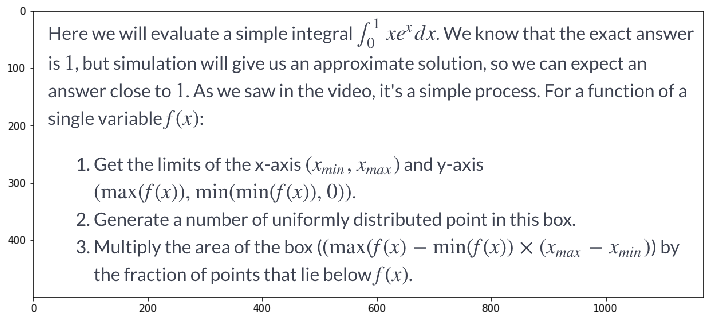

In [0]:
import matplotlib.pyplot as plt
img = plt.imread('int.png')
fig= plt.figure(figsize=(12,7))
plt.imshow(img) 

In [0]:
np.random.seed(seed=123)

In [0]:
# Define the sim_integrate function
def sim_integrate(func, xmin, xmax, sims):
    x = np.random.uniform(xmin, xmax, sims)
    y = np.random.uniform(min(min(func(x)), 0), max(func(x)), sims)
    area = (max(y) - min(y))*(xmax-xmin)
    result = area * sum(abs(y) < abs(func(x)))/sims
    return result

# Call the sim_integrate function and print results
result = sim_integrate(func = lambda x: x*np.exp(x), xmin = 0, xmax = 1, sims = 50)
print("Simulated answer = {}, Actual Answer = 1".format(result))

Simulated answer = 0.7240166789450252, Actual Answer = 1


####Calculating the value of pi

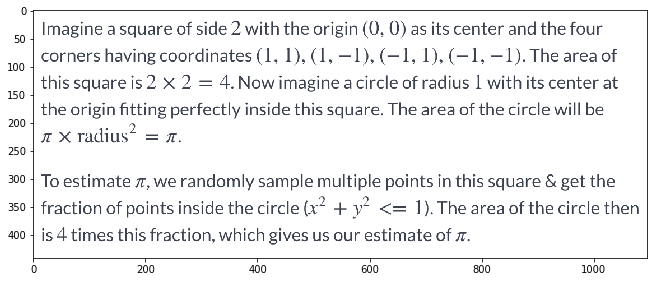

In [17]:
import matplotlib.pyplot as plt
img = plt.imread('pi.png')
fig= plt.figure(figsize=(11,7))
plt.imshow(img) 

In [0]:
np.random.seed(seed=123)

In [19]:
# Initialize sims and circle_points
sims, circle_points = 10000, 0 

for i in range(sims):
    # Generate the two coordinates of a point
    point = np.random.uniform(-1, 1, 2)
    # if the point lies within the unit circle, increment counter
    within_circle = point[0]**2 + point[1]**2 <= 1
    if within_circle == True:
        circle_points +=1
        
# Estimate pi as 4 times the avg number of points in the circle.
pi_sim = 4*circle_points/sims
print("Simulated value of pi = {}".format(pi_sim))

Simulated value of pi = 3.1468


### Simulation for Power Analysis

####Power Analysis - Part I
Now we turn to power analysis. You typically want to ensure that any experiment or A/B test you run has at least 80% power. One way to ensure this is to calculate the sample size required to achieve 80% power.

Suppose that you are in charge of a news media website and you are interested in increasing the amount of time users spend on your website. Currently, the time users spend on your website is normally distributed with a mean of 1 minute and a variance of 0.5 minutes. Suppose that you are introducing a feature that loads pages faster and want to know the sample size required to measure a 10% increase in time spent on the website.

In [0]:
np.random.seed(seed=123)

- Initialize `effect_size` to 5%, `control_mean` to 1 and `control_sd` to 0.5.
- Using `np.random.normal()`, simulate one drawing of `control_time_spent` and `treatment_time_spent` using the values you initialized.
- Run a t-test on `treatment_time_spent` and `control_time_spent` using `st.ttest_ind()` where `st` is `scipy.stats`, which is already imported.
- Statistical significance `stat_sig` should be `True` if `p_value` is less than 0.05, otherwise it should be `False`.

In [0]:
import scipy.stats as st

In [22]:
# Initialize effect_size, sample_size, control_mean, control_sd
effect_size, sample_size, control_mean, control_sd = 0.05, 50, 1, 0.5

# Simulate control_time_spent and treatment_time_spent, assuming equal variance
control_time_spent = \
np.random.normal(loc=control_mean, scale=control_sd,\
                 size=sample_size)
treatment_time_spent = \
np.random.normal(loc=control_mean*(1+effect_size), \
                 scale=control_sd, size=sample_size)

# Run the t-test and get the p_value
t_stat, p_value = \
st.ttest_ind(treatment_time_spent, control_time_spent)
stat_sig = p_value < 0.05
print("P-value: {}, Statistically Significant? {}"\
      .format(p_value, stat_sig))

P-value: 0.5766409395002308, Statistically Significant? False


####Power Analysis - Part II

Power of an experiment is the experiment's ability to detect a difference between treatment & control if the difference really exists. It's good statistical hygiene to strive for 80% power.

For our website, we want to know how many people need to visit each variant, such that we can detect a 10% increase in time spent with 80% power. For this, we start with a small sample (50), simulate multiple instances of this experiment & check power. If 80% power is reached, we stop. If not, we increase the sample size & try again.

In [0]:
np.random.seed(seed=123)

- For the time spent random variables, set the `size` such that it has shape `sample_size` × `sims`.
- Calculate `power` as a fraction of p-values less than 0.05 (statistically significant).
- If `power` is greater than or equal to 80%, `break` out of the while loop. Else, keep incrementing `sample_size` by 10.

In [26]:
sample_size = 50

# Keep incrementing sample size by 10 till we reach required power
while 1:
    control_time_spent = \
    np.random.normal(loc=control_mean, scale=control_sd, size=(sample_size, sims))
    treatment_time_spent = \
    np.random.normal(loc=control_mean*(1+effect_size), scale=control_sd, size=(sample_size, sims))
    t, p = st.ttest_ind(treatment_time_spent, control_time_spent)
    
    # Power is the fraction of times in the simulation when the p-value was less than 0.05
    power = (p < 0.05).sum()/sims
    if power >= 0.8: 
        break
    else: 
        sample_size += 10
print("For 80% power, sample size required = {}"\
      .format(sample_size))

For 80% power, sample size required = 1580


### Applications in Finance

####Portfolio Simulation - Part I

Suppose you have invested $10,000 in your portfolio comprising of multiple stocks. You want to evaluate the portfolio's performance over 10 years. You can tweak your overall expected rate of return and volatility (standard deviation of the rate of return). Assume the rate of return follows a normal distribution.

First, let's write a function that takes the principal (initial investment), number of years, expected rate of return and volatility as inputs and returns the portfolio's total value after 10 years.

In [0]:
# rates is a Normal random variable and has size equal to number of years
def portfolio_return(yrs, avg_return, sd_of_return, principal):
    np.random.seed(123)
    rates = np.random.normal(loc=avg_return, \
                             scale=sd_of_return, size=yrs)
    # Calculate the return at the end of the period
    end_return = principal
    for x in rates:
        end_return = end_return*(1+x)
    return end_return

In [33]:
result = portfolio_return(yrs = 5, avg_return = 0.07,\
                          sd_of_return = 0.15, principal = 1000)
print("Portfolio return after 5 years = {}".format(result))

Portfolio return after 5 years = 1021.4013412039292


####Portfolio Simulation - Part II

Your stock-heavy portfolio has an initial investment of $10,000, an expected return of 7% and a volatility of 30%. You want to get a 95% confidence interval of what your investment will be worth in 10 years. We will simulate multiple samples of 10-year returns and calculate the confidence intervals on the distribution of returns.

In [0]:
def portfolio_return(yrs, avg_return, volatility, principal):
    rates = np.random.normal(loc=avg_return, scale=volatility, size=yrs)
    end_return = principal
    for x in rates:
        end_return = end_return*(1+x)
    return end_return

In [0]:
np.random.seed(seed=123)

In [39]:
# Run 1,000 iterations and store the results
sims, rets = 1000, []

for i in range(sims):
    rets.append(portfolio_return(yrs = 10, avg_return = 0.07, 
                                 volatility = 0.3, principal = 10000))

# Calculate the 95% CI
lower_ci = np.percentile(rets, 2.5) 
upper_ci = np.percentile(rets, 97.5)
print("95% CI of Returns: Lower = {}, Upper = {}"\
      .format(lower_ci, upper_ci))

95% CI of Returns: Lower = 1236.4468015417674, Upper = 79510.31743325583


####Portfolio Simulation - Part III
You have the choice of rebalancing your portfolio with some bonds such that the expected return is 4% & volatility is 10%. You have a principal of $10,000. You want to select a strategy based on how much your portfolio will be worth in 10 years. Let's simulate returns for both the portfolios and choose based on the least amount you can expect with 75% probability (25th percentile).

In [0]:
np.random.seed(seed=123)

In [0]:
rets_stock = []
rets_bond = []

In [44]:
for i in range(sims):
    rets_stock.append(portfolio_return(yrs = 10, avg_return = 0.07, volatility = 0.3, principal = 10000))
    rets_bond.append(portfolio_return(yrs = 10, avg_return = 0.04, volatility = 0.1, principal = 10000))

# Calculate the 25th percentile of the distributions and the amount you'd lose or gain
rets_stock_perc = np.percentile(rets_stock, 25)
rets_bond_perc = np.percentile(rets_bond, 25)
additional_returns = rets_stock_perc - rets_bond_perc
print("Sticking to stocks gets you an additional return of {}"\
      .format(additional_returns))

Sticking to stocks gets you an additional return of -5518.530403193416
